[![Review Assignment Due Date](https://classroom.github.com/assets/deadline-readme-button-22041afd0340ce965d47ae6ef1cefeee28c7c493a6346c4f15d667ab976d596c.svg)](https://classroom.github.com/a/21RyuT3T)
[![Open Lab in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://drive.google.com/file/d/1ctGCAyrTb2-6oiEuri2F_toW87FZunKP/view?usp=sharing)

# Stat 220 Final Lab Instructions

## Project Description

**Project Description**: You are hired as data scientists by Mashable, an online news platform that generates buzz through shares of its posts. Your task is to build a model to predict the number of shares a news article will receive based on its characteristics.

**Data**: The data comes from Mashable.com, hosted on the UC Irvine Machine Learning repository: https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity. You can download the dataset from there or at https://richardson.byu.edu/220/OnlineNewsPopularity.csv. There are 61 variables in total. A description of the variables is available at https://richardson.byu.edu/220/ONPvariables.txt. The target variable is the number of shares a news article receives, located as the last variable in the dataset.

**Deliverables**: Your work will culminate in two key deliverables:

1. A script or notebook containing all analyses and modeling steps.
2. A technical report for Mashable, written according to the instructions below.

## Project Details

### Exploratory Data Analysis (EDA)

1. Plot the target variable. Determine if the target variable seems appropriate or if any transformations are needed.
2. Build a linear regression model without higher-order terms and identify the most significant predictors.
3. Build a regression tree to identify important predictors.
4. Select several significant features from steps 2 and 3. Create visualizations or tables to explore the relationships between these features and the target variable.
5. Write an EDA section in your technical report. Report the results of the initial models and include figures or tables that show the target variable and its relationship with potentially significant predictors.
6. Use appropriate methods to remove insignificant variables from the model.

**Linear Regression Modeling**: Build and tune a linear regression model with high predictive power, explaining to Mashable which features most influence the number of shares.

1. Split the data into training and testing sets. Use the training set for model fitting and the testing set to check for overfitting and predictive performance.
2. Explore transformations of the target and other variables.
3. Explore higher-order terms.
4. Reduce the model using the following methods:
   * Stepwise model evaluation methods to remove insignificant variables.
   * LASSO regression to fit the full model and remove insignificant variables. Tune the model to find the best `α`.
5. Write a section in your technical report that reports the out-of-sample performance of the models. Discuss the most significant predictors and evaluate the model's usefulness for predicting future shares.

**Regression Tree Modeling**: Build and tune a regression tree model.

1. Use the same training and testing sets as above.
2. Use cost-complexity pruning and cross-validation to find a model that fits well on out-of-sample data.
3. Fit a random forest regression model, using cost-complexity pruning for the individual trees.
4. Write a section in your technical report that reports the out-of-sample performance of the models. Discuss the model’s usefulness for predicting future shares.

**Conclusion**: Compare each model’s predictive accuracy on the test set. Choose the best-performing model as the final predictive model. Write a concluding section in your technical report that addresses Mashable's business concerns and presents your final model along with your confidence in its predictions.

In [ ]:
%%capture
!pip install sweetviz

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.regression.linear_model import RegressionResults

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import sweetviz as sv

***Data***: _The data comes from Mashable.com, hosted on the UC Irvine Machine Learning repository: https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity. You can download the dataset from there or at https://richardson.byu.edu/220/OnlineNewsPopularity.csv. There are 61 variables in total. A description of the variables is available at https://richardson.byu.edu/220/ONPvariables.txt. The target variable is the number of shares a news article receives, located as the last variable in the dataset._

***Deliverables***: _Your work will culminate in two key deliverables:_

1. _A script or notebook containing all analyses and modeling steps._
2. _A technical report for Mashable, written according to the instructions below._

In [ ]:
news = pd.read_csv('https://richardson.byu.edu/220/OnlineNewsPopularity.csv', skipinitialspace=True)
news.head()

url  timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
0                  0.815385        4.0             2.0       1.0  ...   
1                  0.791946        3.0             1.0       1.0  ...   
2                  0.663866        3.0             1.0       1.0  ...   
3                  0.665635        9.0             0.0       1.0  ...   
4                  0.540890       19.0            19.0      20.0  ...   

   min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0               0.100000                    0.7              -0.350000   
1               0.033333                    0.7              -0.118750   
2               0.100000                    1.0              -0.466667   
3               0.136364                    0.8              -0.369697   
4               0.033333                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  
0                      0.187500     593  
1                      0.000000     711  
2                      0.000000    1500  
3                      0.000000    1200  
4                      0.136364     505  

[5 rows x 61 columns]

In [ ]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

## Project Details

### Exploratory Data Analysis (EDA)

1. _Plot the target variable. Determine if the target variable seems appropriate or if any transformations are needed._

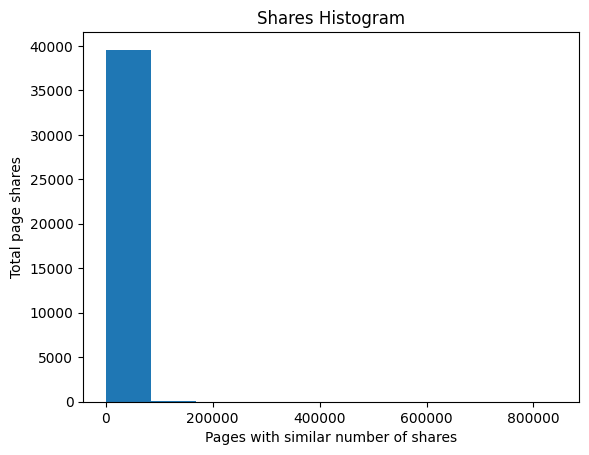

In [ ]:
plt.hist(news['shares'])
plt.title('Shares Histogram')
plt.ylabel('Total page shares')
plt.xlabel('Pages with similar number of shares')
plt.show()

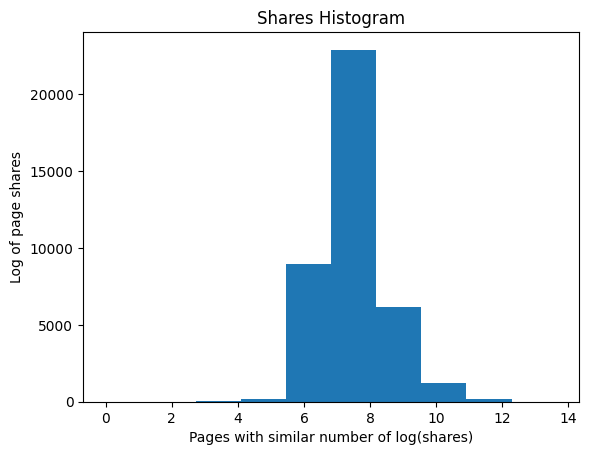

In [ ]:
plt.hist(np.log(news['shares']))
plt.title('Shares Histogram')
plt.ylabel('Log of page shares')
plt.xlabel('Pages with similar number of log(shares)')
plt.show()

2. _Build a linear regression model without higher-order terms and identify the most significant predictors._

In [ ]:
news1 = news.drop(columns=['url'])
predictors1 = [c for c in news1.columns if c not in ('shares',)]

# log transform target variable
news1['shares'] = np.log(news1['shares'])

model1: RegressionResults = None

while len(predictors1):
    model1 = sm.OLS(news1['shares'], news1[predictors1]).fit()

    if np.any(model1.pvalues > 0.05):
        least_significant = model1.pvalues.index[model1.pvalues.argmax()]
        predictors1.remove(least_significant)
    else:
        break

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 shares   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          6.818e+04
Date:                Thu, 12 Dec 2024   Prob (F-statistic):                        0.00
Time:                        04:17:07   Log-Likelihood:                         -50713.
No. Observations:               39644   AIC:                                  1.015e+05
Df Residuals:                   39601   BIC:                                  1.019e+05
Df Model:                          43                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
timedelta                      5.781e-05   2.87e-05      2.017      0.044    1.63e-06       0.000
n_tokens_title                    0.0081      0.002      3.657      0.000       0.004       0.012
n_tokens_content               5.329e-05   1.26e-05      4.239      0.000    2.86e-05    7.79e-05
n_unique_tokens                   0.2736      0.109      2.501      0.012       0.059       0.488
n_non_stop_unique_tokens         -0.2818      0.118     -2.390      0.017      -0.513      -0.051
num_hrefs                         0.0042      0.001      8.443      0.000       0.003       0.005
num_self_hrefs                   -0.0080      0.001     -6.109      0.000      -0.011      -0.005
num_imgs                          0.0023      0.001      3.492      0.000       0.001       0.004
average_token_length             -0.0958      0.018     -5.358      0.000      -0.131      -0.061
num_keywords                      0.0124      0.003      4.459      0.000       0.007       0.018
data_channel_is_lifestyle        -0.0830      0.025     -3.269      0.001      -0.133      -0.033
data_channel_is_entertainment    -0.1647      0.017     -9.644      0.000      -0.198      -0.131
data_channel_is_bus              -0.1462      0.024     -6.078      0.000      -0.193      -0.099
data_channel_is_socmed            0.1828      0.023      7.887      0.000       0.137       0.228
data_channel_is_tech              0.1263      0.022      5.866      0.000       0.084       0.168
kw_min_min                        0.0008   8.64e-05      9.331      0.000       0.001       0.001
kw_max_min                     1.741e-05   3.81e-06      4.575      0.000    9.95e-06    2.49e-05
kw_avg_min                       -0.0001   2.34e-05     -5.495      0.000      -0.000   -8.27e-05
kw_min_max                    -3.714e-07   8.83e-08     -4.207      0.000   -5.44e-07   -1.98e-07
kw_avg_max                    -2.533e-07   6.05e-08     -4.187      0.000   -3.72e-07   -1.35e-07
kw_min_avg                    -5.138e-05    5.7e-06     -9.016      0.000   -6.25e-05   -4.02e-05
kw_max_avg                    -4.254e-05   1.89e-06    -22.512      0.000   -4.62e-05   -3.88e-05
kw_avg_avg                        0.0003   1.07e-05     31.600      0.000       0.000       0.000
self_reference_avg_sharess     1.946e-06   1.85e-07     10.524      0.000    1.58e-06    2.31e-06
weekday_is_monday                -0.2205      0.016    -13.573      0.000      -0.252      -0.189
weekday_is_tuesday               -0.2875      0.016    -18.109      0.000      -0.319      -0.256
weekday_is_wednesday             -0.2843      0.016    -17.902      0.000      -0.315      -0.253
weekday_is_thursday              -0.2789    

3. _Build a regression tree to identify important predictors._

In [ ]:
X = news.drop(columns=["shares", "url"])
y = np.log(news["shares"])

tree = DecisionTreeRegressor()
fit_tree = tree.fit(X, y)

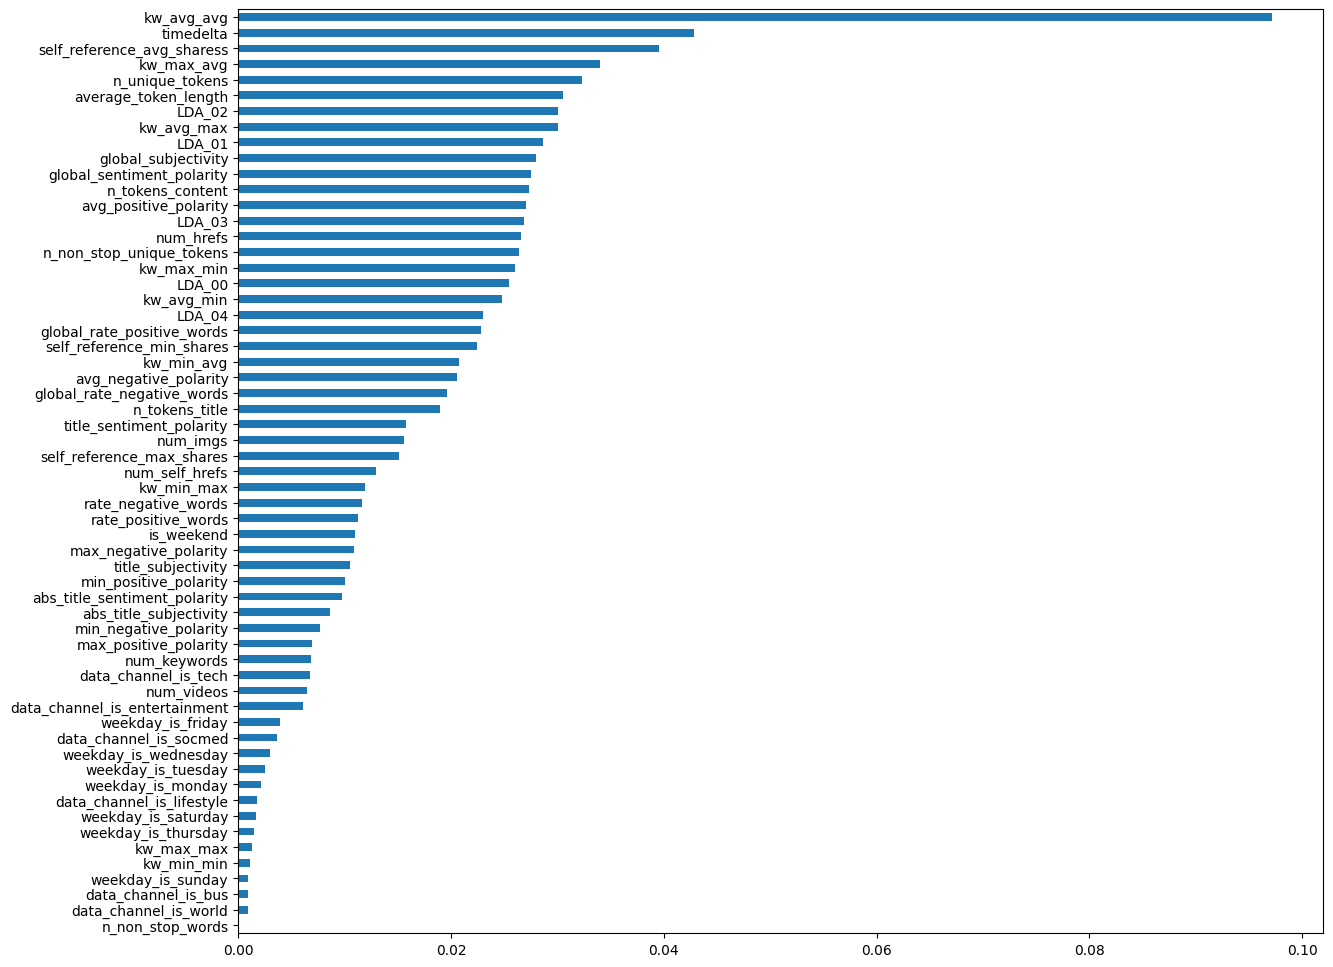

In [ ]:
plt.figure(figsize=(14, 12))
pd.Series(fit_tree.feature_importances_, index=X.columns).sort_values().plot(kind='barh')
plt.show()

4. _Select several significant features from steps 2 and 3. Create visualizations or tables to explore the relationships between these features and the target variable._

In [ ]:
top_10_tree_cols = pd.Series(fit_tree.feature_importances_, index=X.columns).sort_values(ascending=False).index[:10]

sig_features = set(top_10_tree_cols)
sig_features.update(model1.model.exog_names)

print("Significant Features:", sig_features)

Significant Features: {'kw_max_min', 'kw_max_avg', 'num_imgs', 'LDA_00', 'n_tokens_title', 'data_channel_is_socmed', 'data_channel_is_entertainment', 'global_subjectivity', 'weekday_is_tuesday', 'avg_negative_polarity', 'abs_title_subjectivity', 'kw_avg_min', 'num_hrefs', 'LDA_02', 'rate_positive_words', 'kw_avg_max', 'weekday_is_thursday', 'rate_negative_words', 'data_channel_is_bus', 'kw_min_max', 'kw_min_avg', 'LDA_03', 'data_channel_is_lifestyle', 'n_tokens_content', 'weekday_is_monday', 'average_token_length', 'num_keywords', 'min_positive_polarity', 'num_self_hrefs', 'global_rate_positive_words', 'weekday_is_friday', 'LDA_01', 'self_reference_avg_sharess', 'kw_min_min', 'n_unique_tokens', 'weekday_is_wednesday', 'LDA_04', 'title_subjectivity', 'n_non_stop_unique_tokens', 'timedelta', 'title_sentiment_polarity', 'kw_avg_avg', 'data_channel_is_tech'}


In [ ]:
sig_features = list(sig_features)

# Add the target variable `y` as a new column to the DataFrame
df = pd.DataFrame(X[sig_features])
df['shares'] = y

df.head()

kw_max_min  kw_max_avg  num_imgs    LDA_00  n_tokens_title  \
0         0.0         0.0       1.0  0.500331            12.0   
1         0.0         0.0       1.0  0.799756             9.0   
2         0.0         0.0       1.0  0.217792             9.0   
3         0.0         0.0       1.0  0.028573             9.0   
4         0.0         0.0      20.0  0.028633            13.0   

   data_channel_is_socmed  data_channel_is_entertainment  global_subjectivity  \
0                     0.0                            1.0             0.521617   
1                     0.0                            0.0             0.341246   
2                     0.0                            0.0             0.702222   
3                     0.0                            1.0             0.429850   
4                     0.0                            0.0             0.513502   

   weekday_is_tuesday  avg_negative_polarity  ...  n_unique_tokens  \
0                 0.0              -0.350000  ...         0.663594   
1                 0.0              -0.118750  ...         0.604743   
2                 0.0              -0.466667  ...         0.575130   
3                 0.0              -0.369697  ...         0.503788   
4                 0.0              -0.220192  ...         0.415646   

   weekday_is_wednesday    LDA_04  title_subjectivity  \
0                   0.0  0.040123            0.500000   
1                   0.0  0.050001            0.000000   
2                   0.0  0.682188            0.000000   
3                   0.0  0.028572            0.000000   
4                   0.0  0.885427            0.454545   

   n_non_stop_unique_tokens  timedelta  title_sentiment_polarity  kw_avg_avg  \
0                  0.815385      731.0                 -0.187500         0.0   
1                  0.791946      731.0                  0.000000         0.0   
2                  0.663866      731.0                  0.000000         0.0   
3                  0.665635      731.0                  0.000000         0.0   
4                  0.540890      731.0                  0.136364         0.0   

   data_channel_is_tech    shares  
0                   0.0  6.385194  
1                   0.0  6.566672  
2                   0.0  7.313220  
3                   0.0  7.090077  
4                   1.0  6.224558  

[5 rows x 44 columns]

                                             |          | [  0%]   00:00 -> (? left)


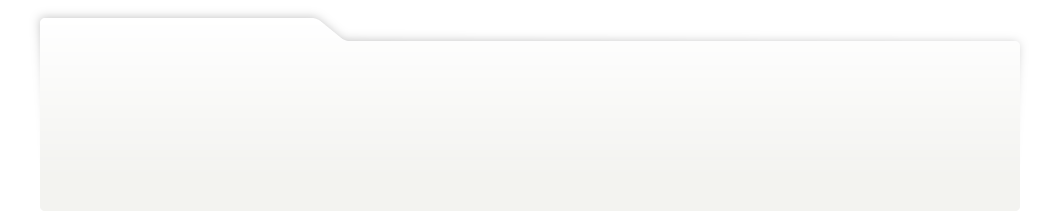
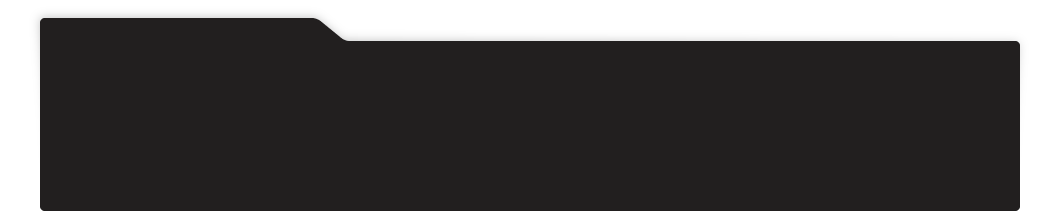
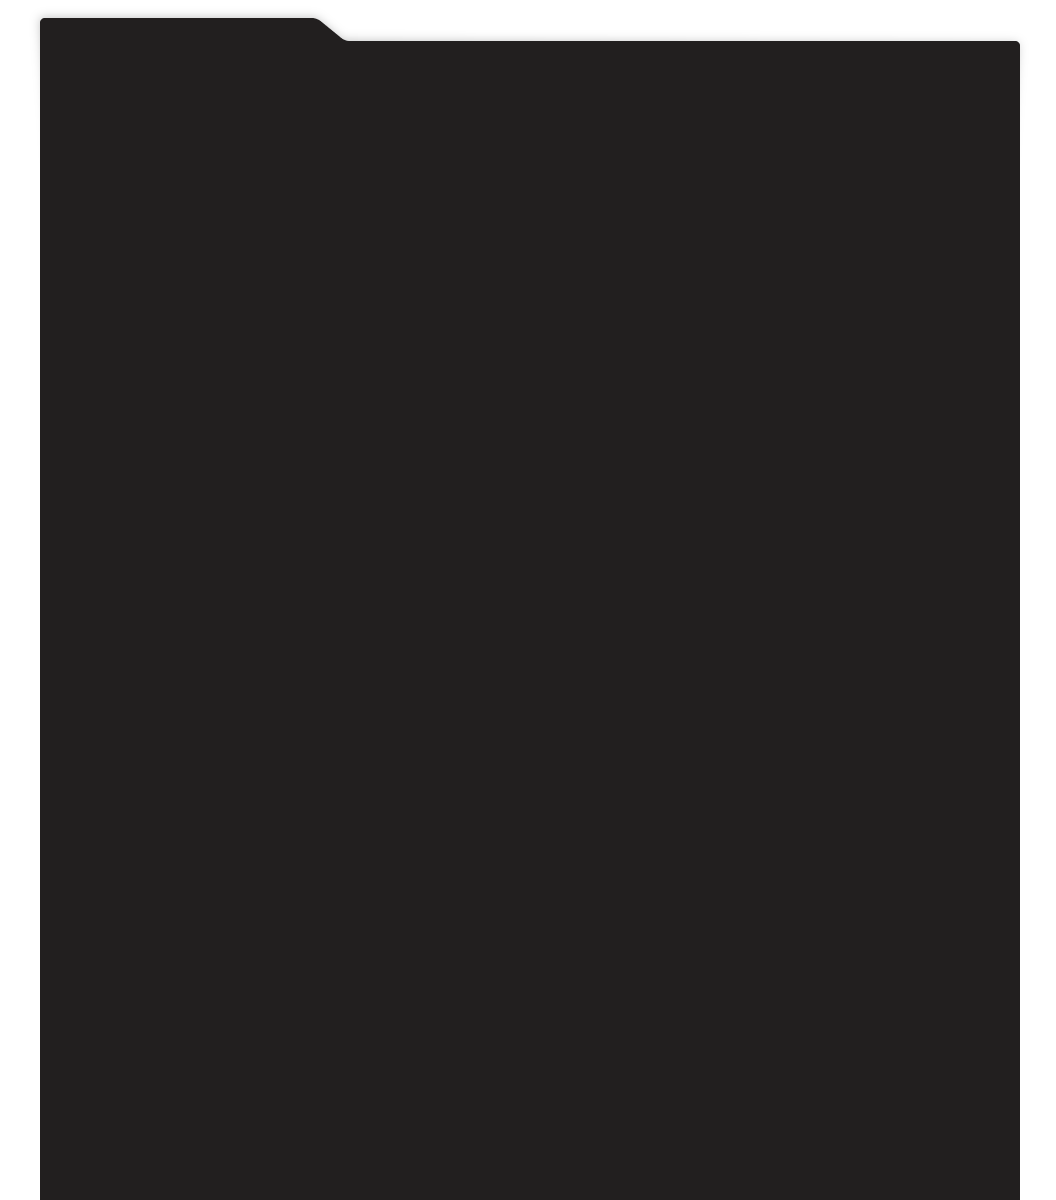
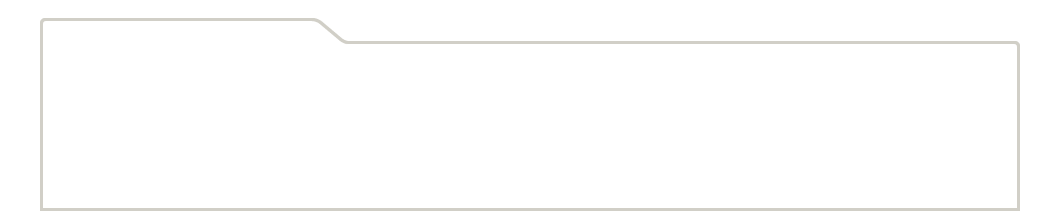
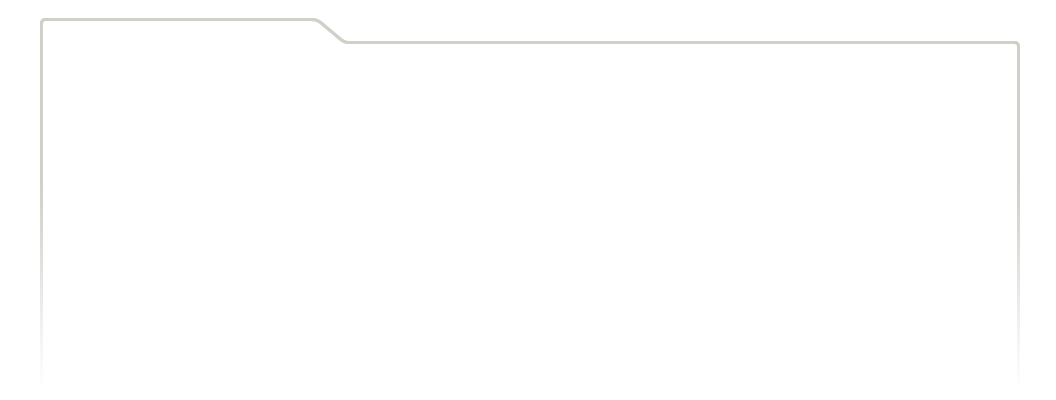
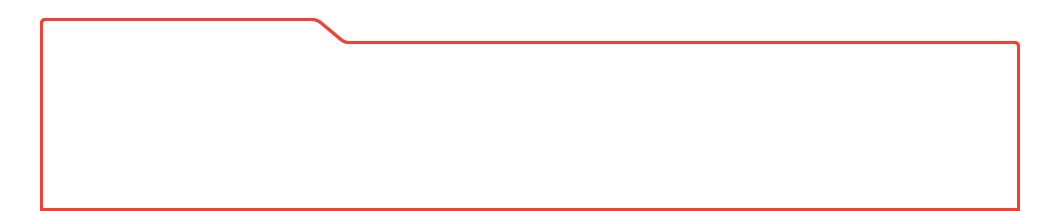
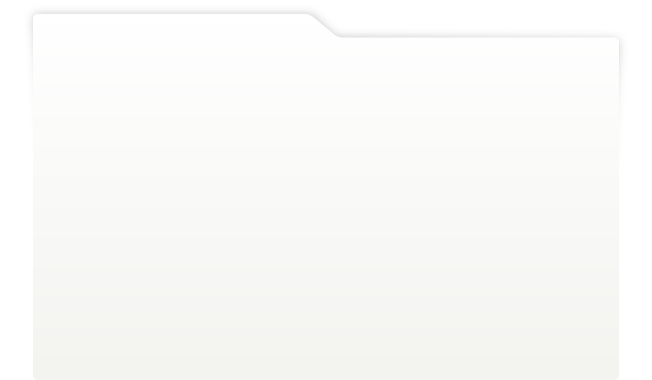
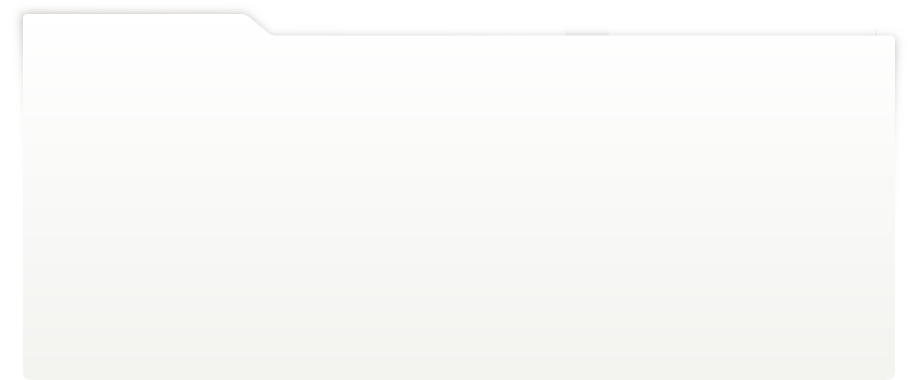
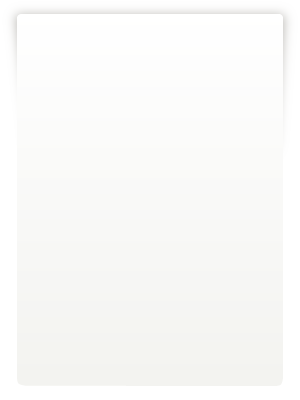
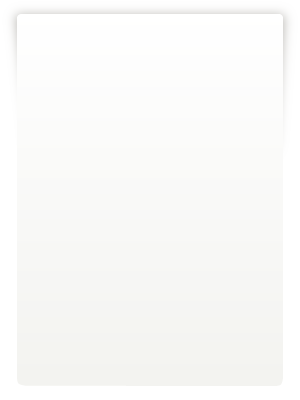
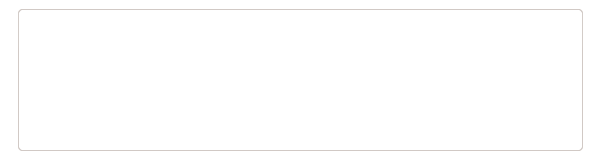
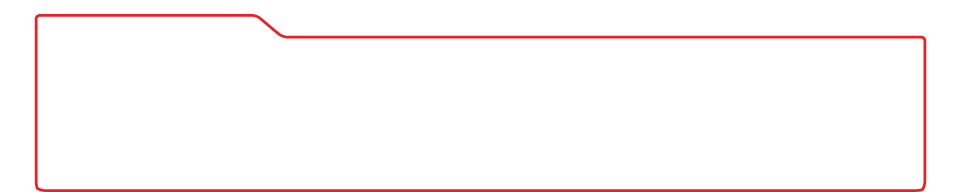
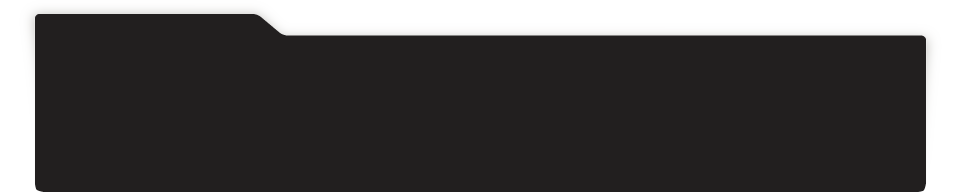
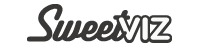
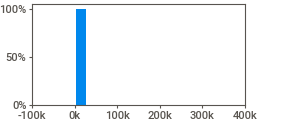
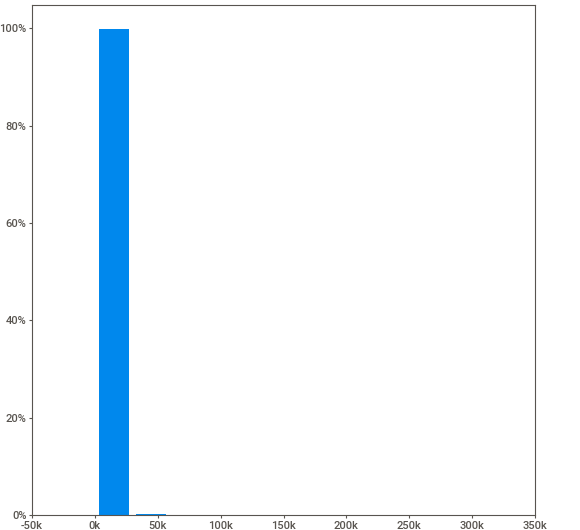
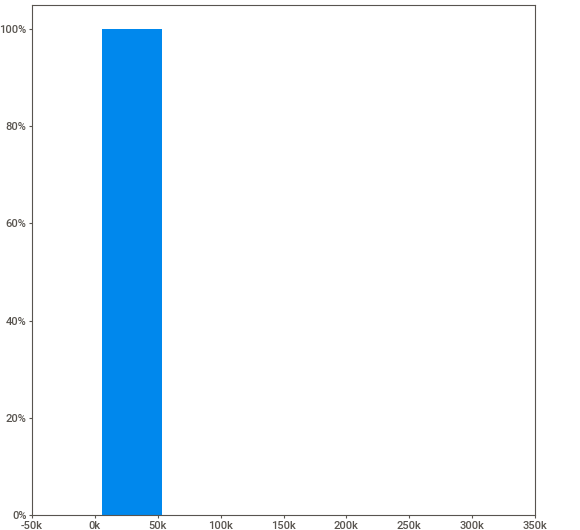
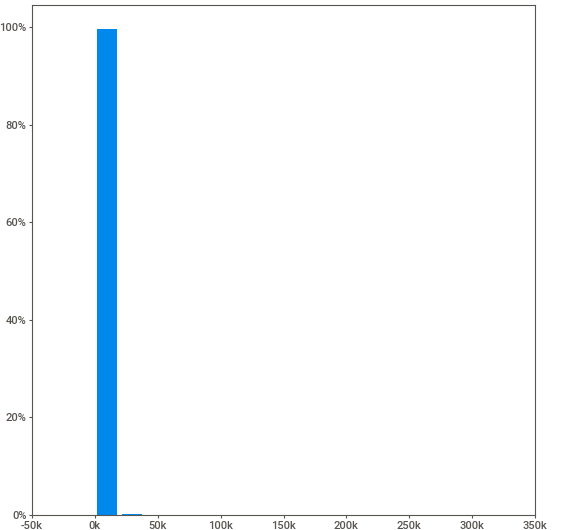
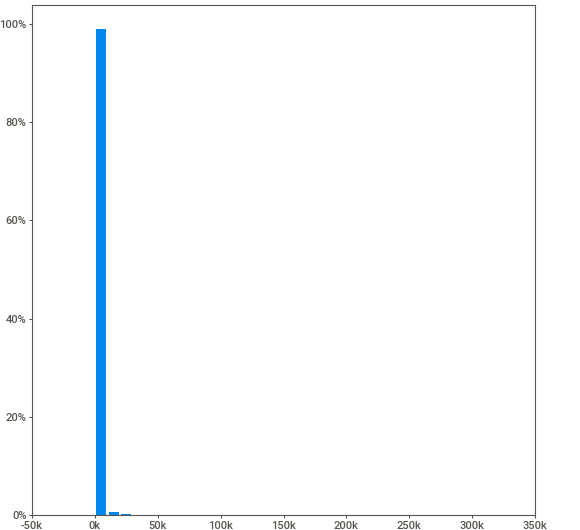
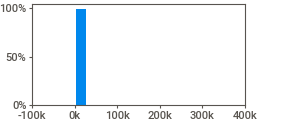
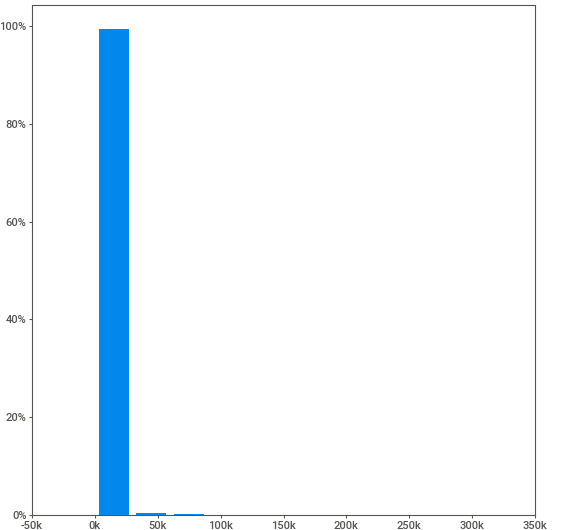
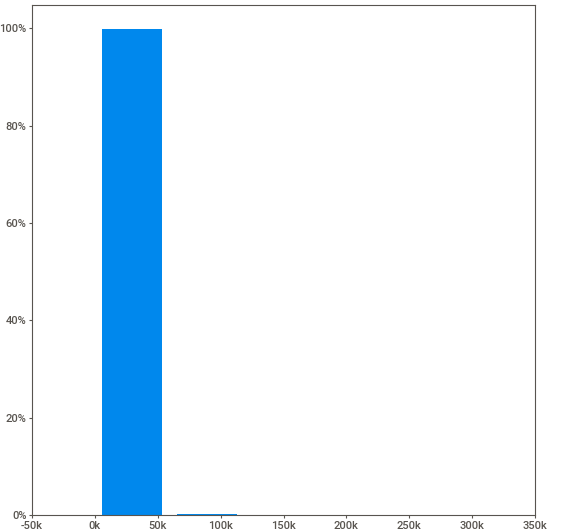
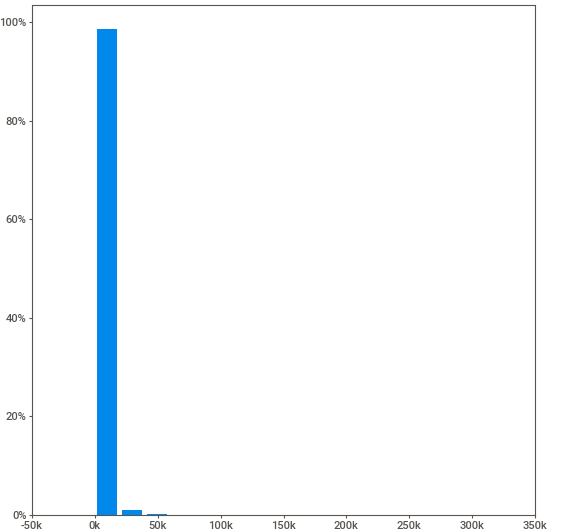
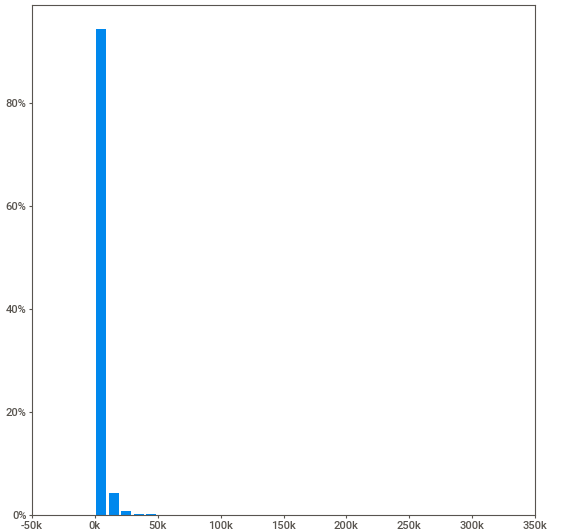
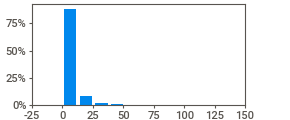
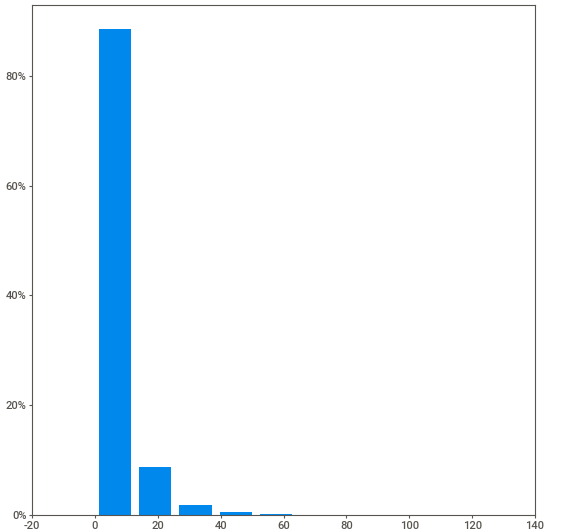
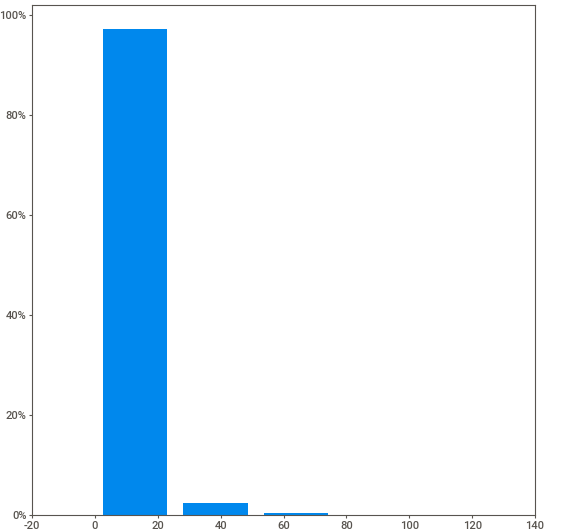
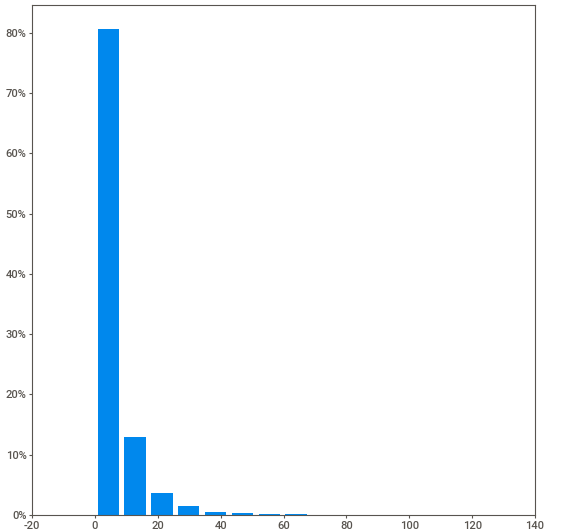
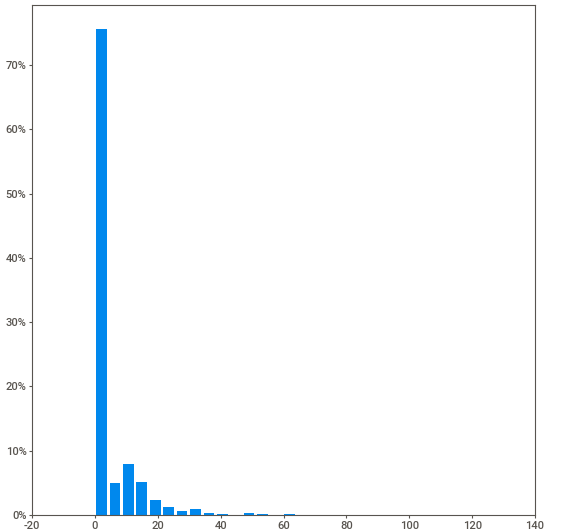
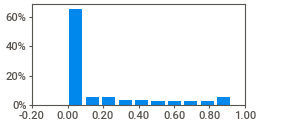
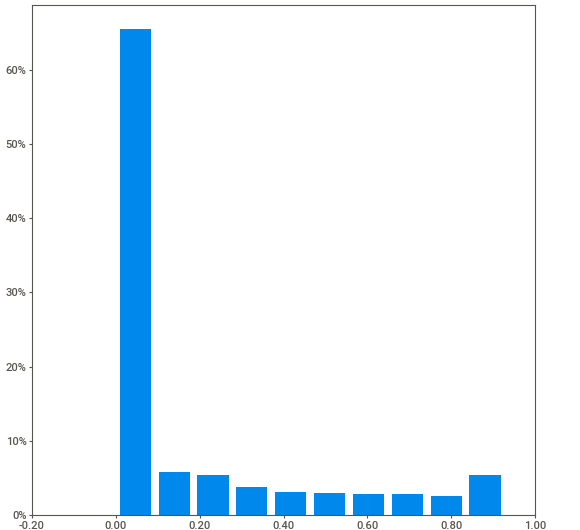
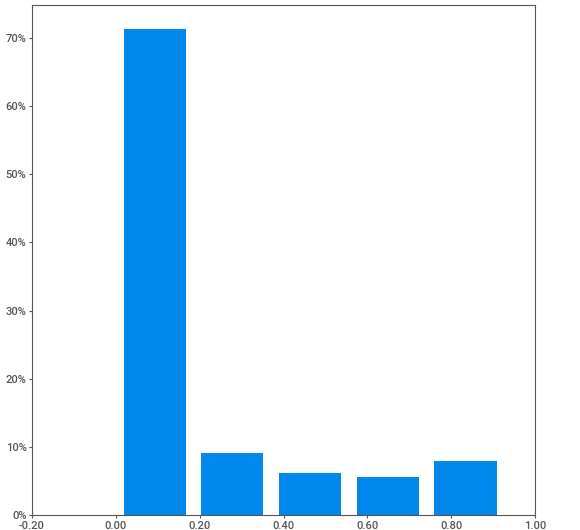
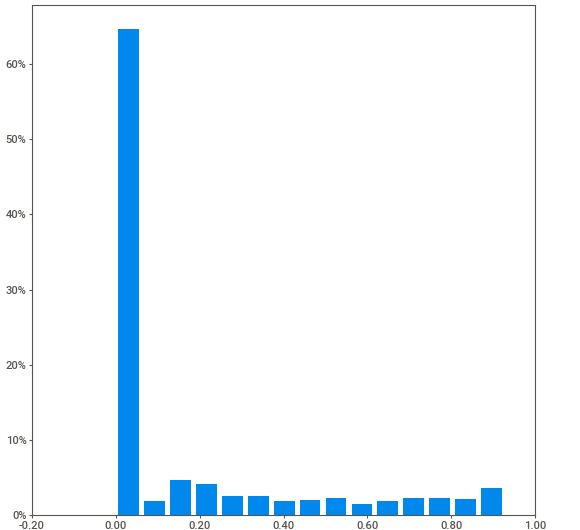
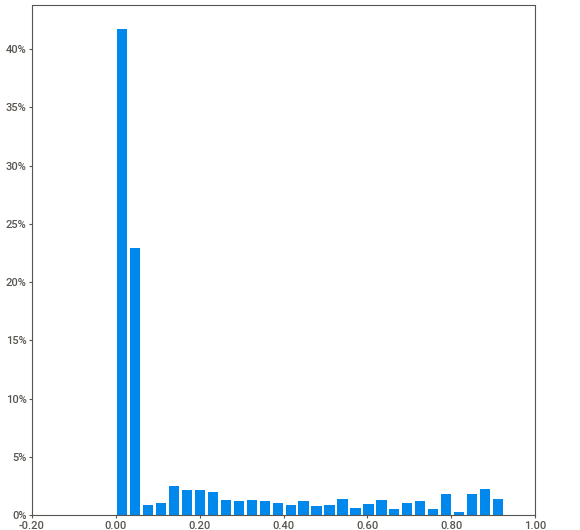
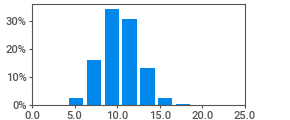
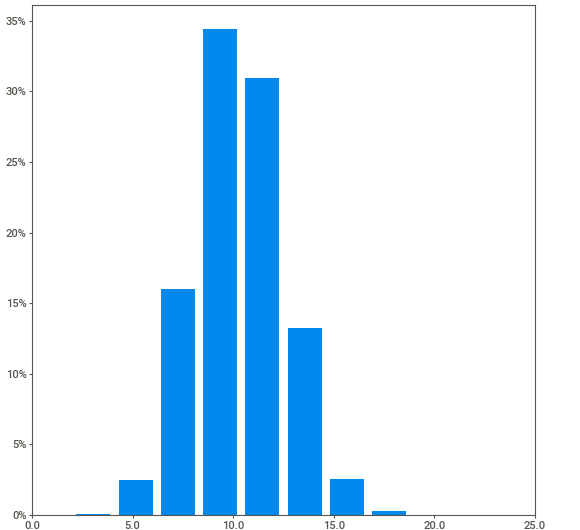
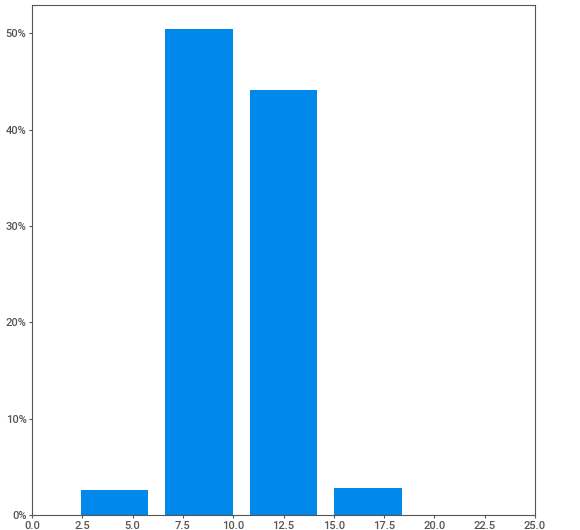
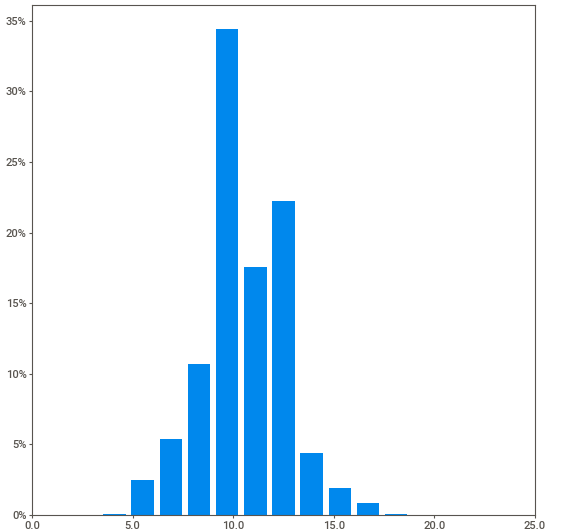
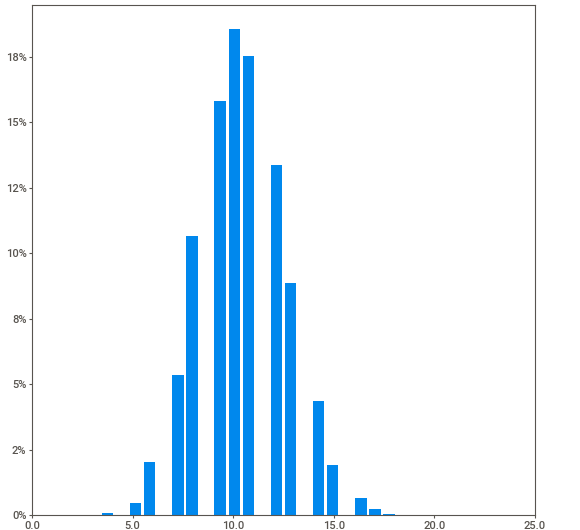
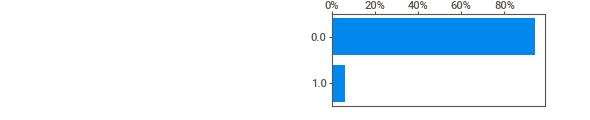
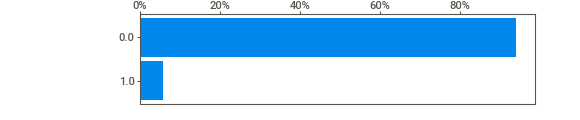
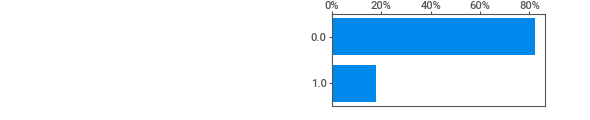
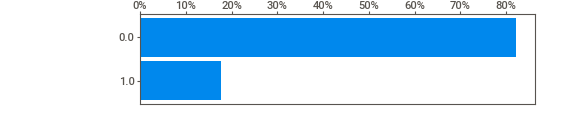
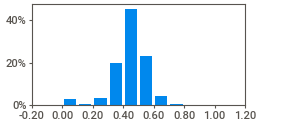
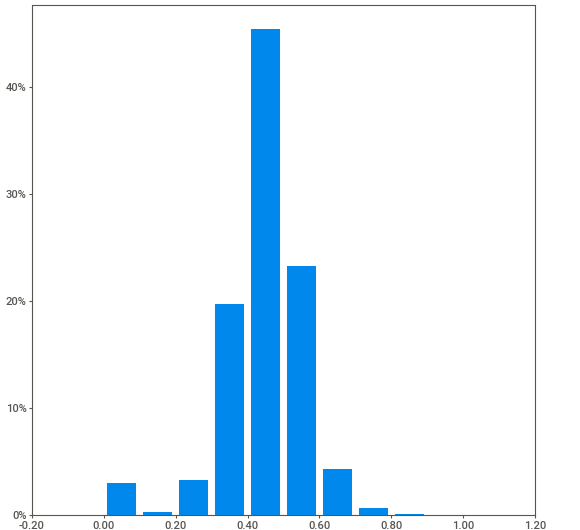
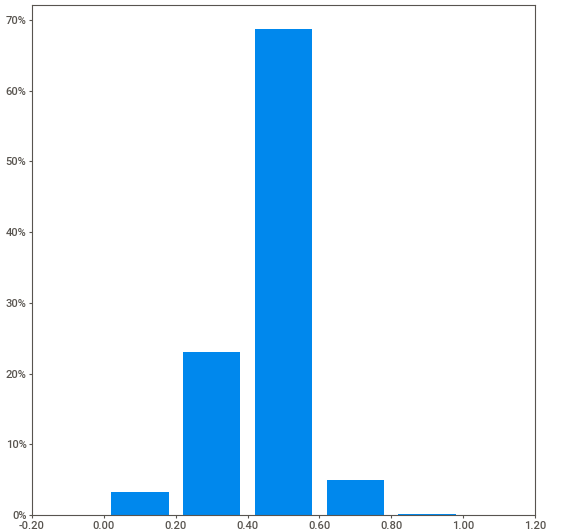
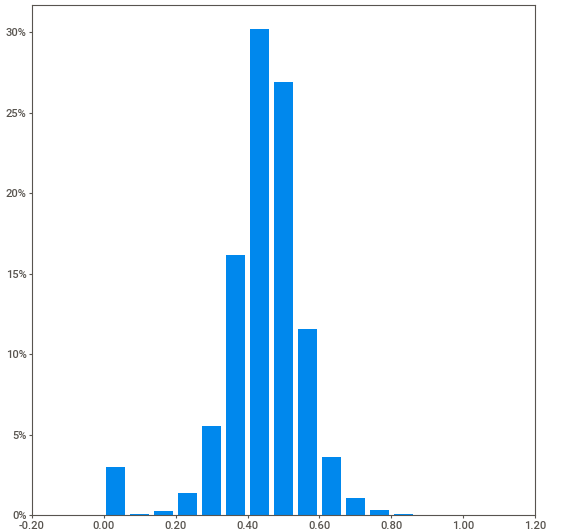
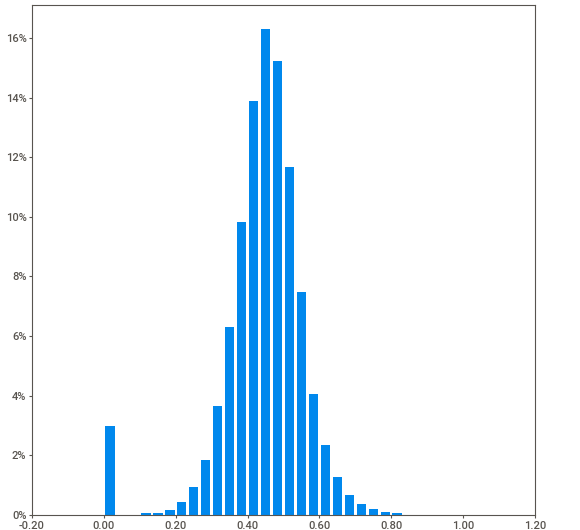
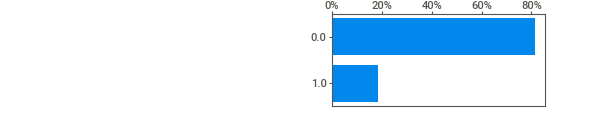
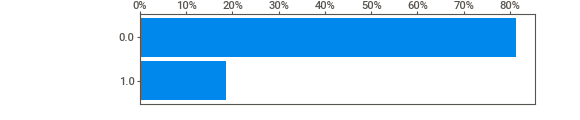
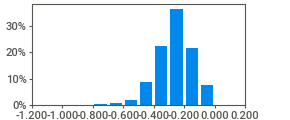
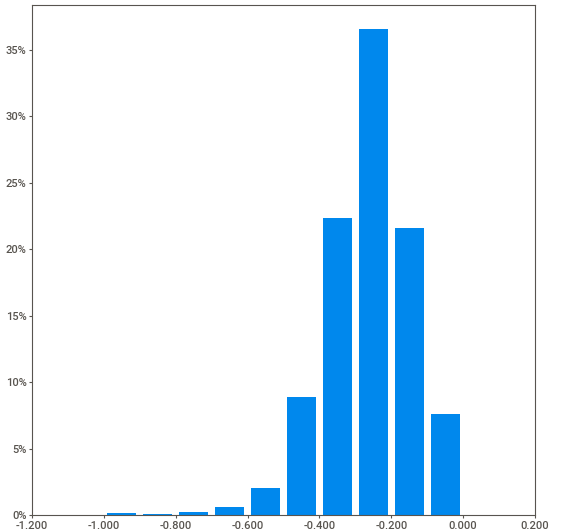
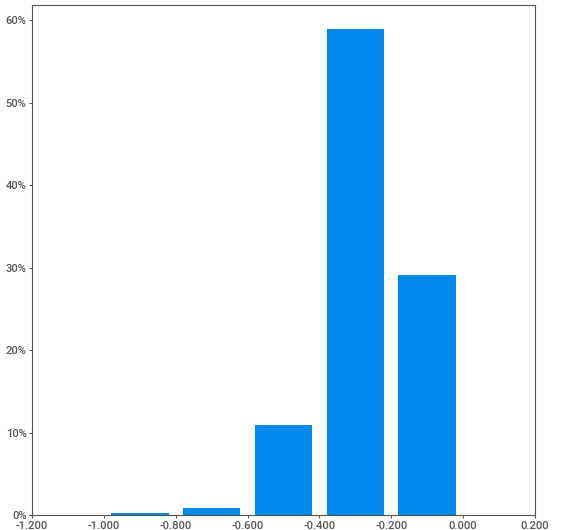
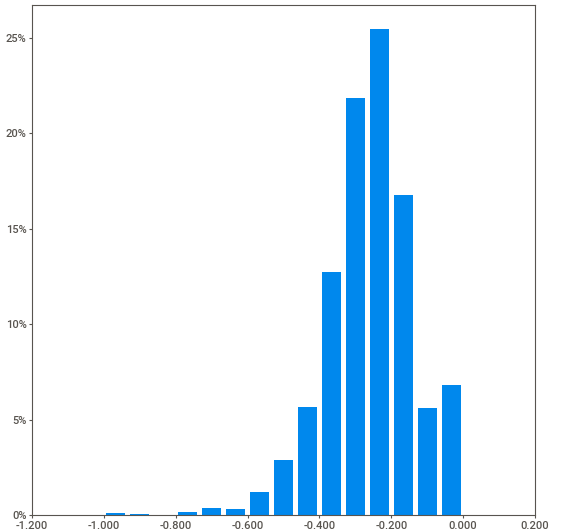
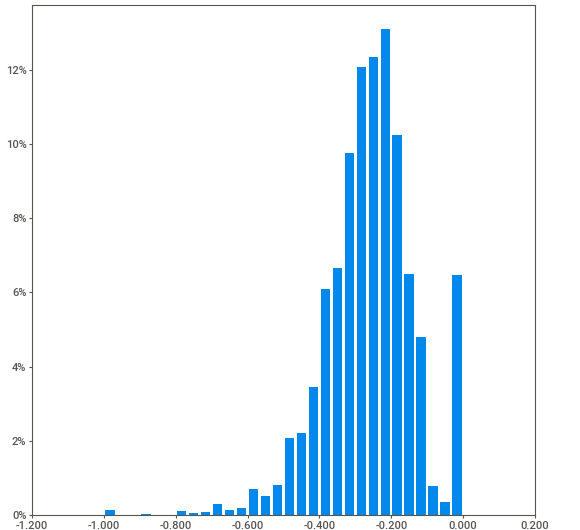
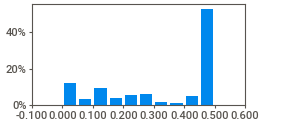
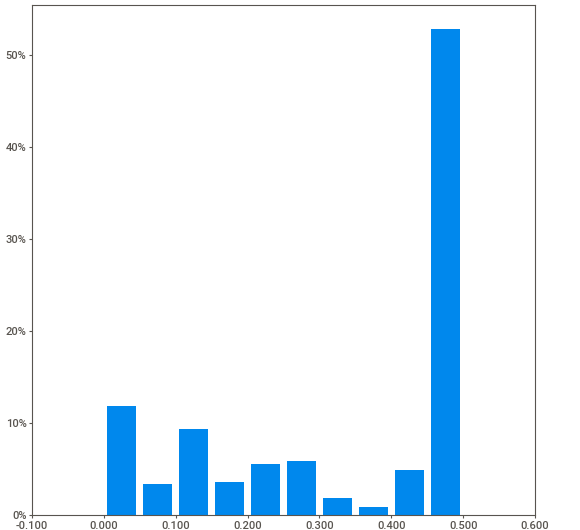
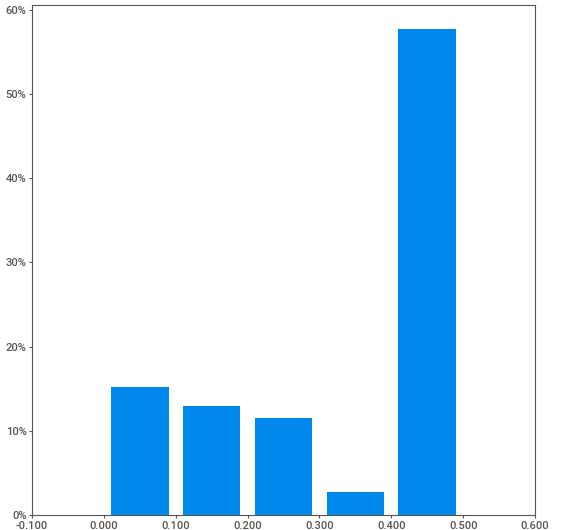
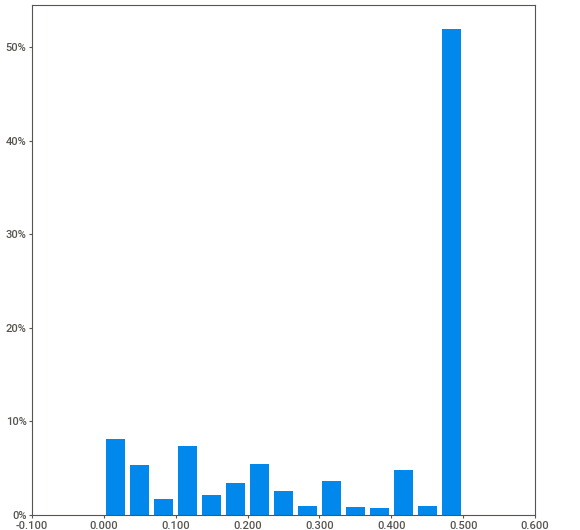
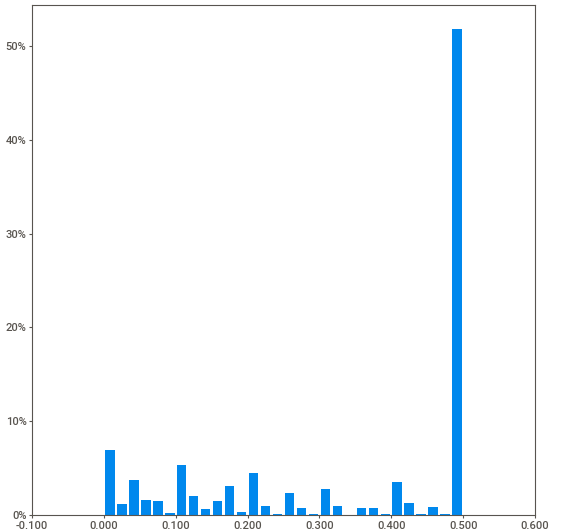
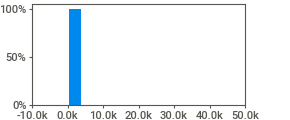
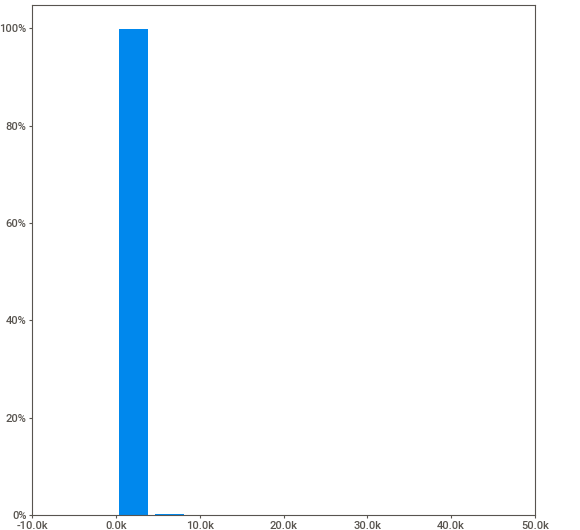
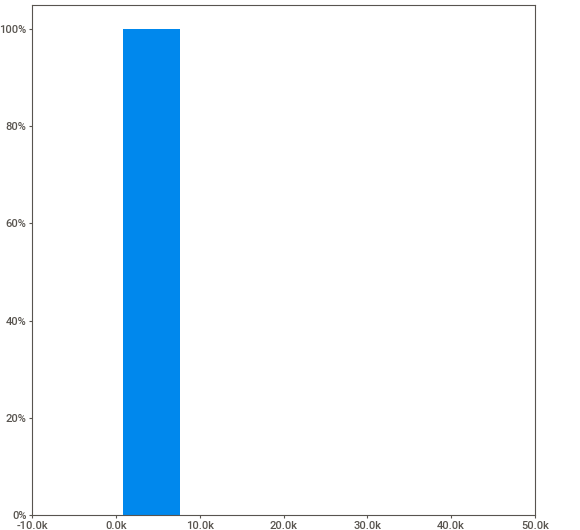
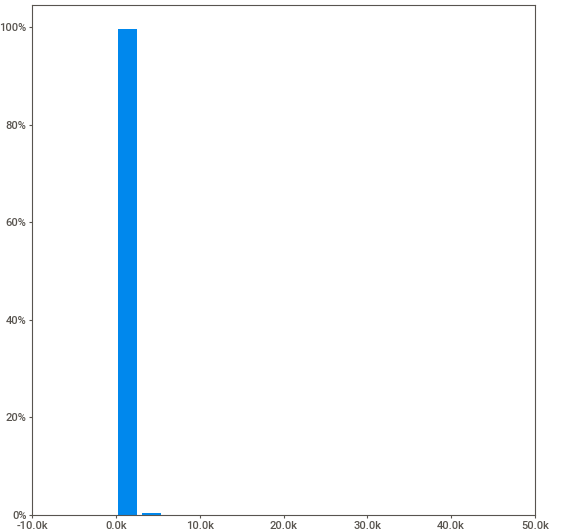
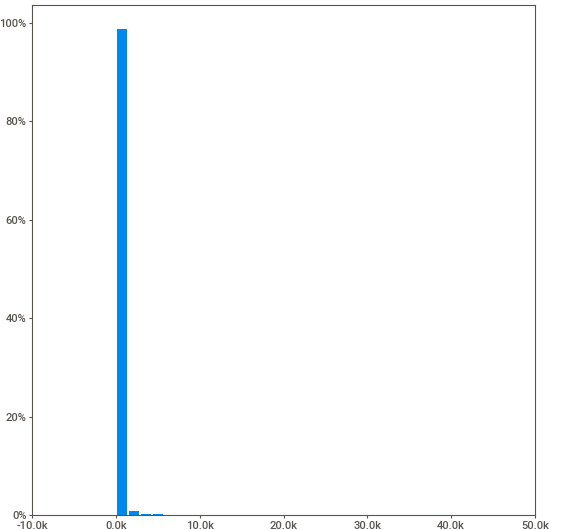
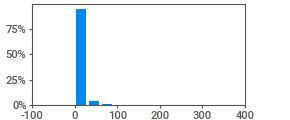
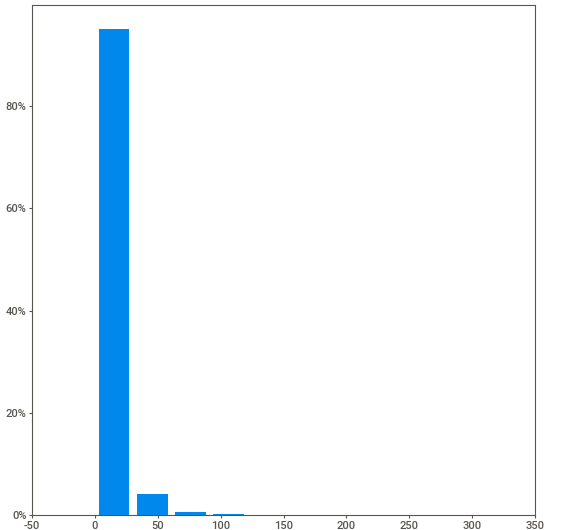
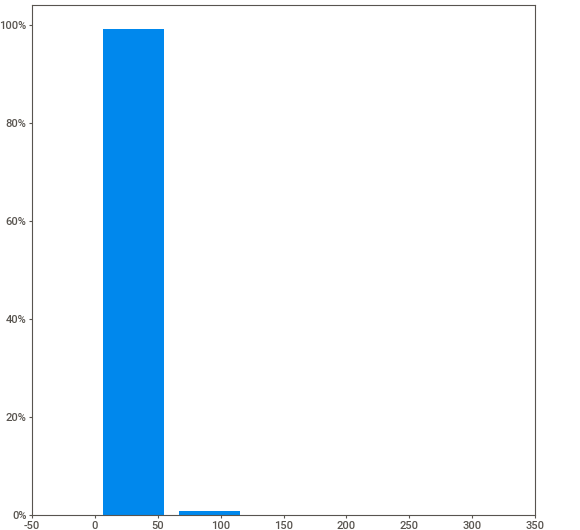
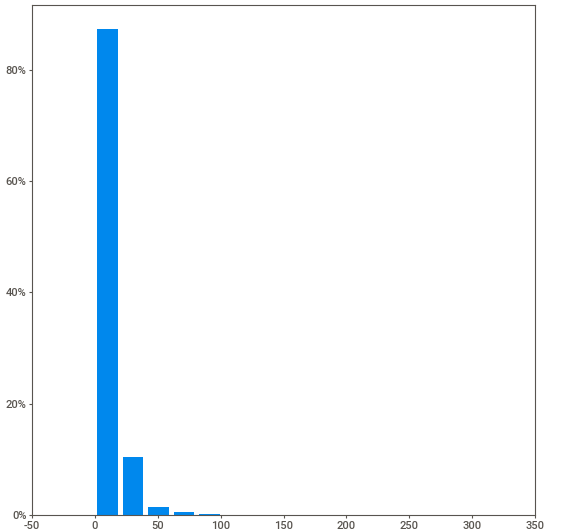
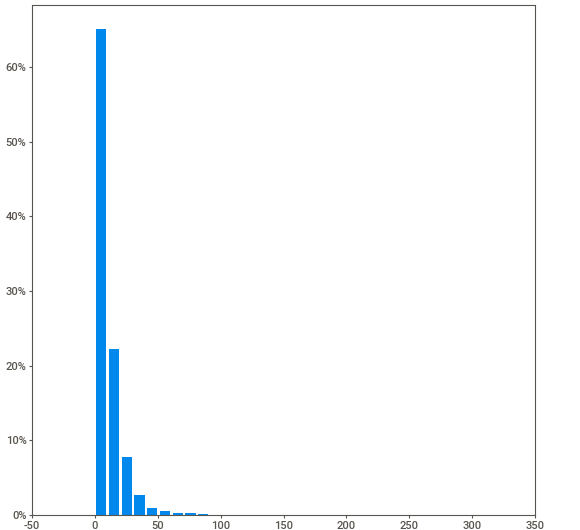
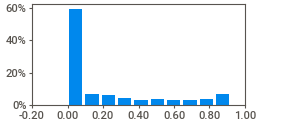
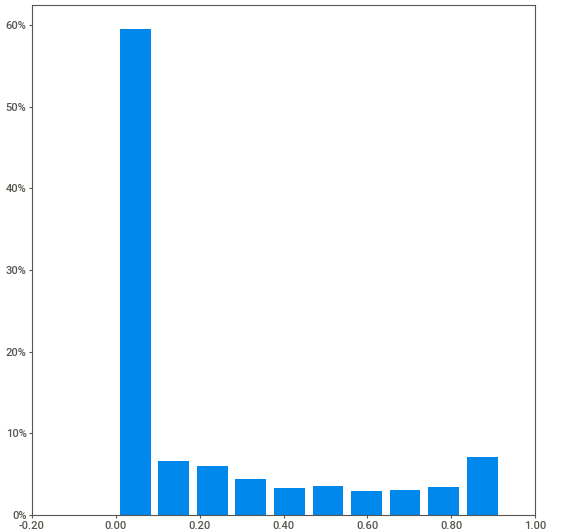
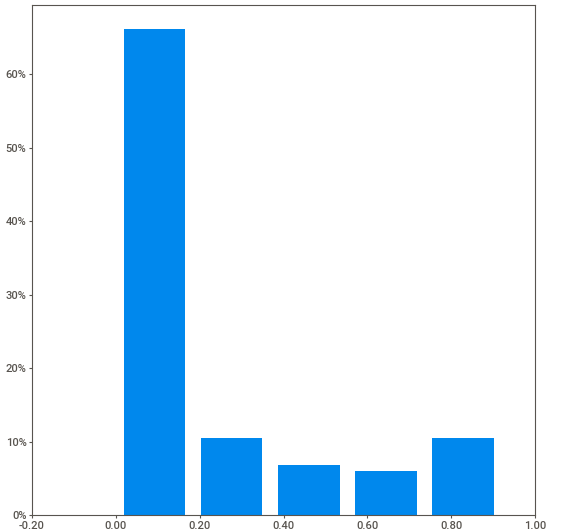
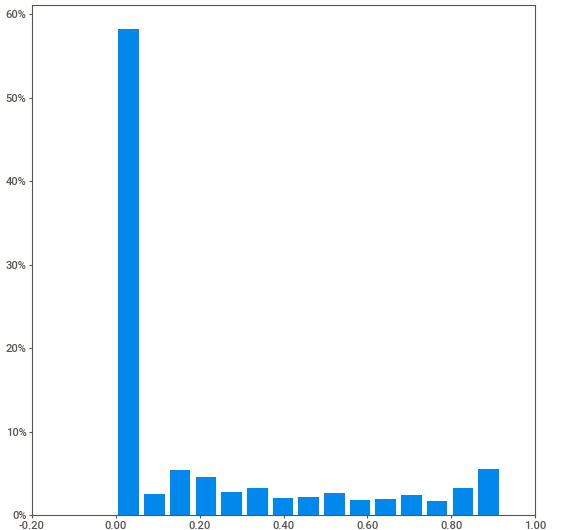
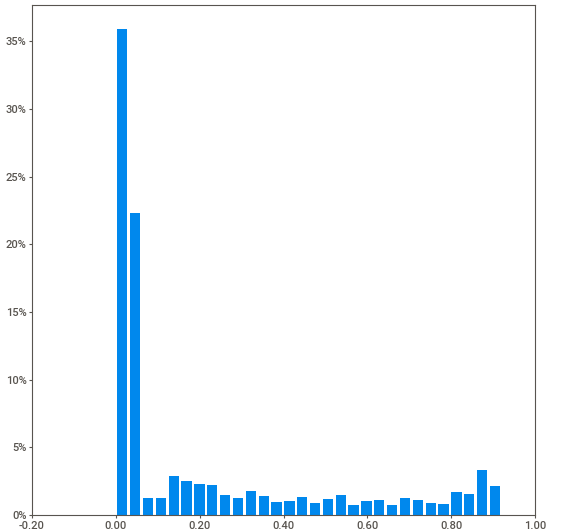
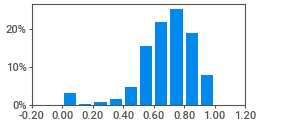
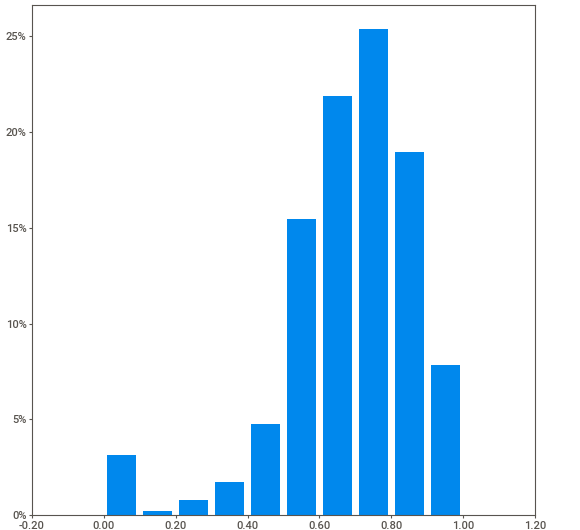
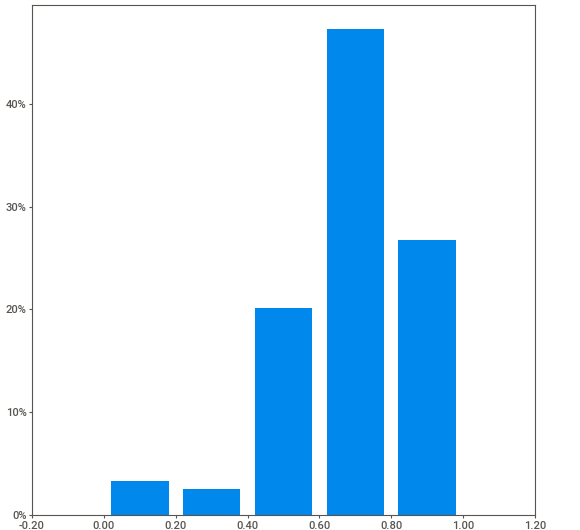
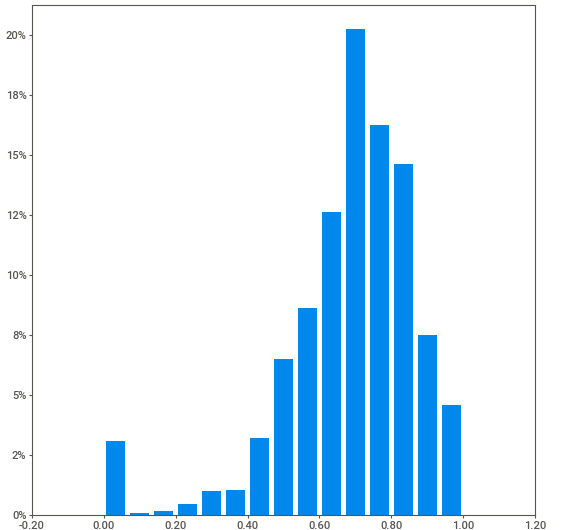
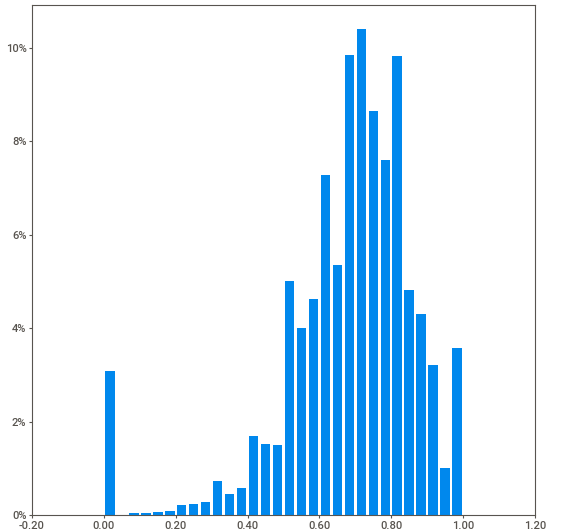
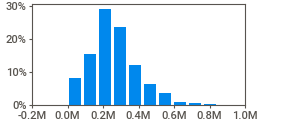
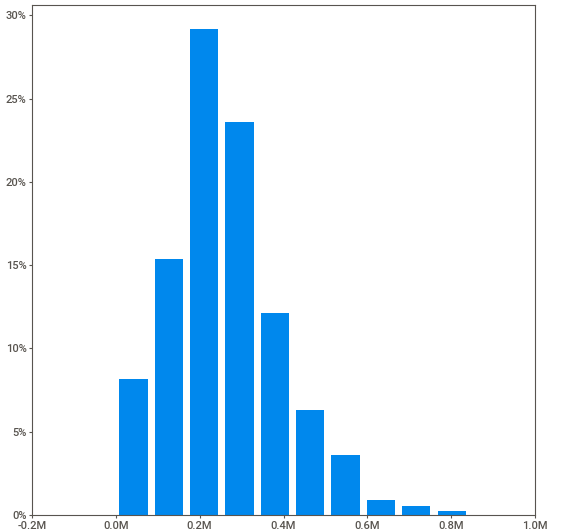
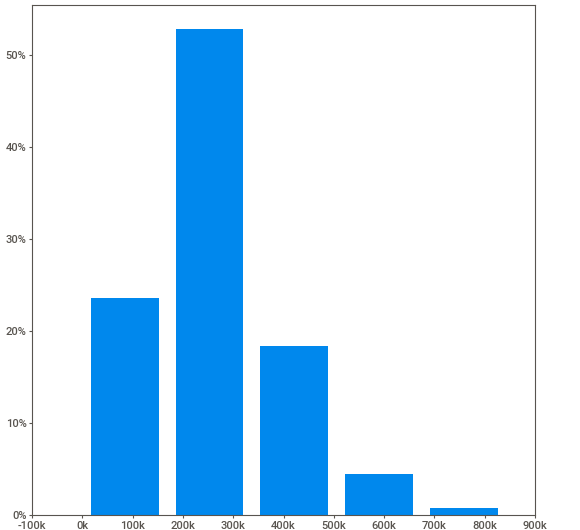
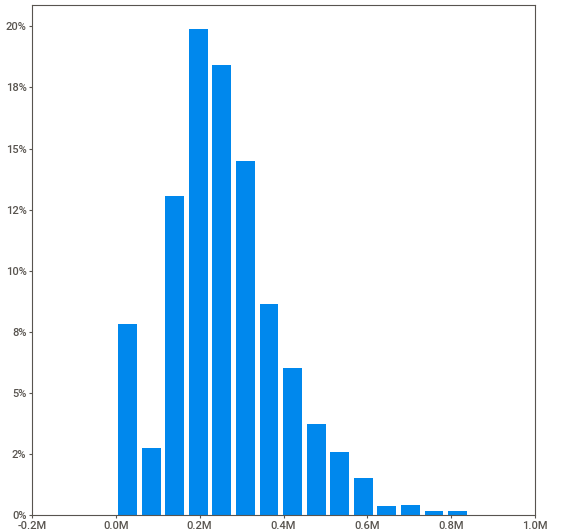
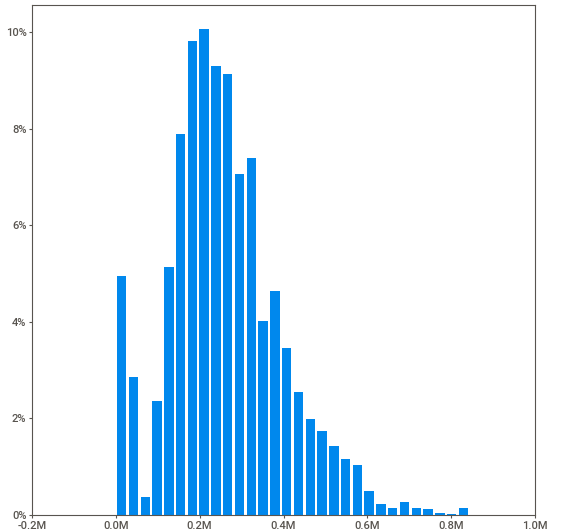
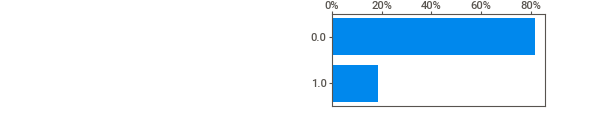
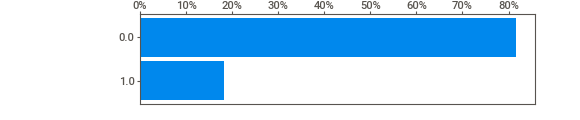
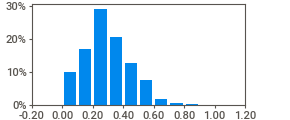
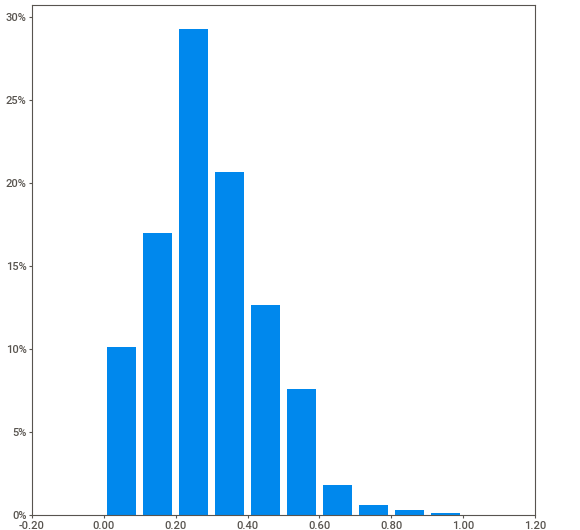
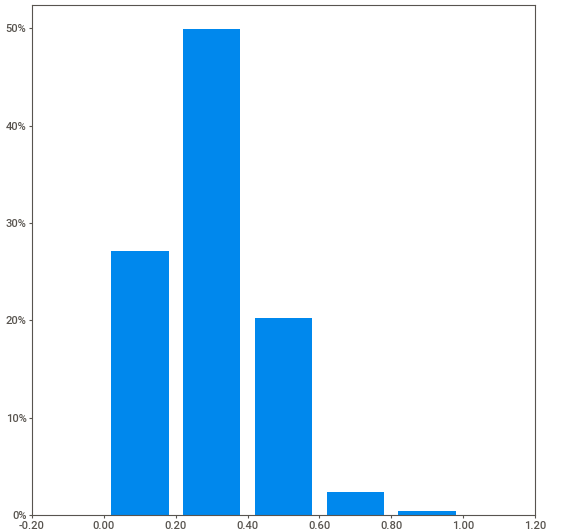
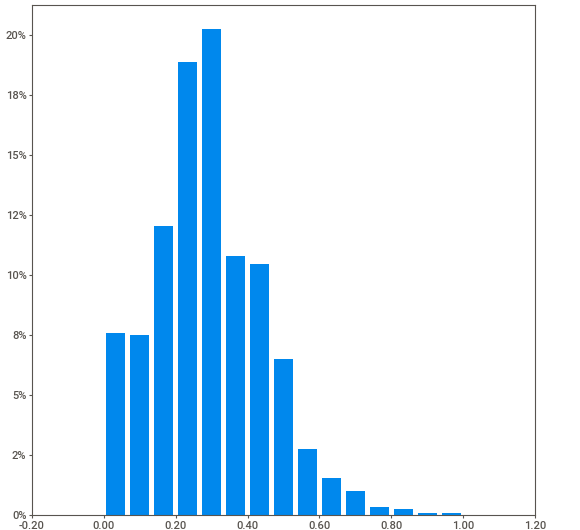
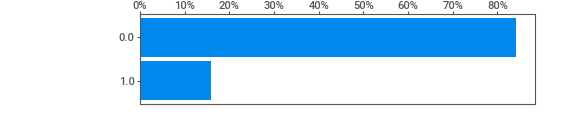
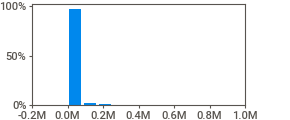
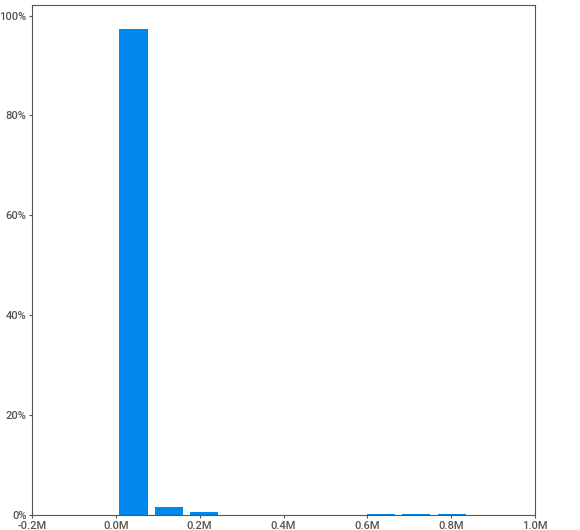
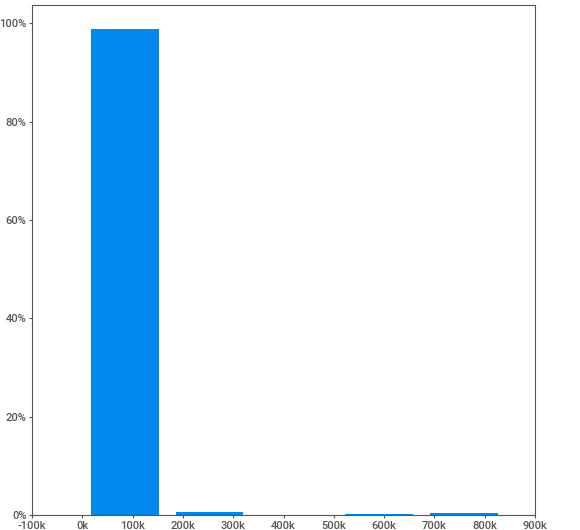
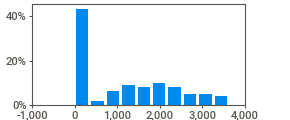
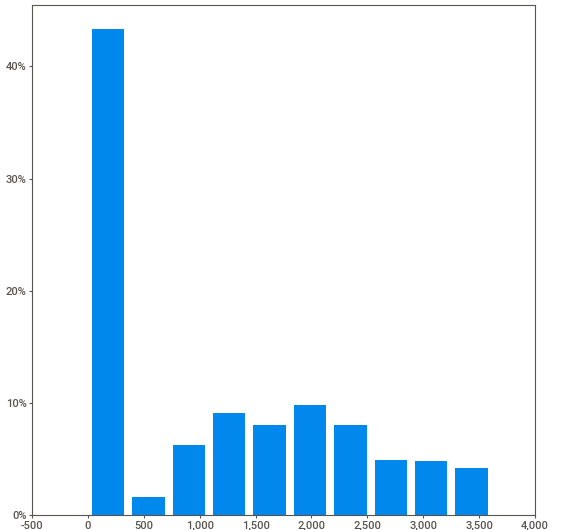
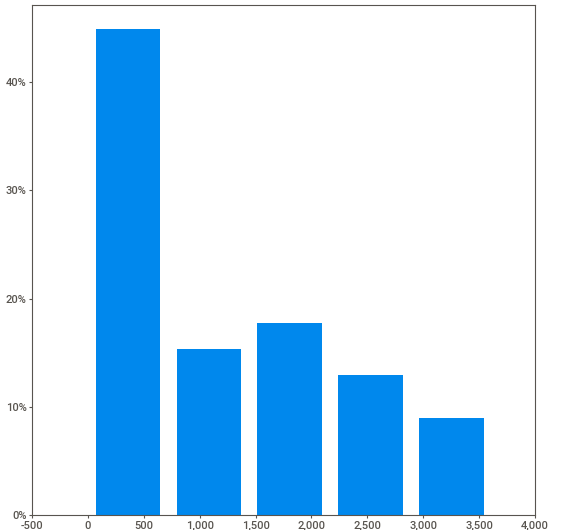
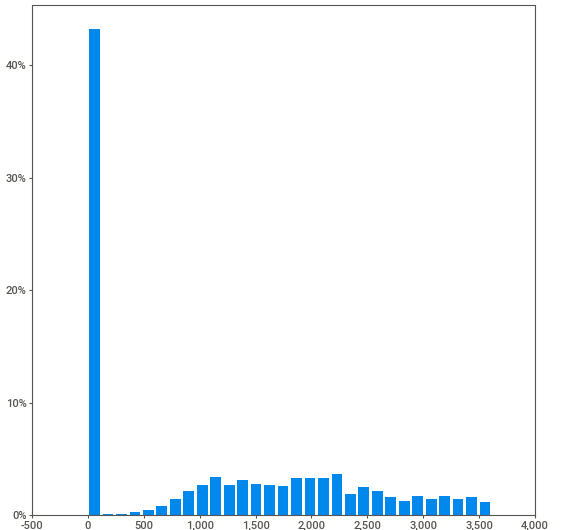
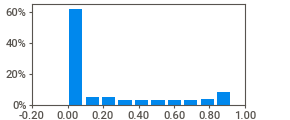
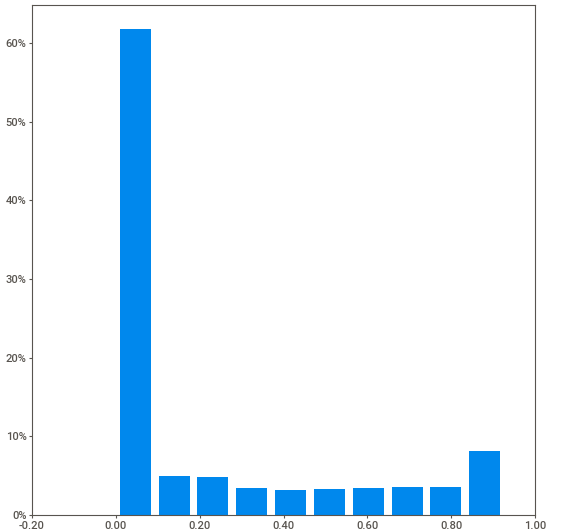
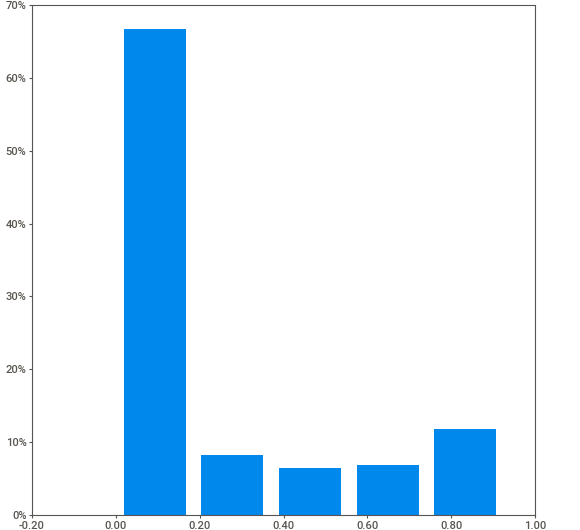
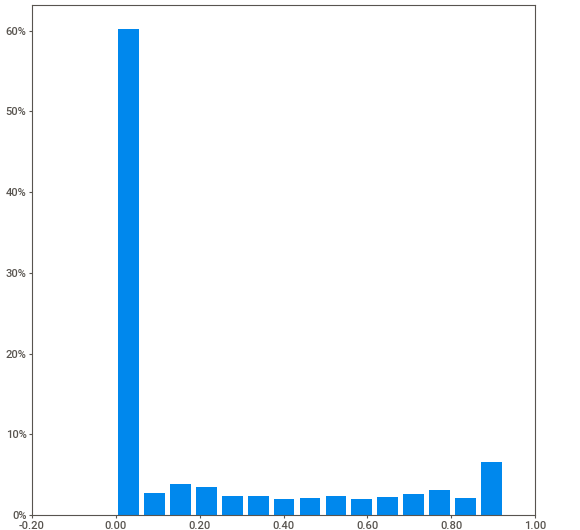
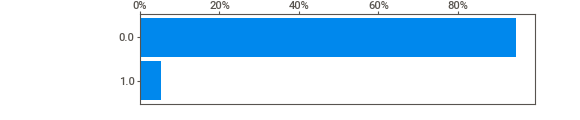
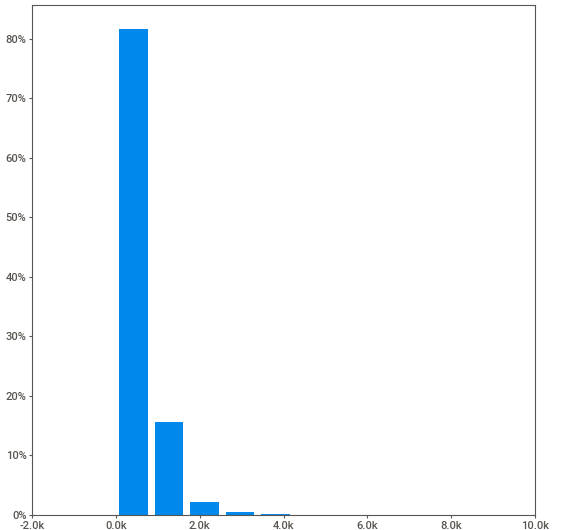
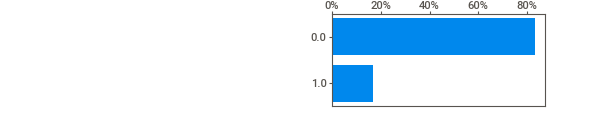
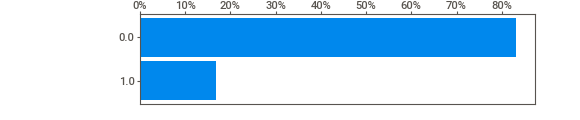
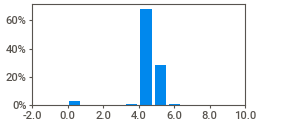
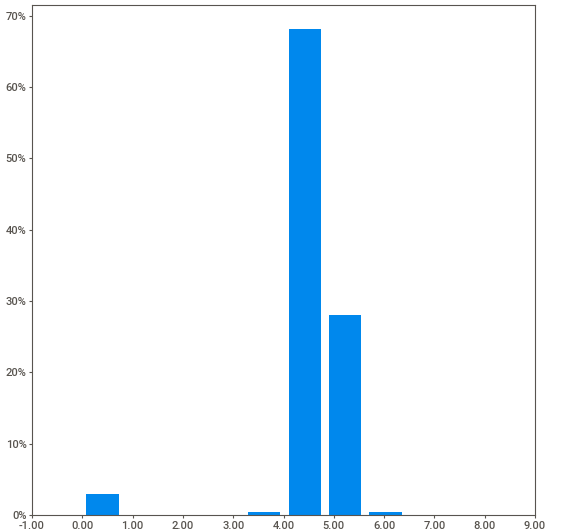
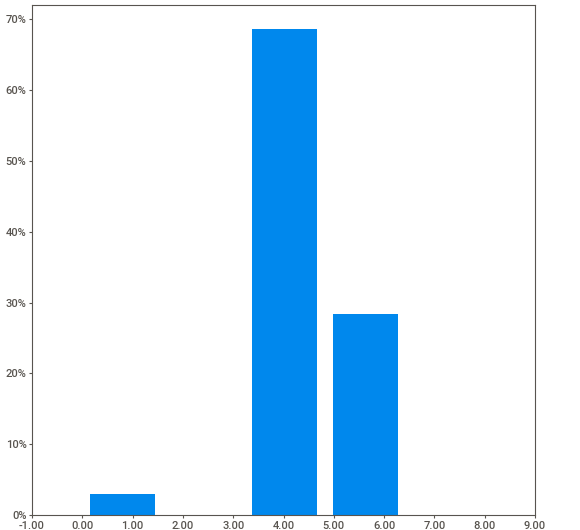
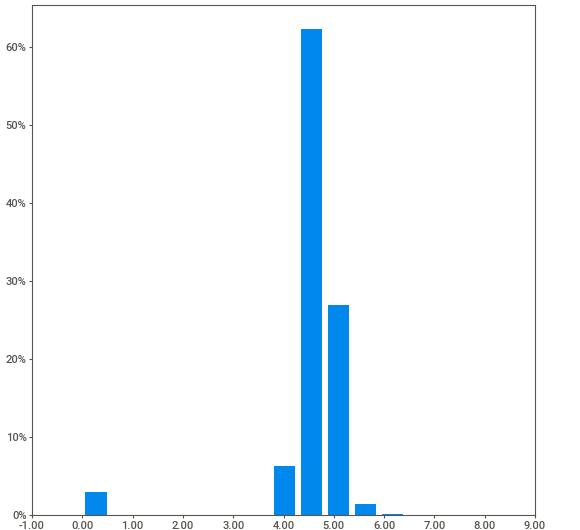
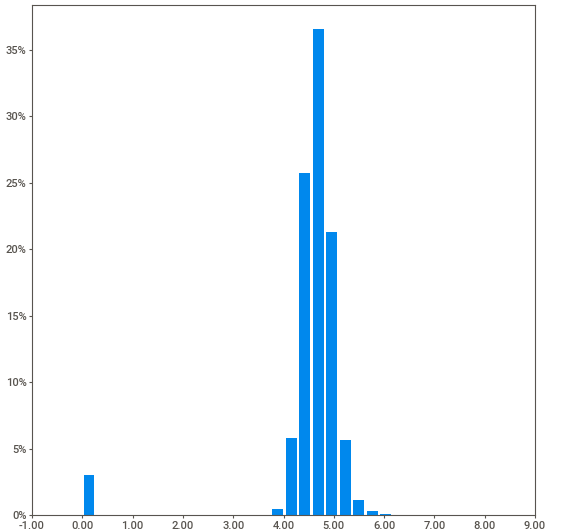
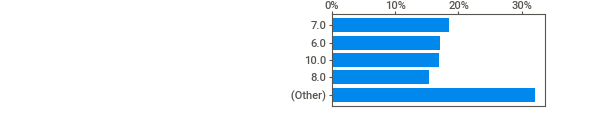
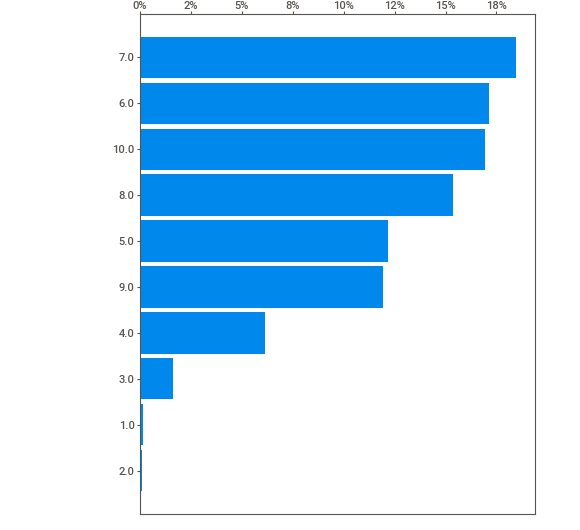
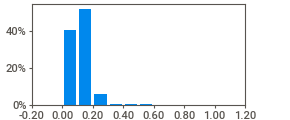
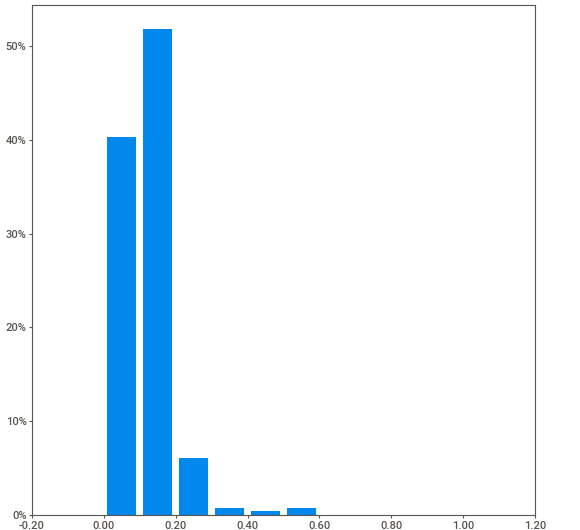
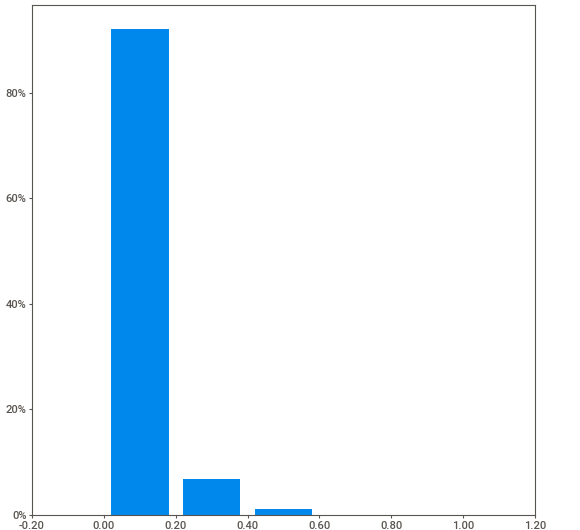
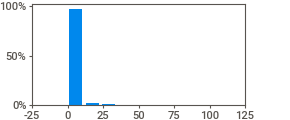
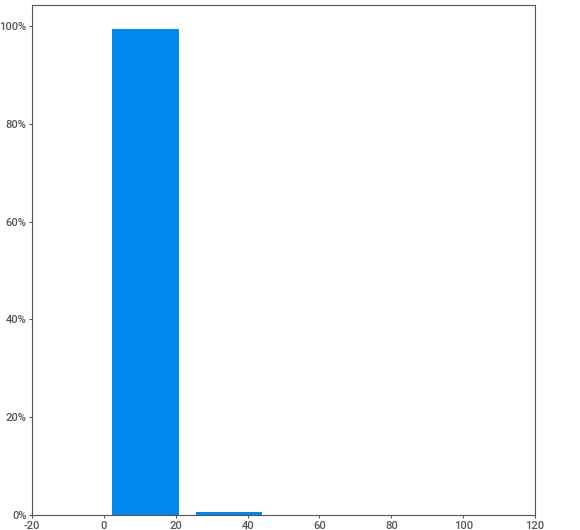
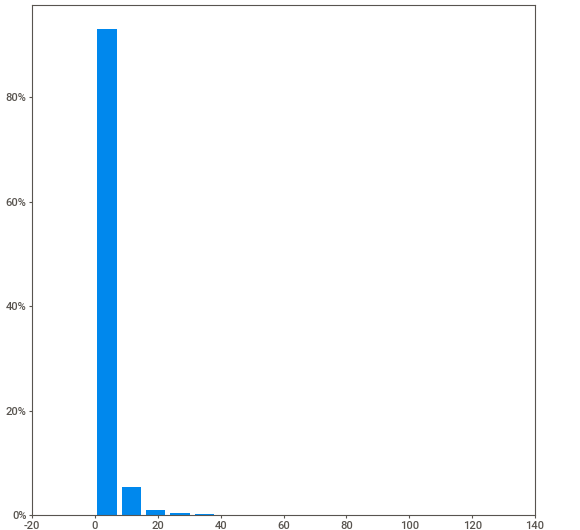
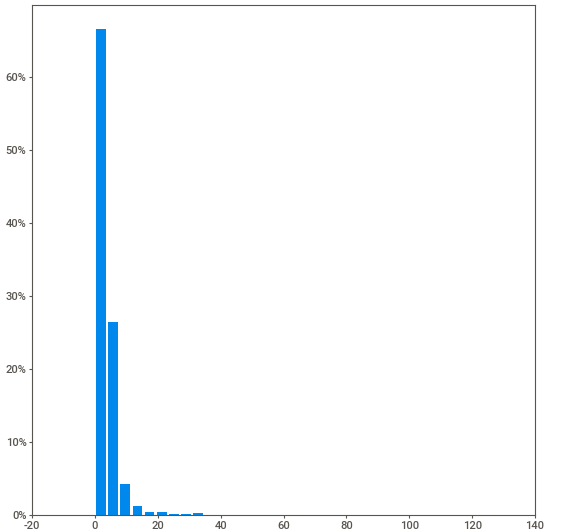
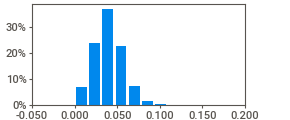
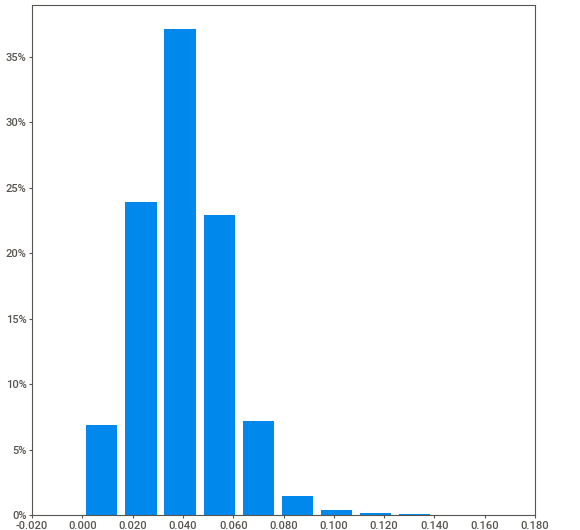
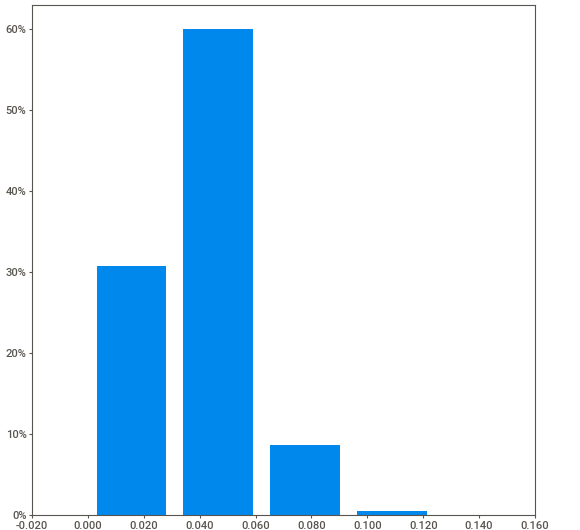
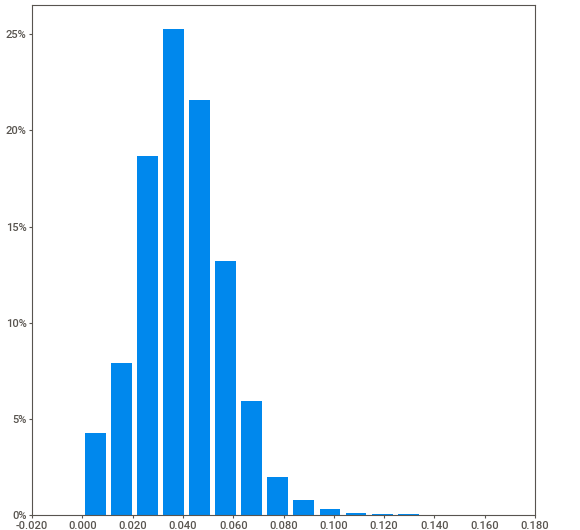
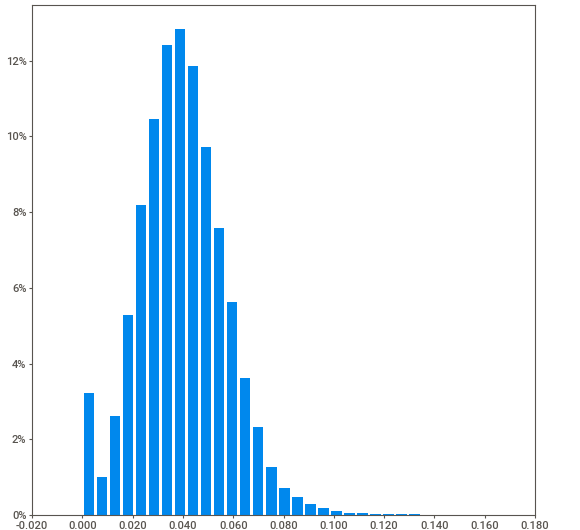
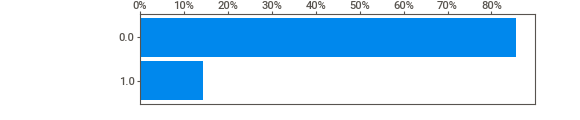
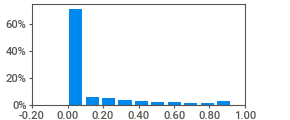
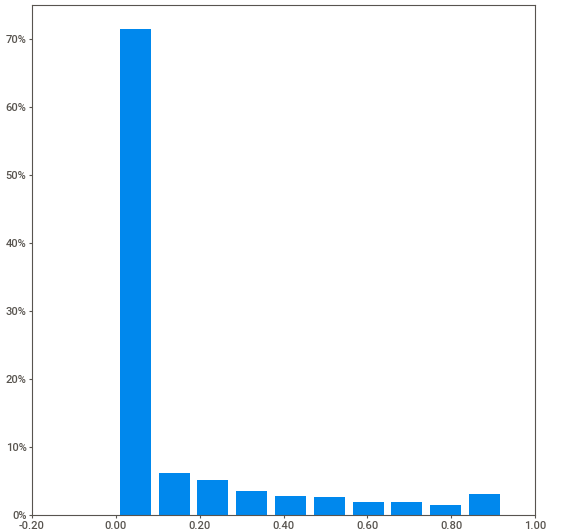
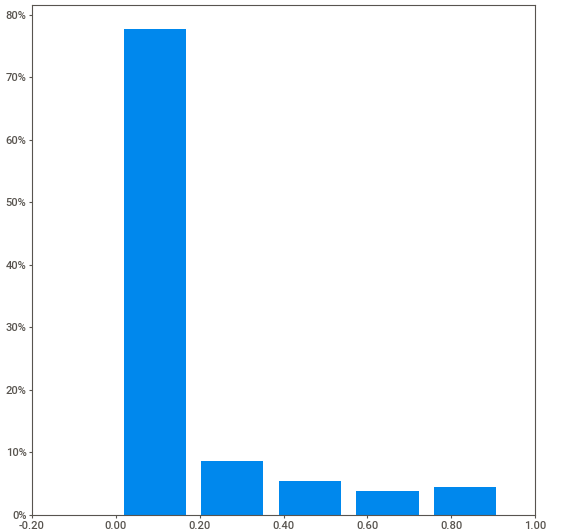
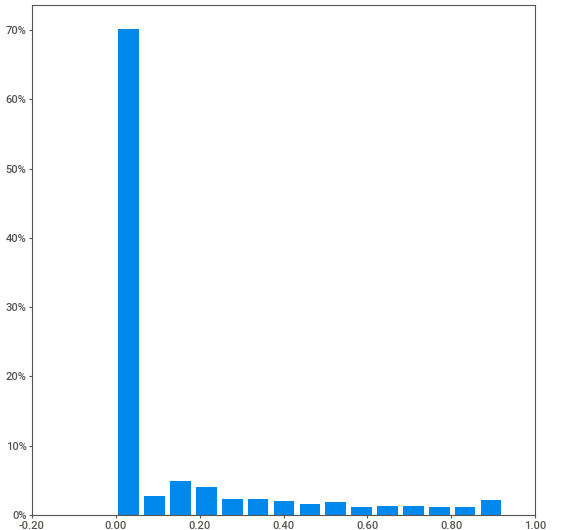
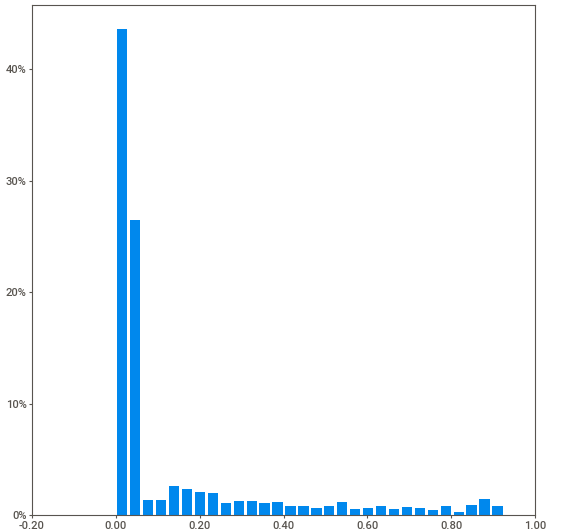
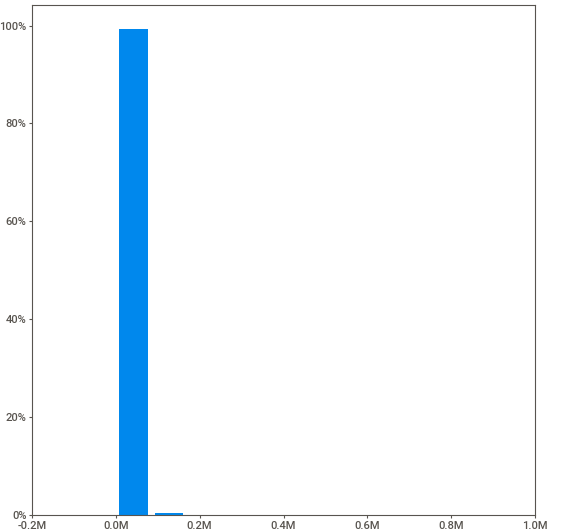
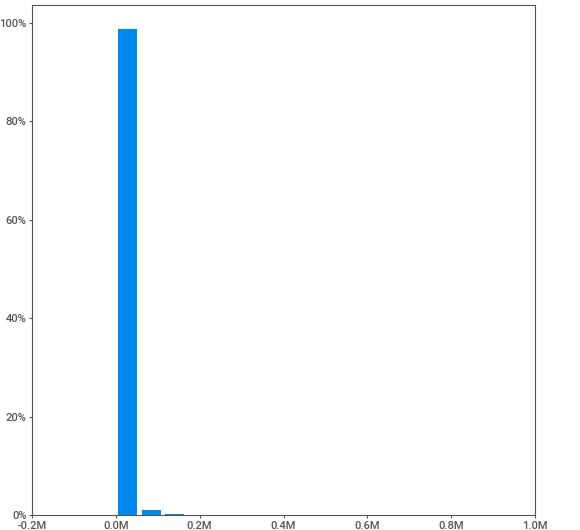
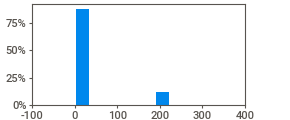
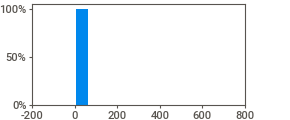
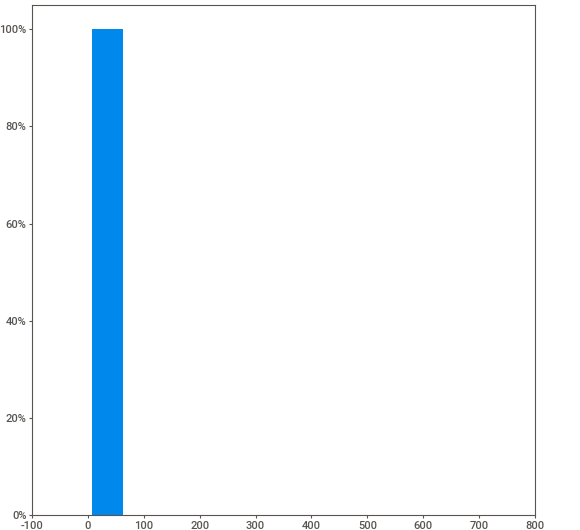
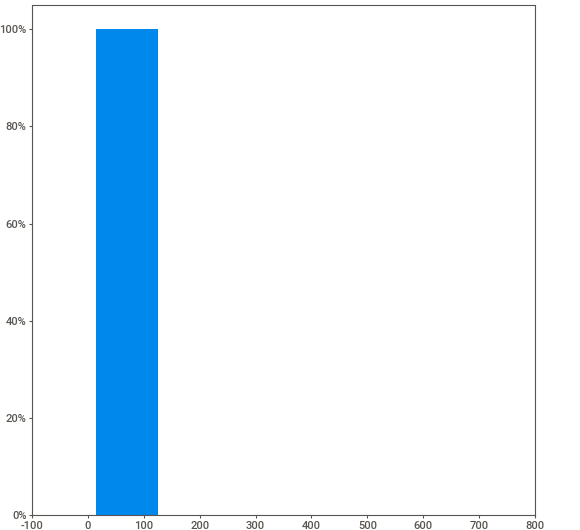
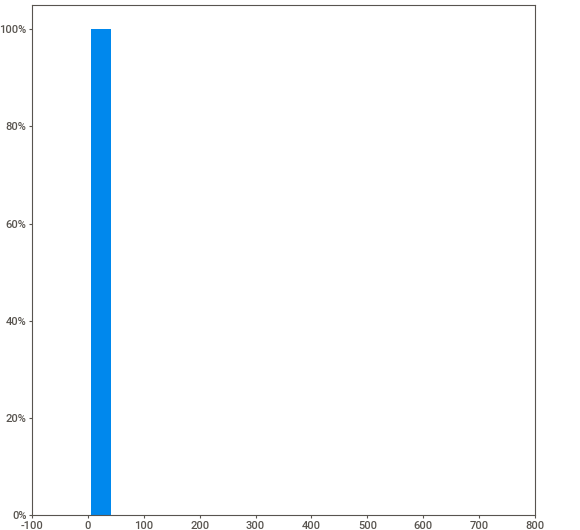
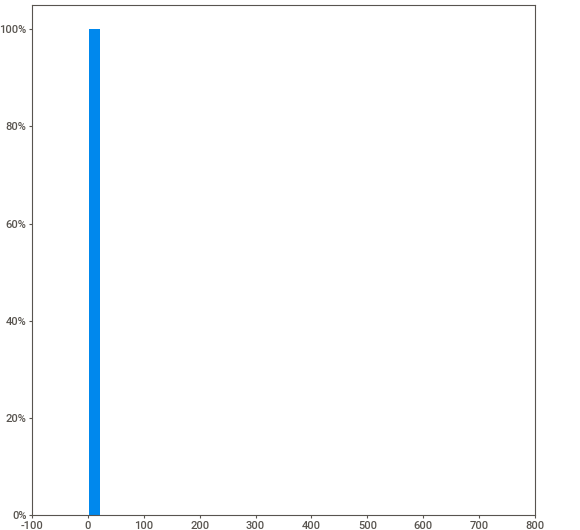
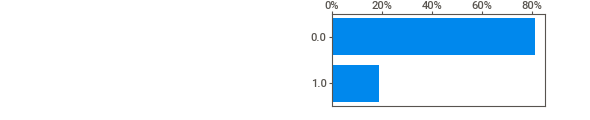
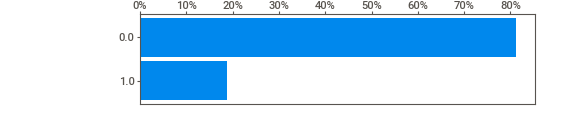
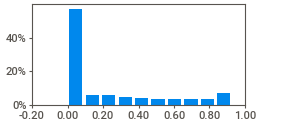
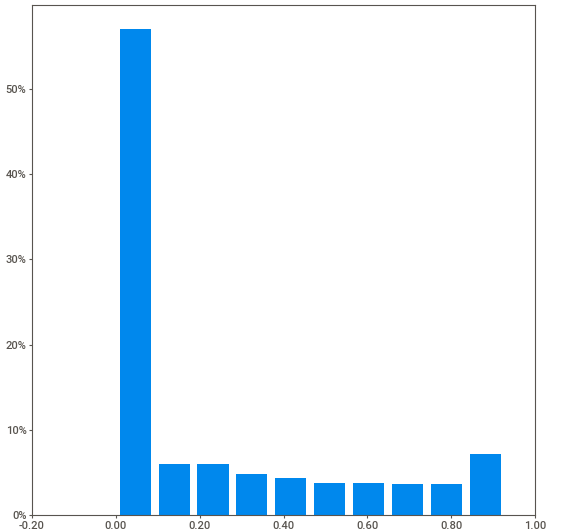
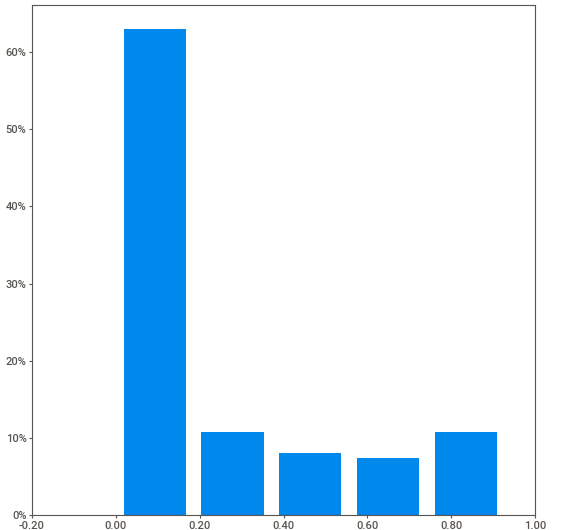
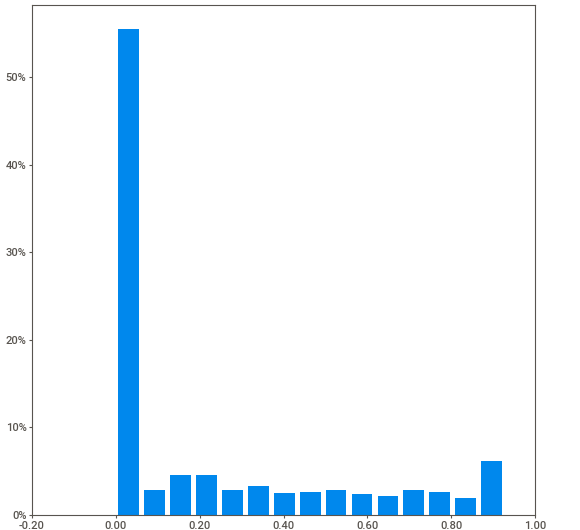
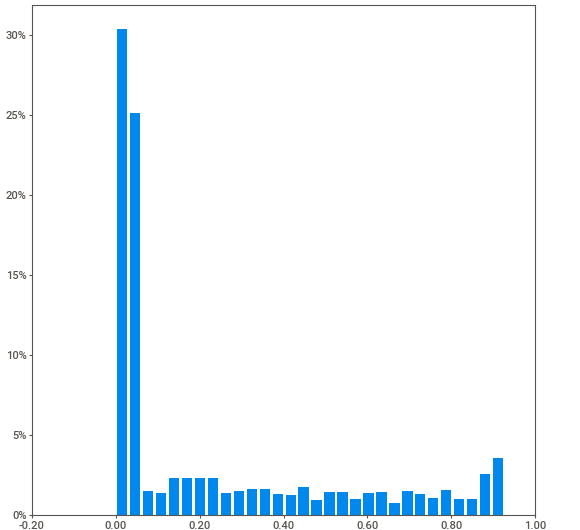
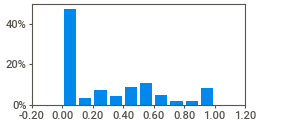
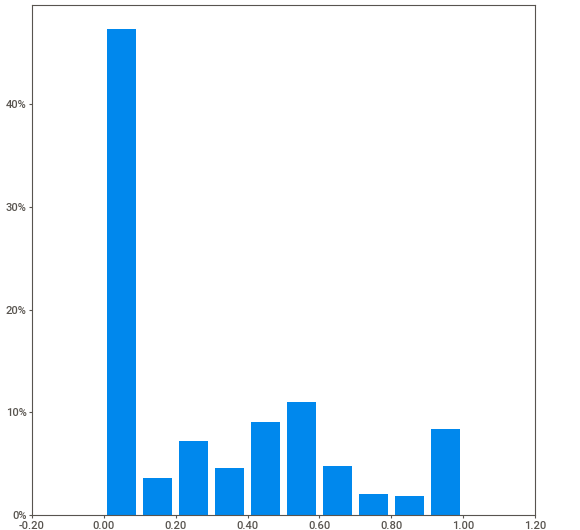
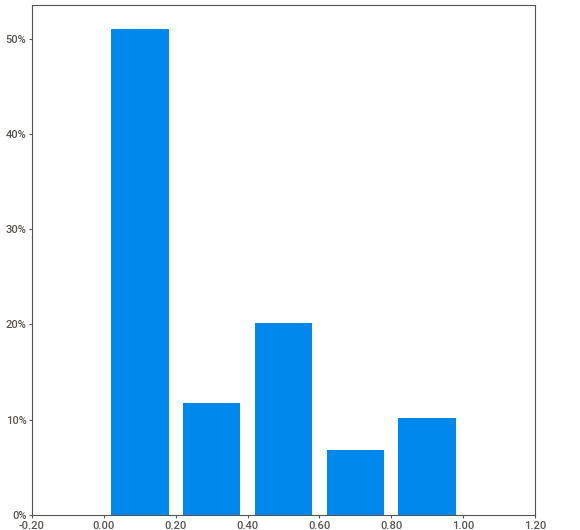
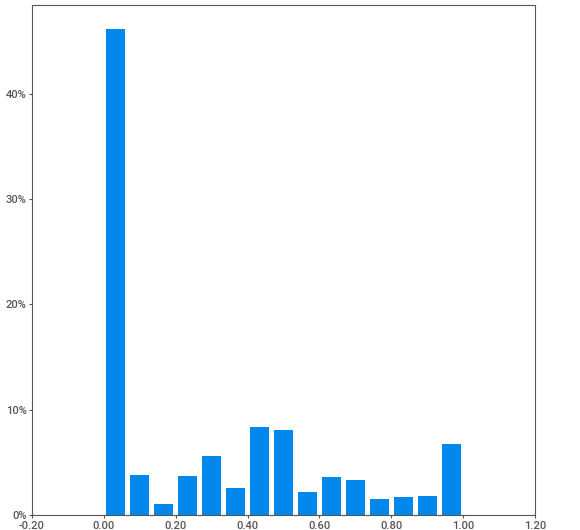
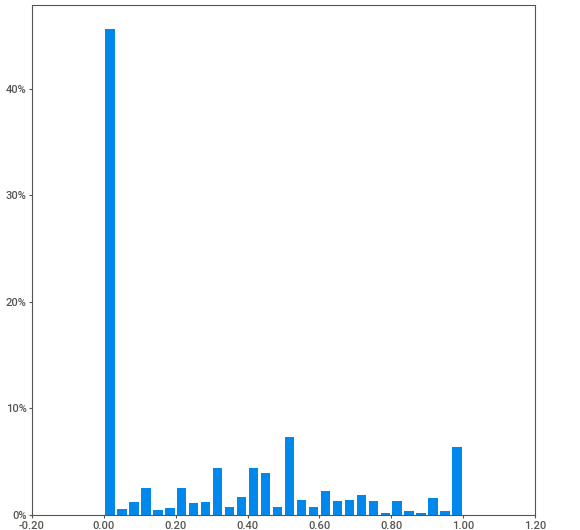
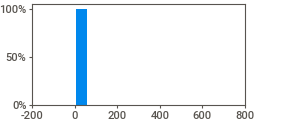
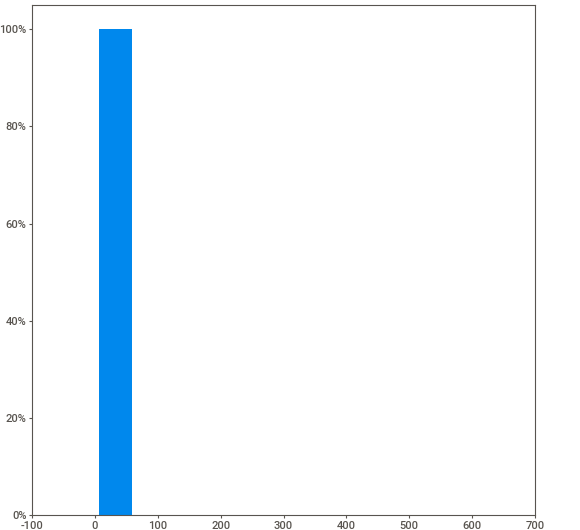
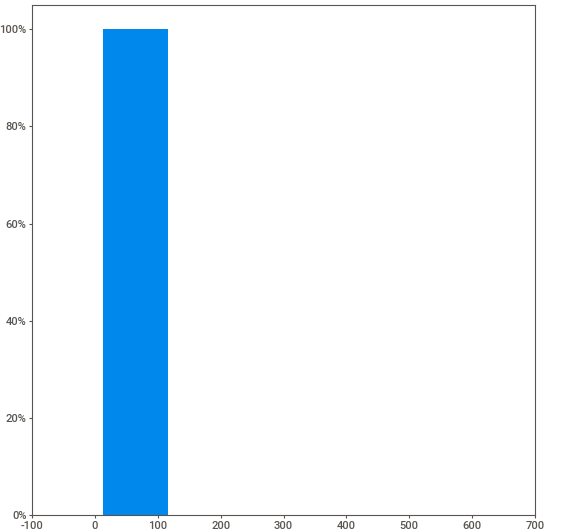
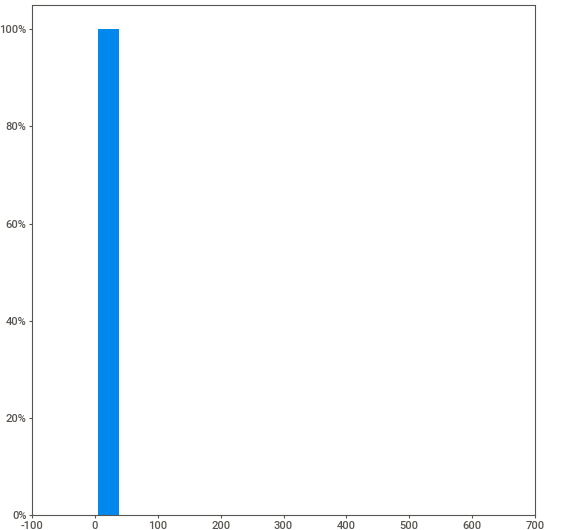
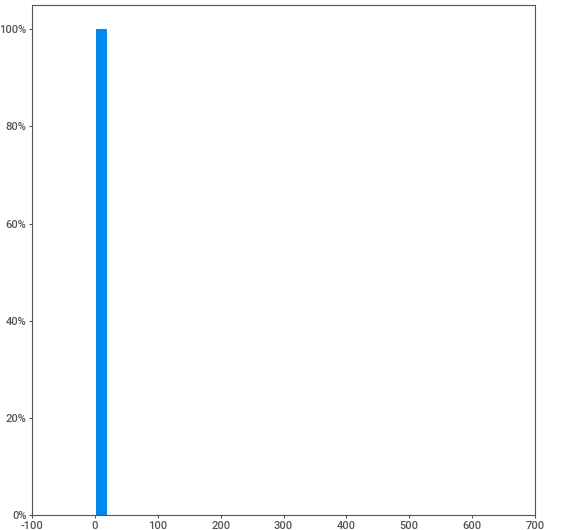
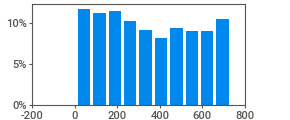
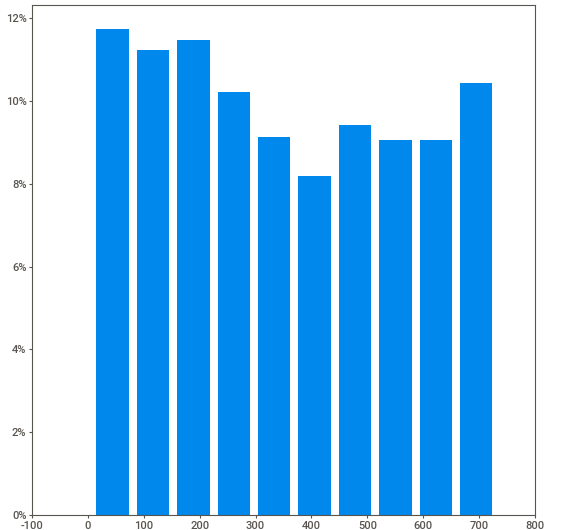
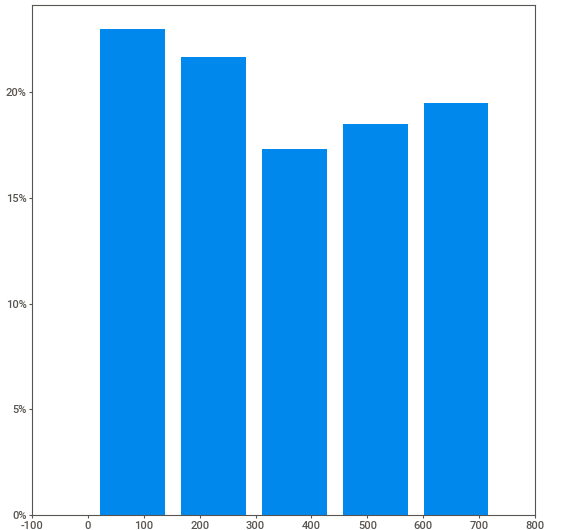
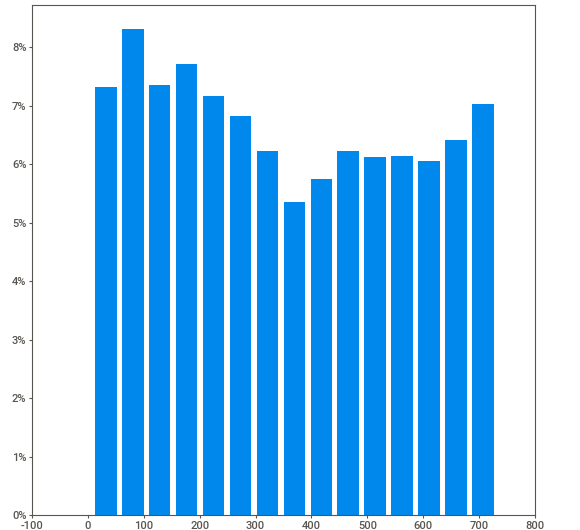
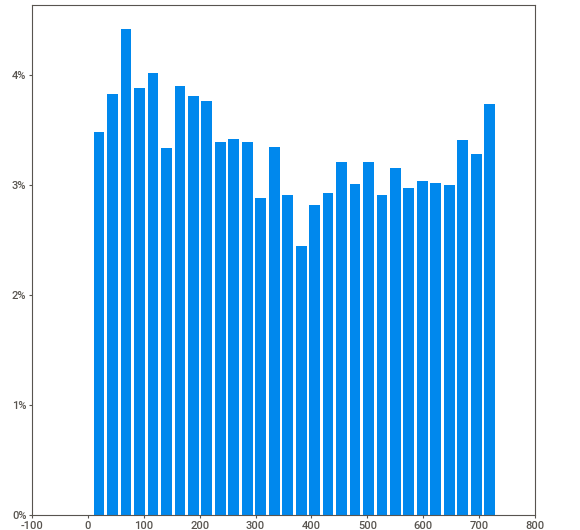
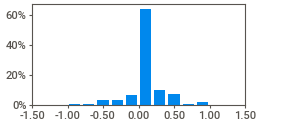
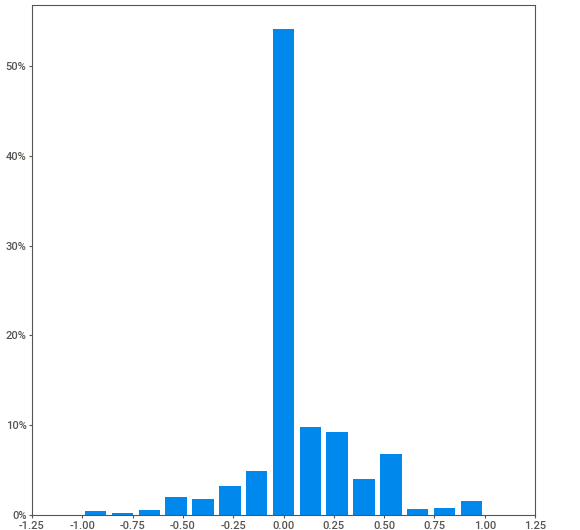
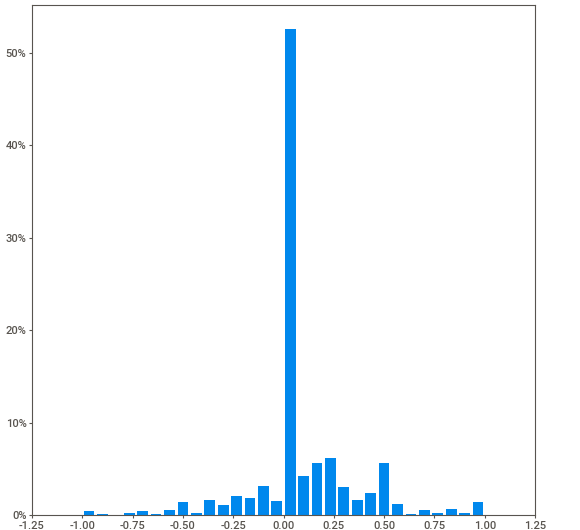
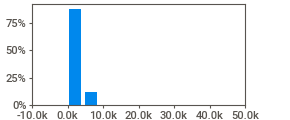
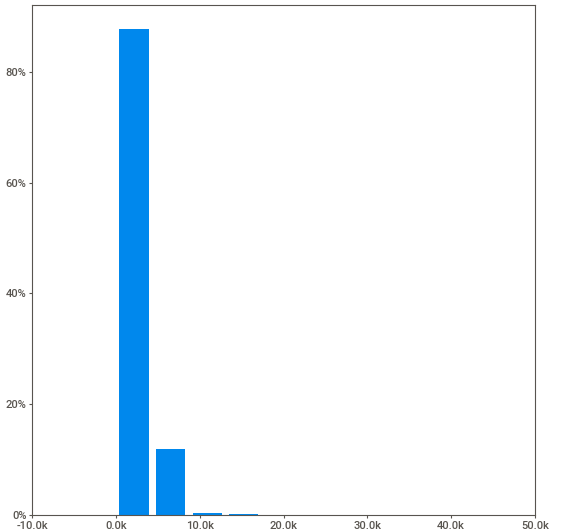
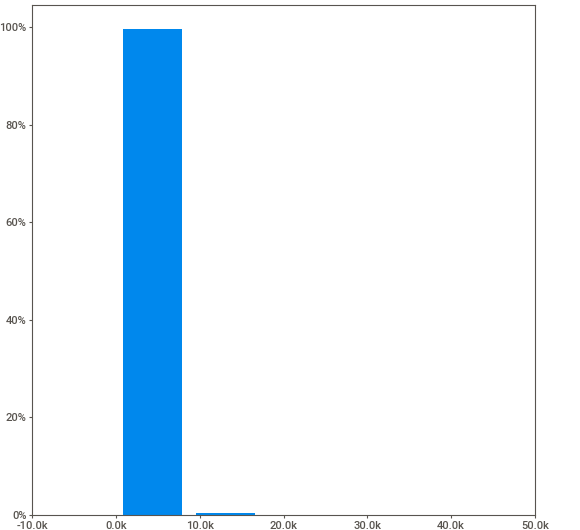
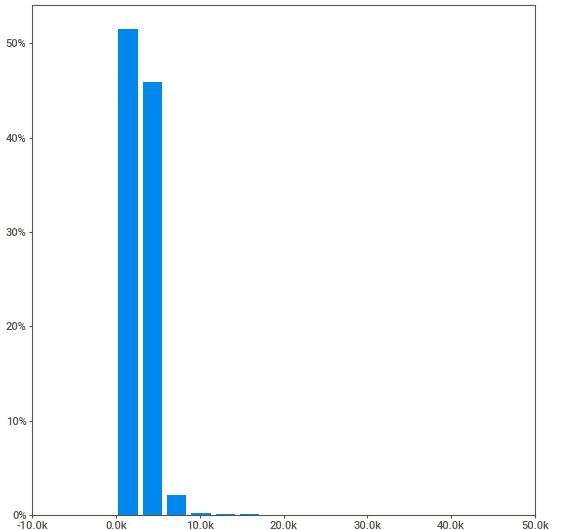
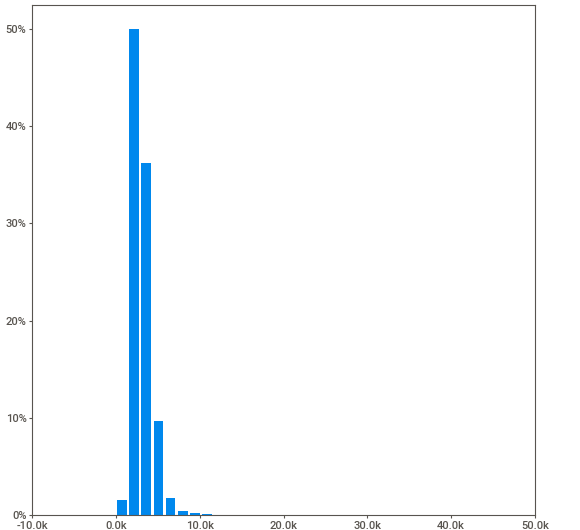
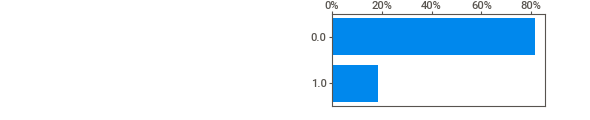
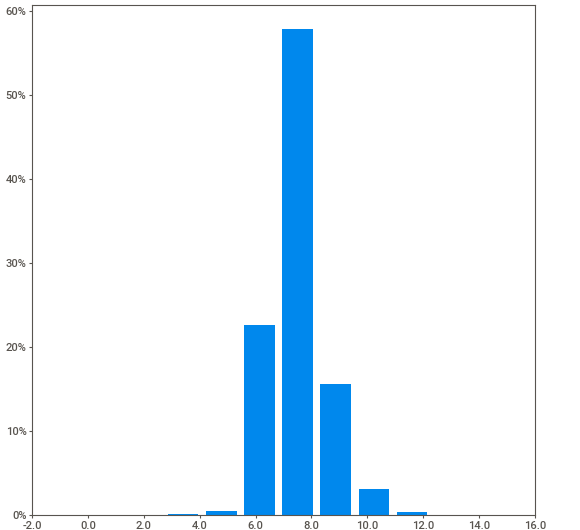
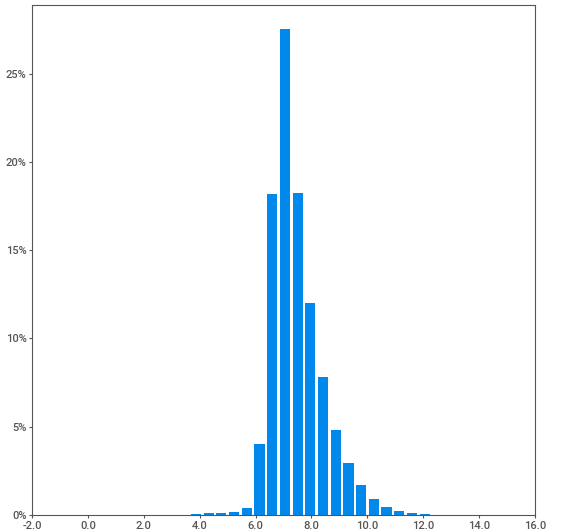
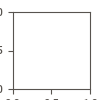

In [ ]:
report = sv.analyze(df)
report.show_notebook()

5. _Write an EDA section in your technical report. Report the results of the initial models and include figures or tables that show the target variable and its relationship with potentially significant predictors._


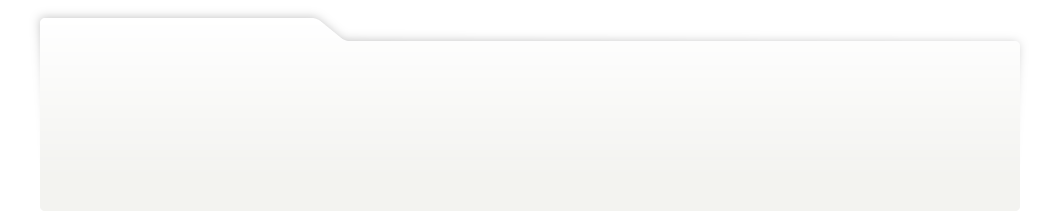
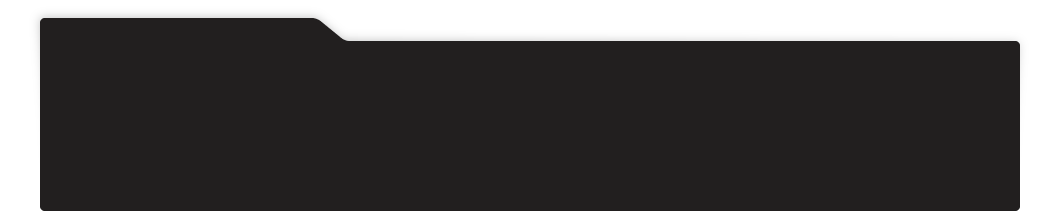
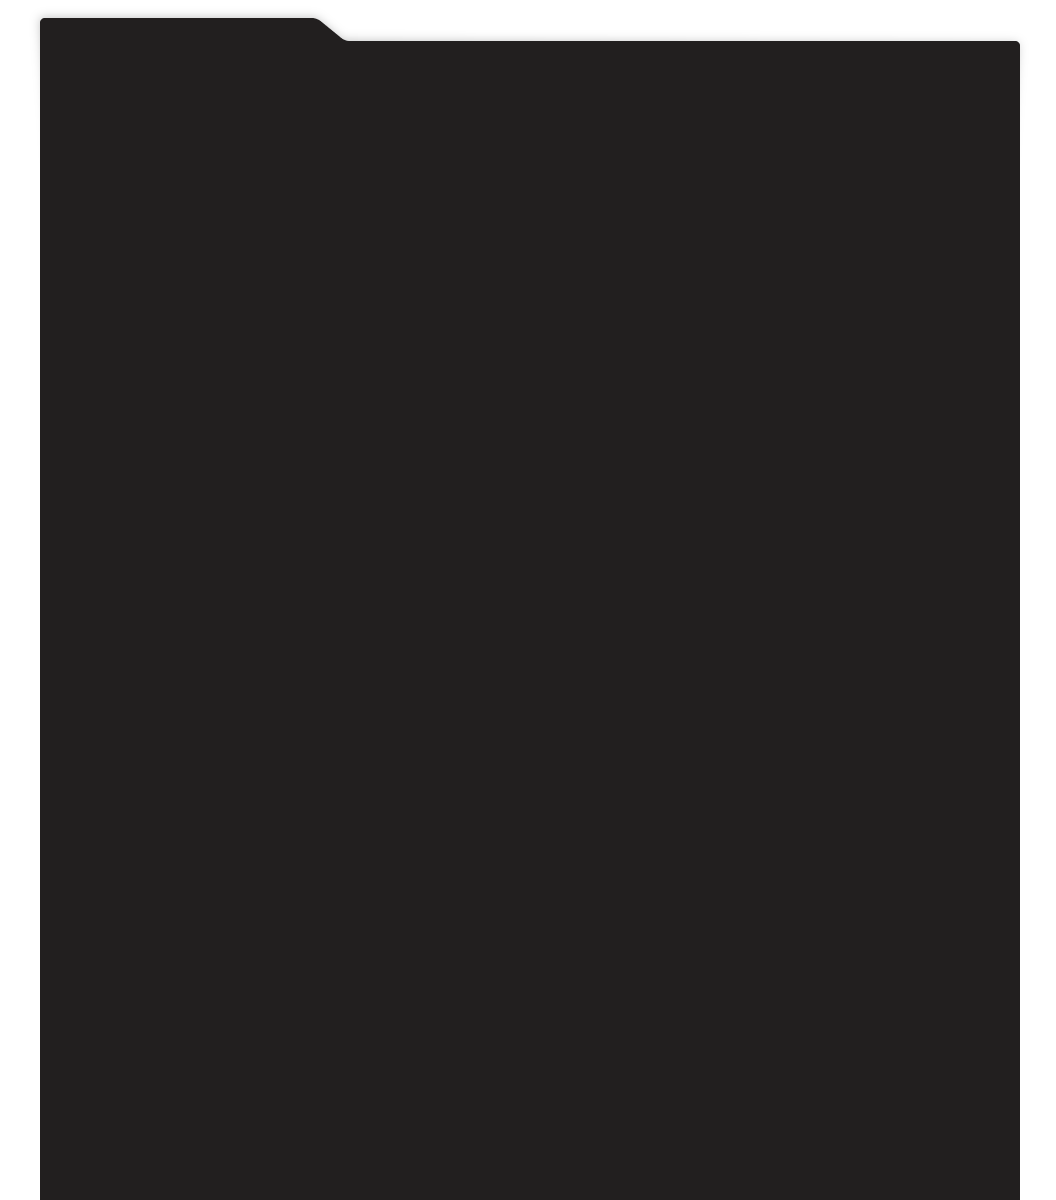
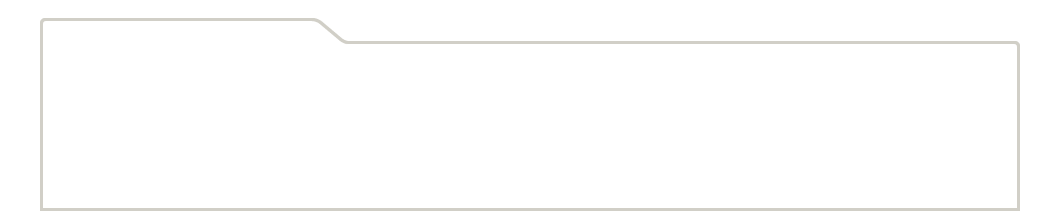
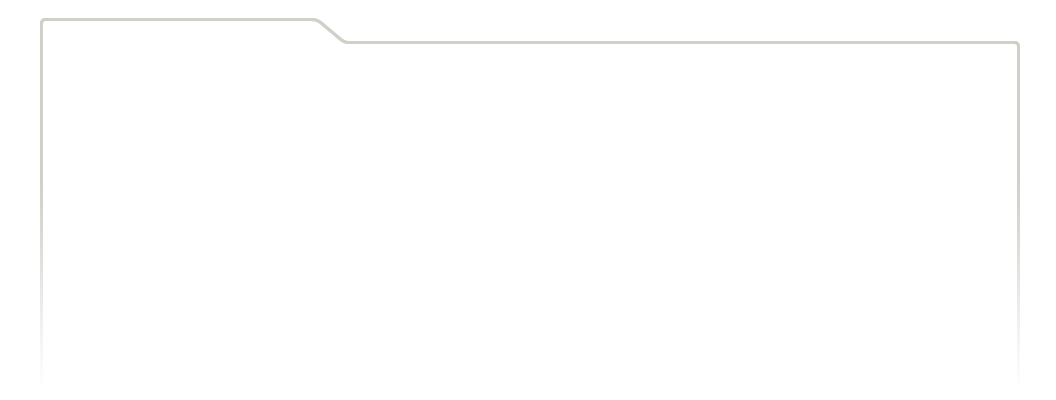
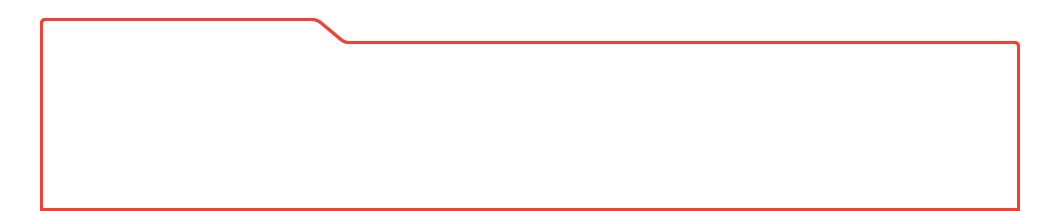
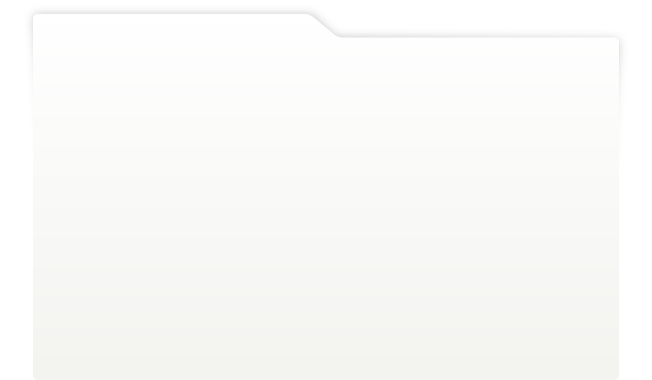
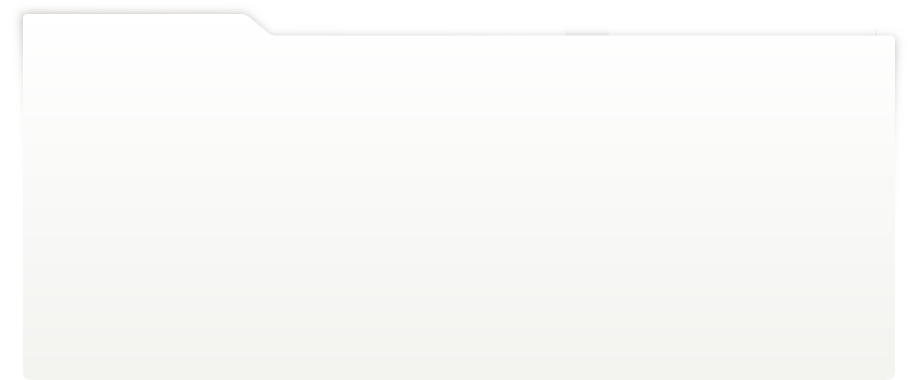
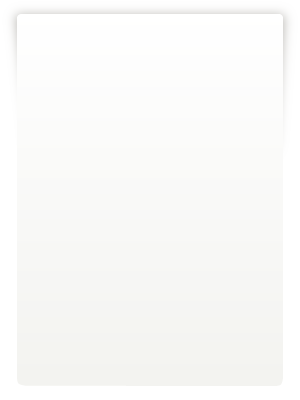
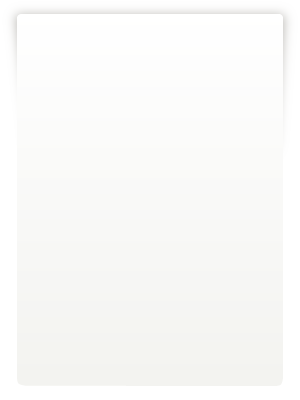
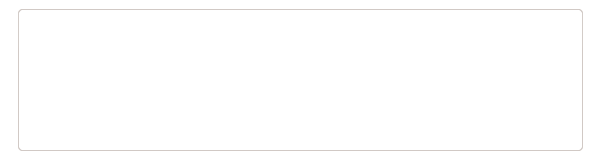
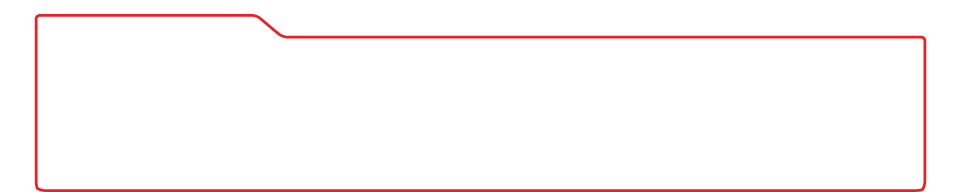
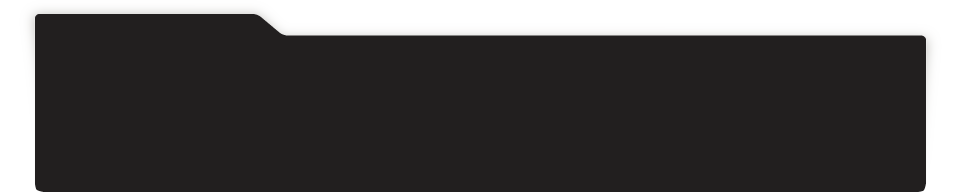
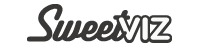
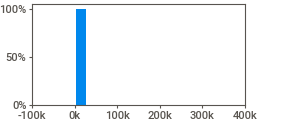
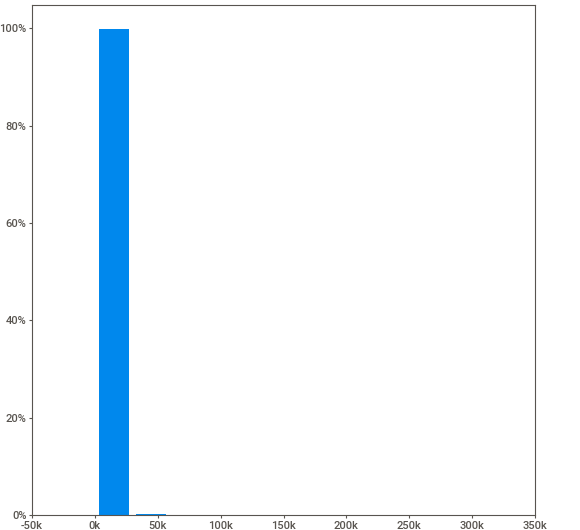
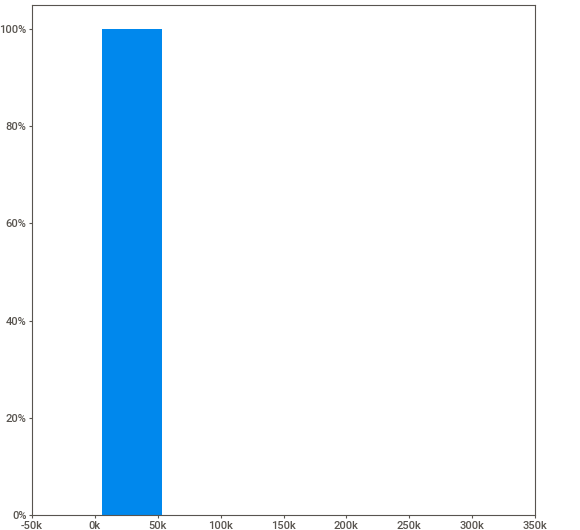
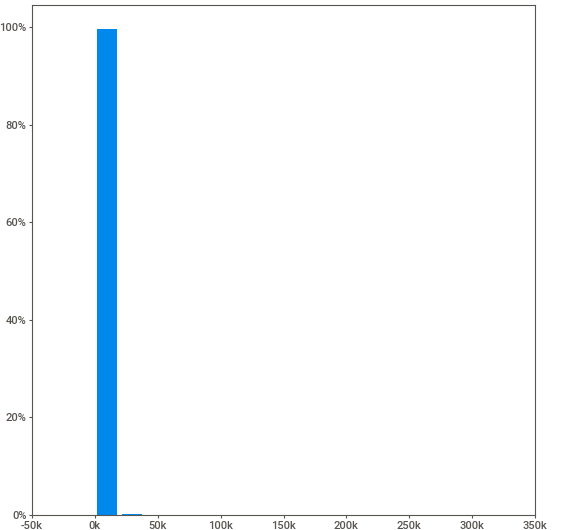
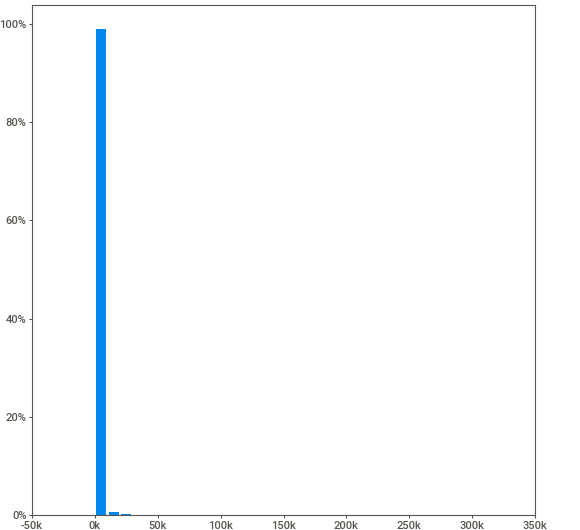
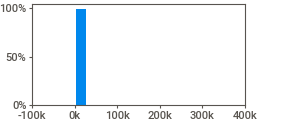
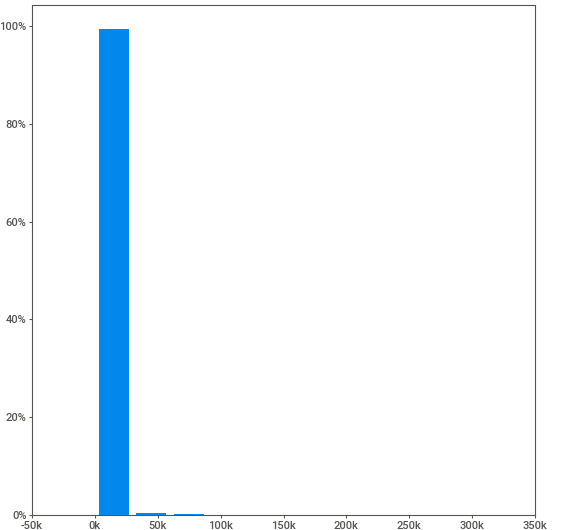
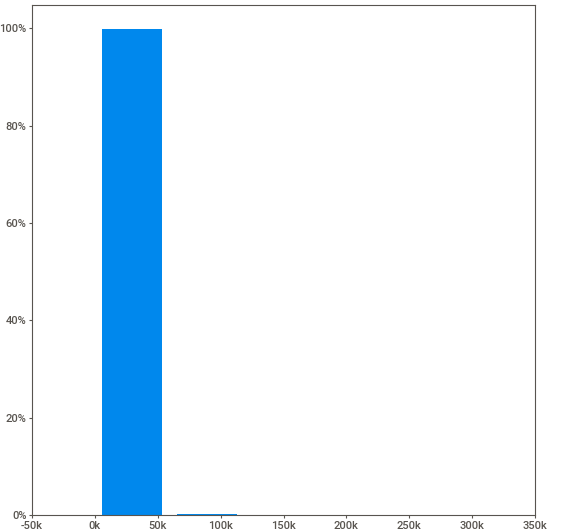
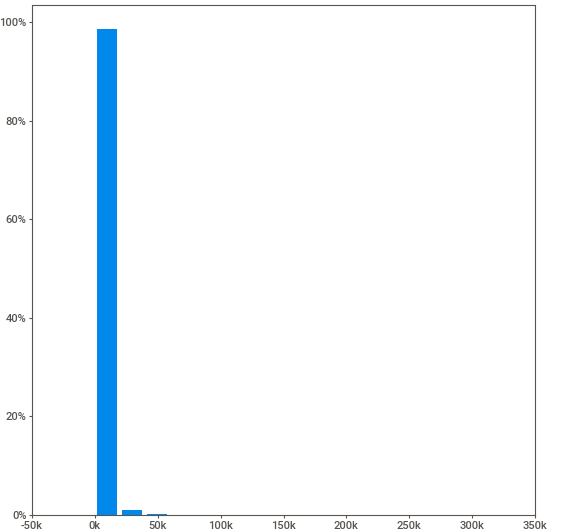
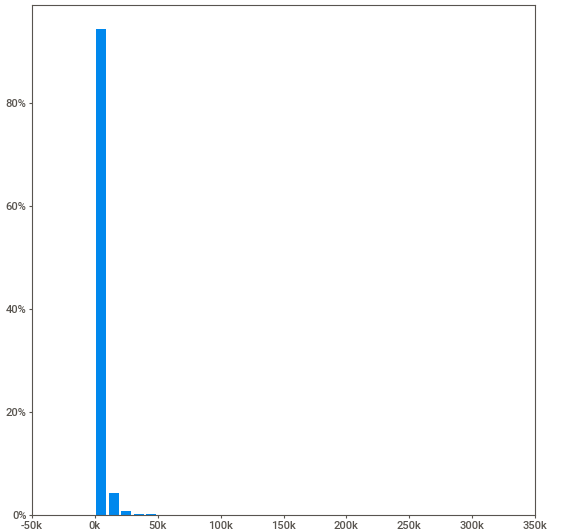
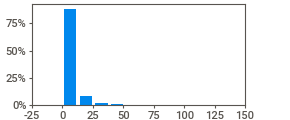
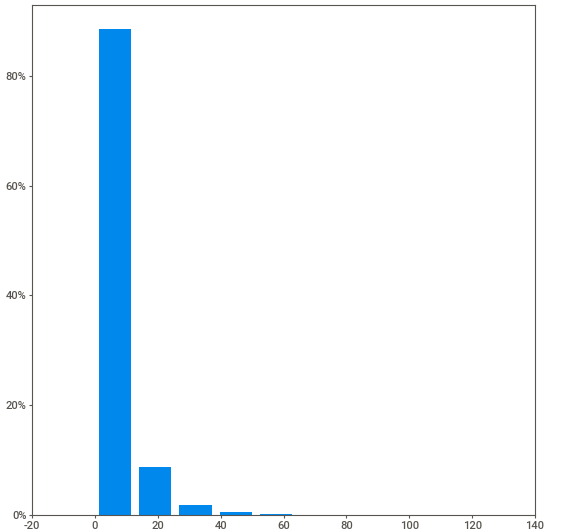
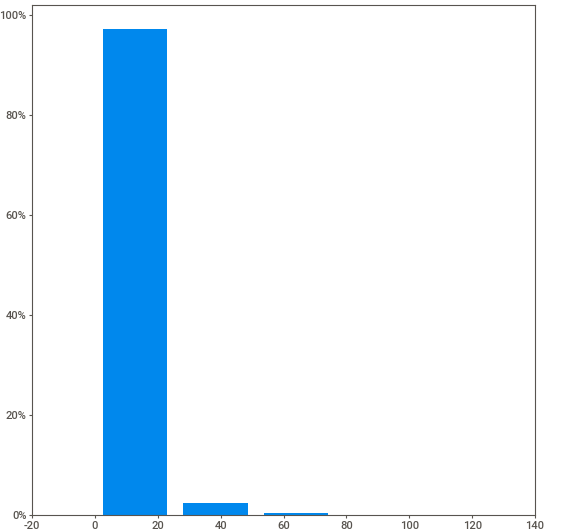
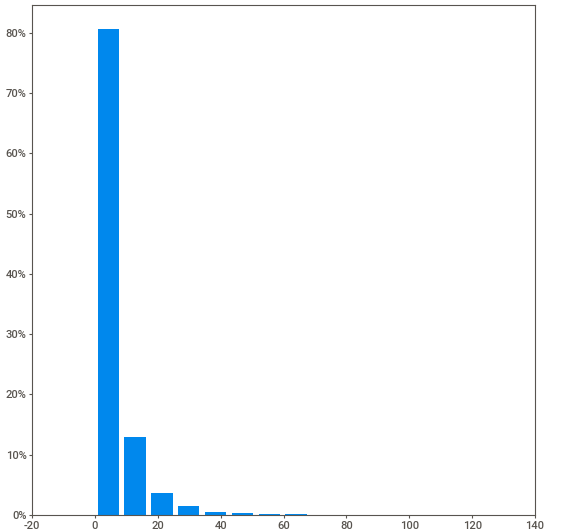
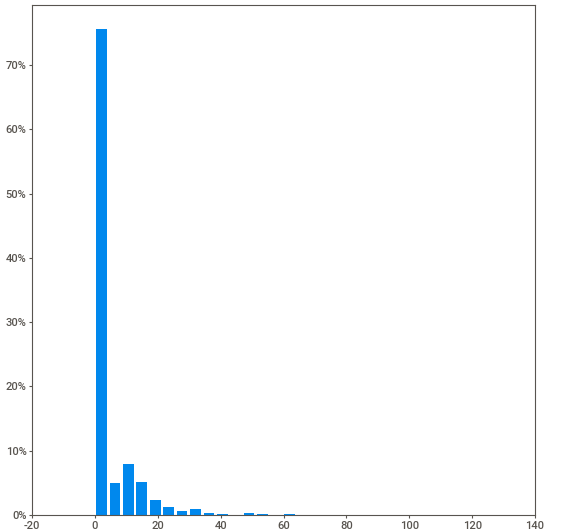
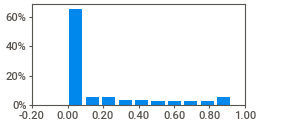
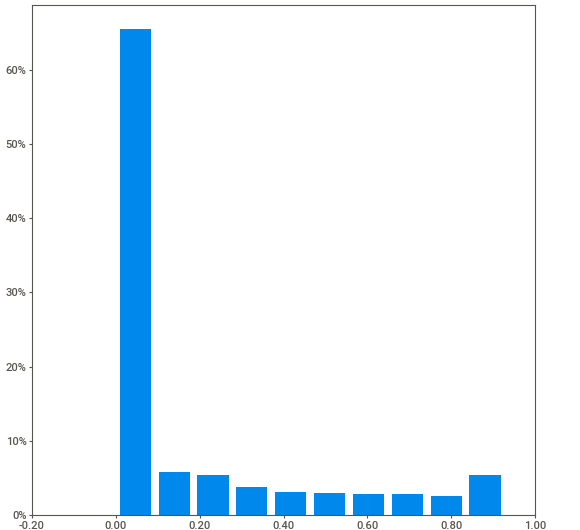
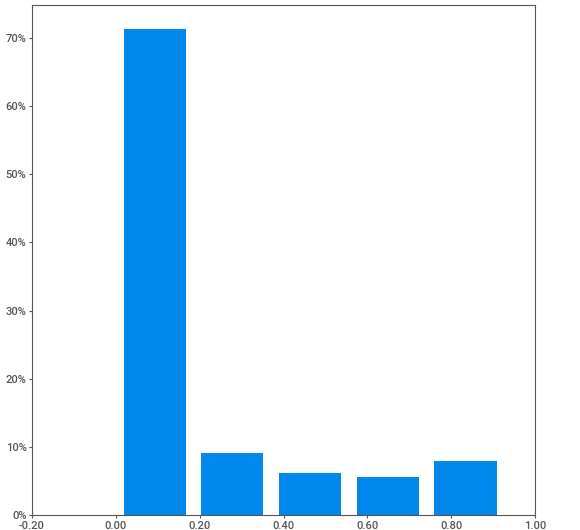
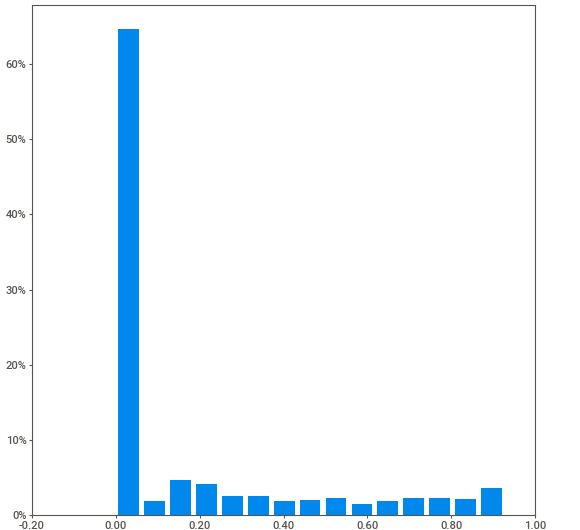
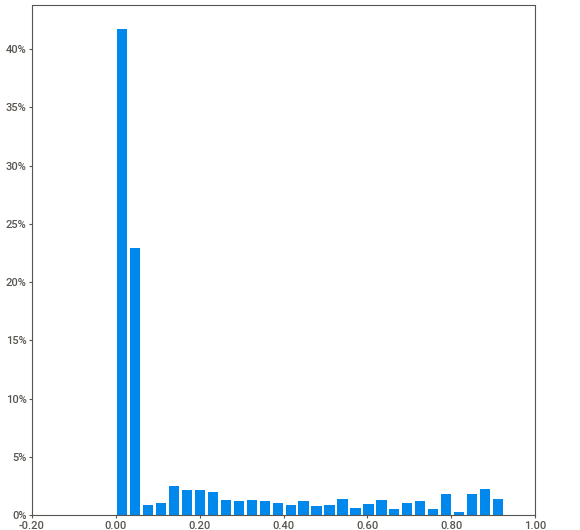
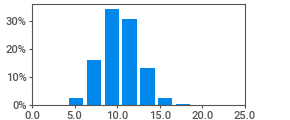
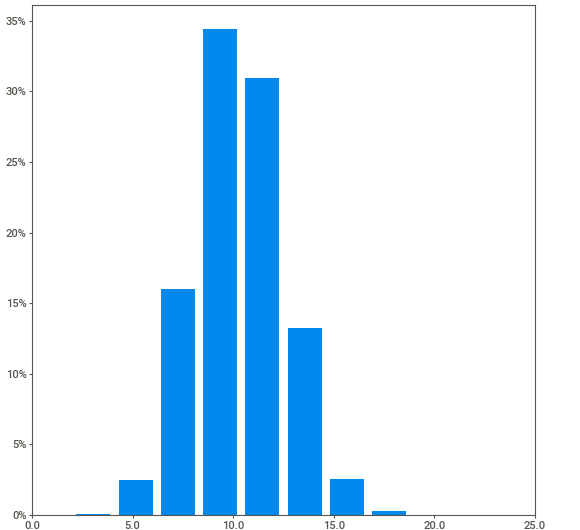
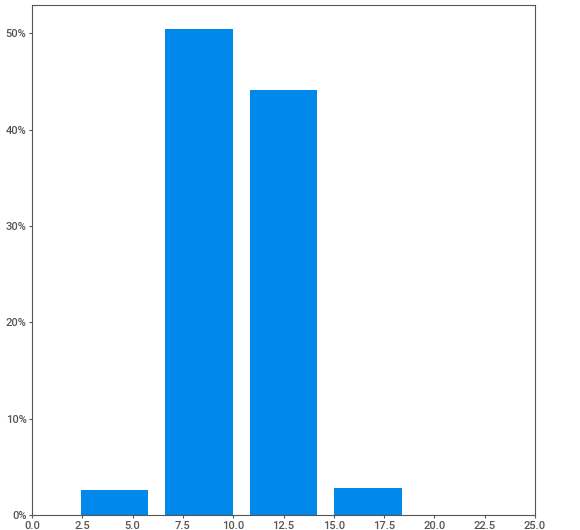
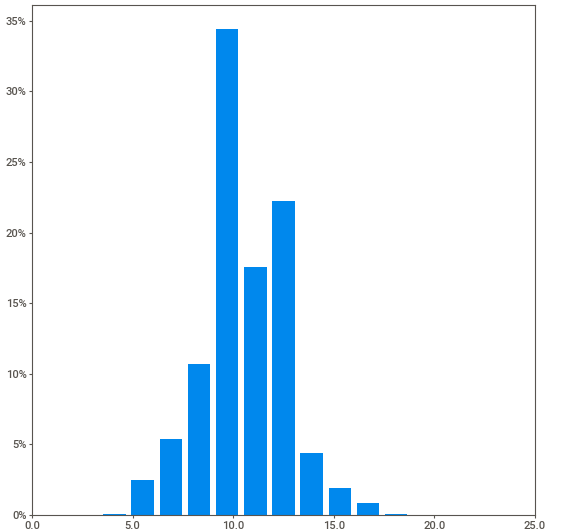
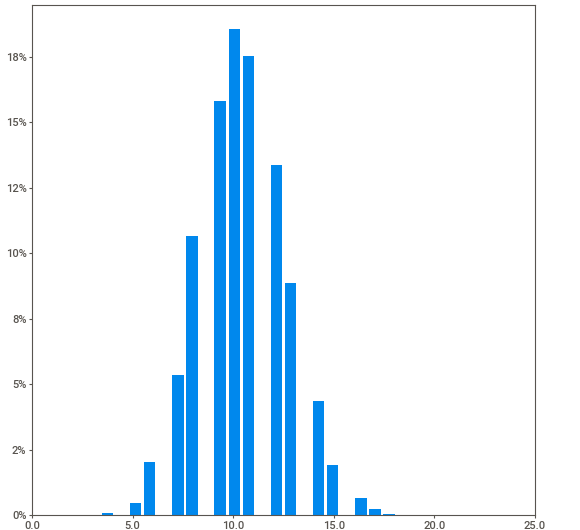
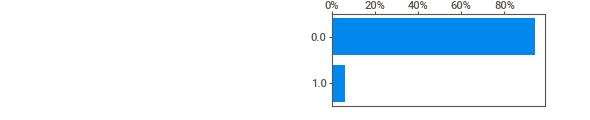
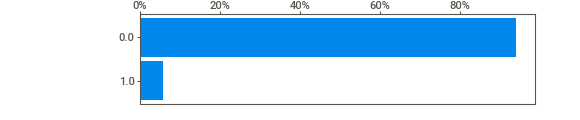
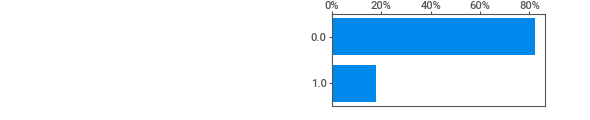
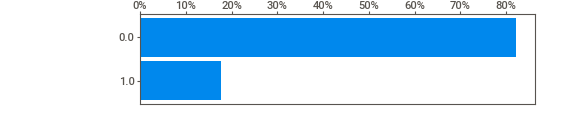
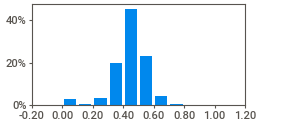
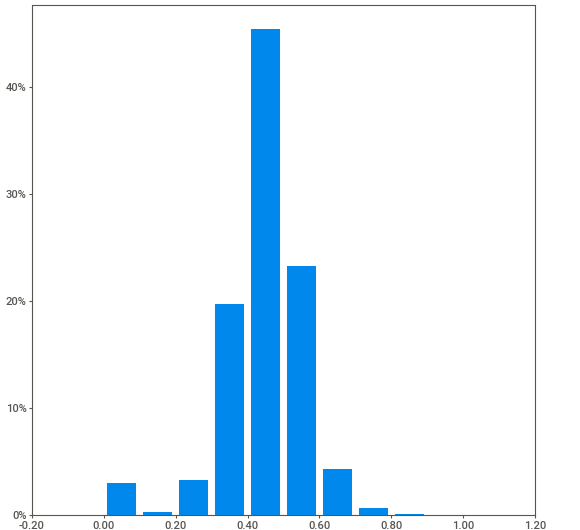
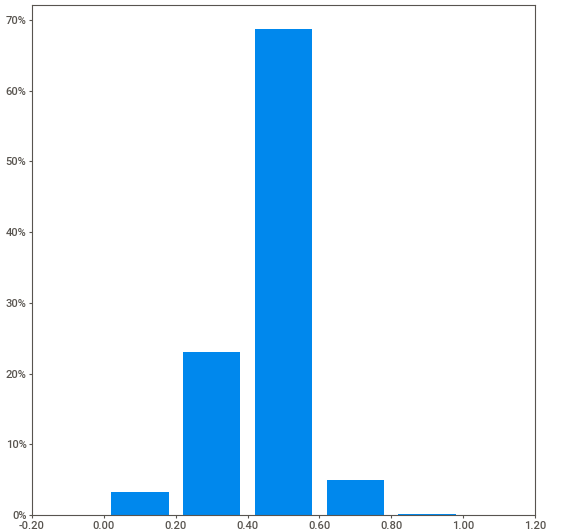
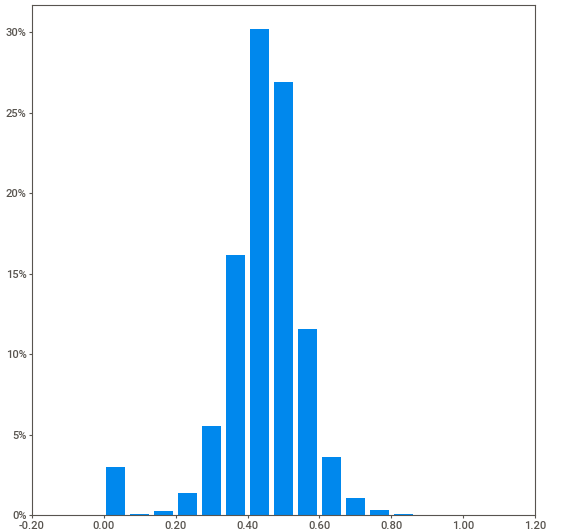
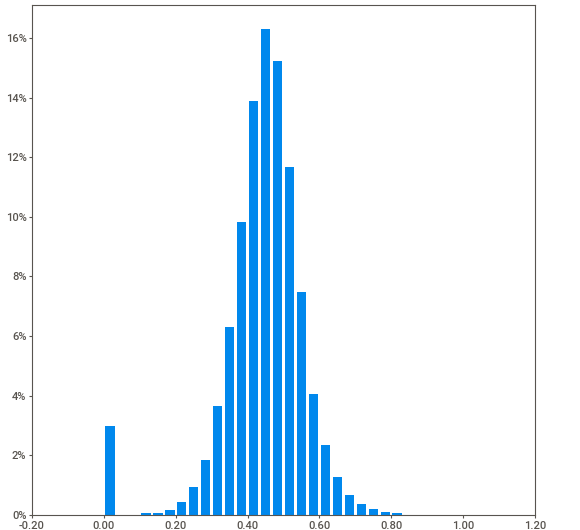
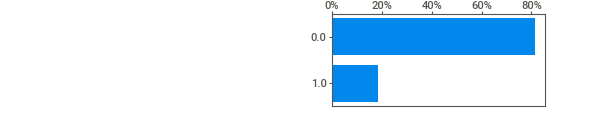
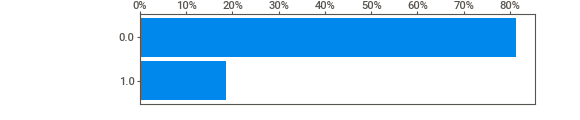
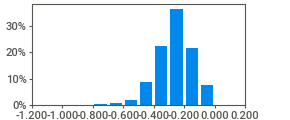
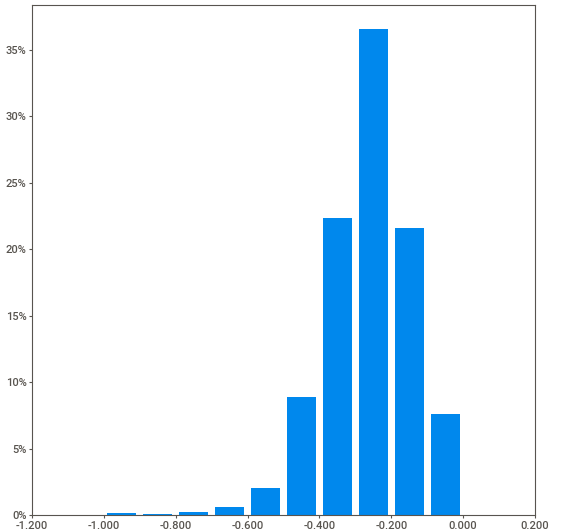
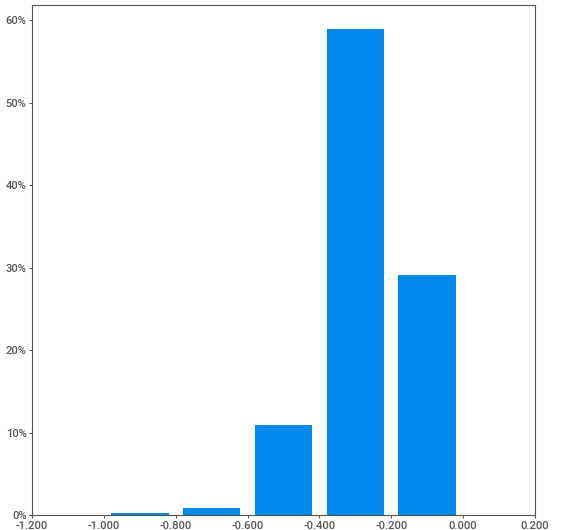
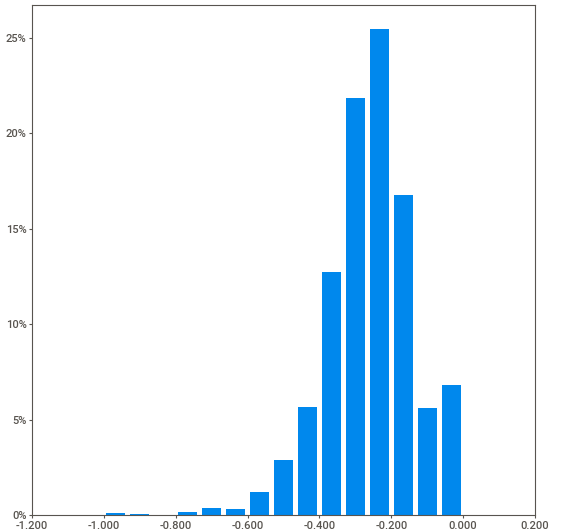
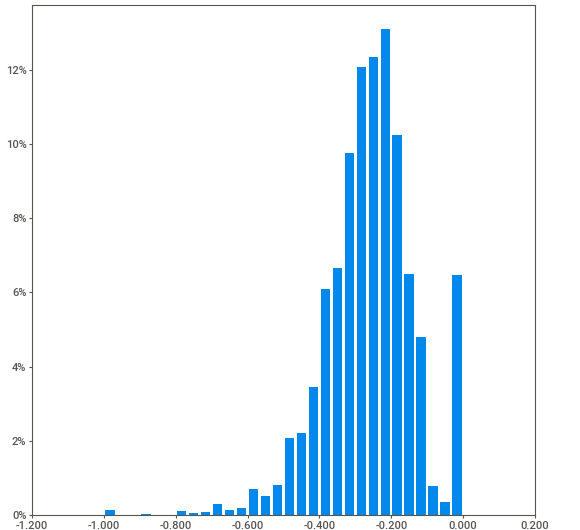
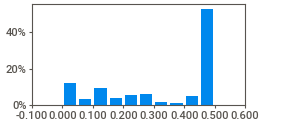
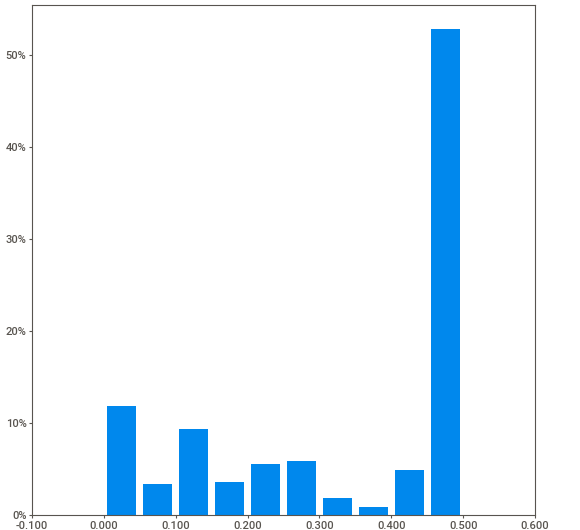
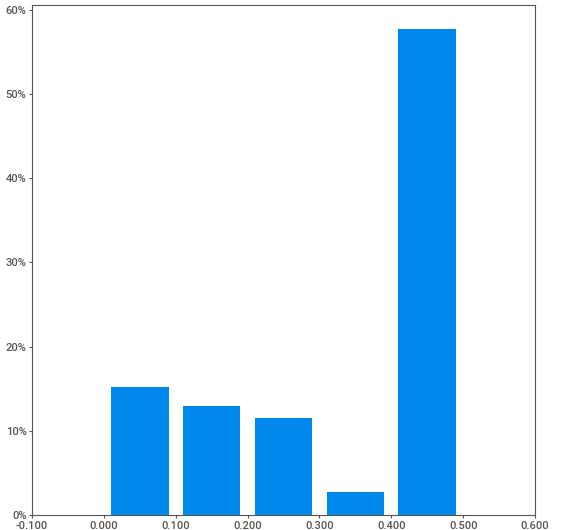
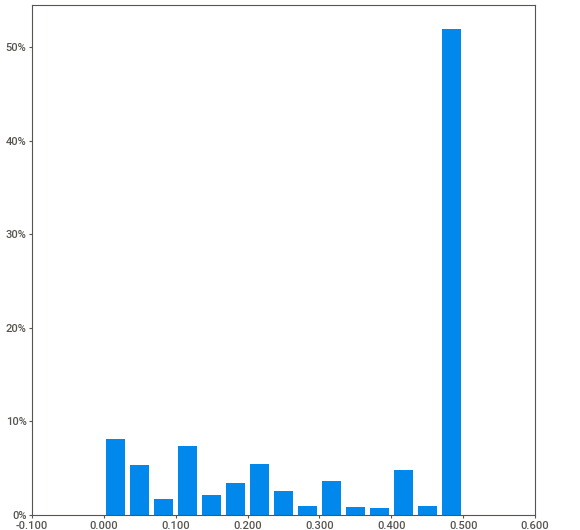
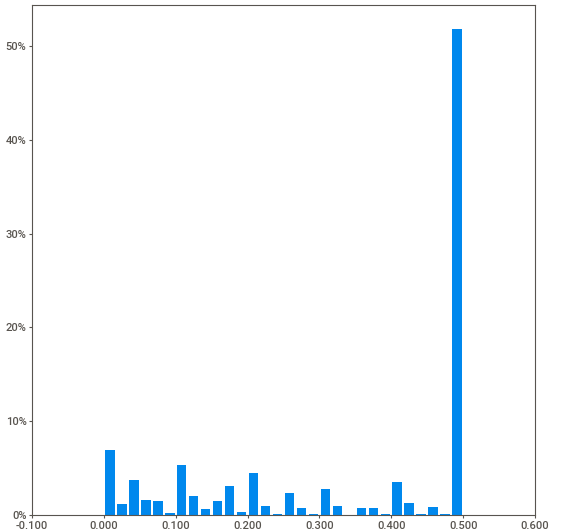
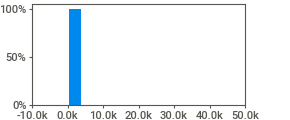
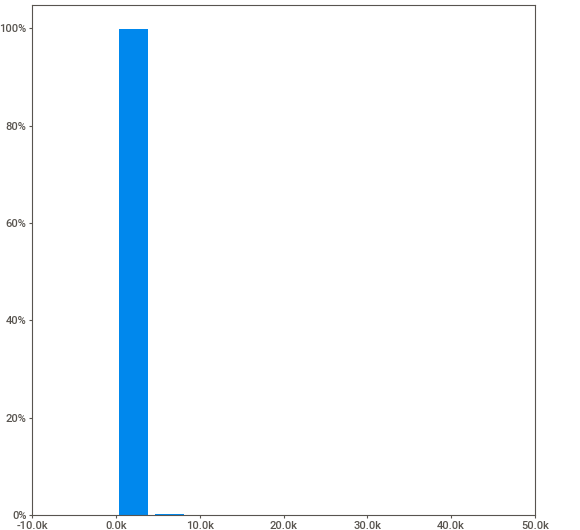
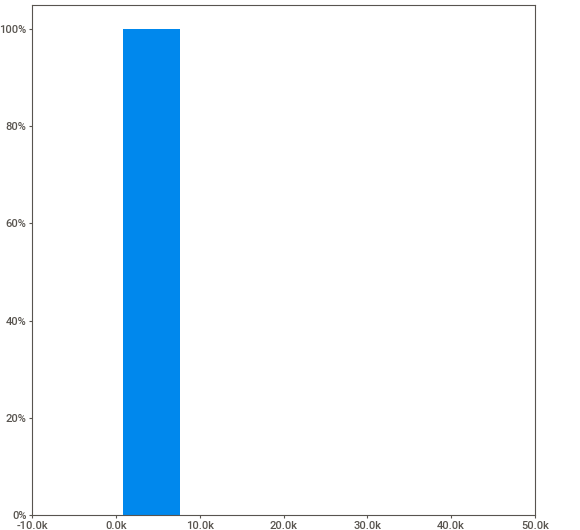
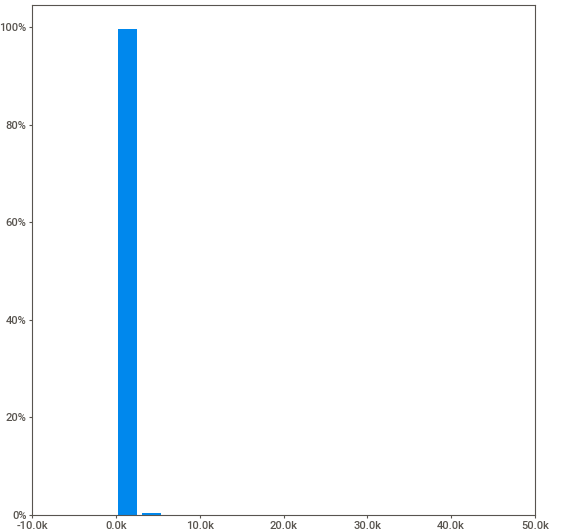
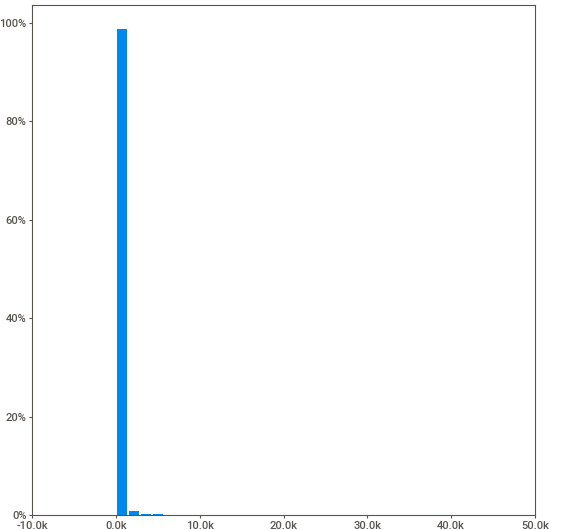
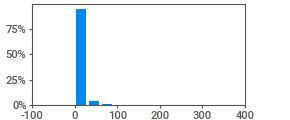
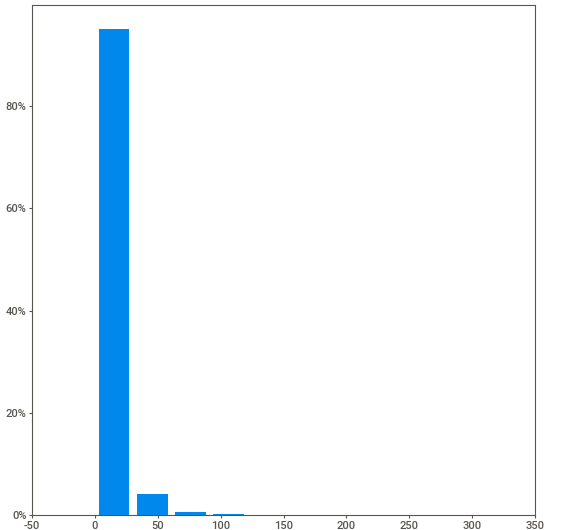
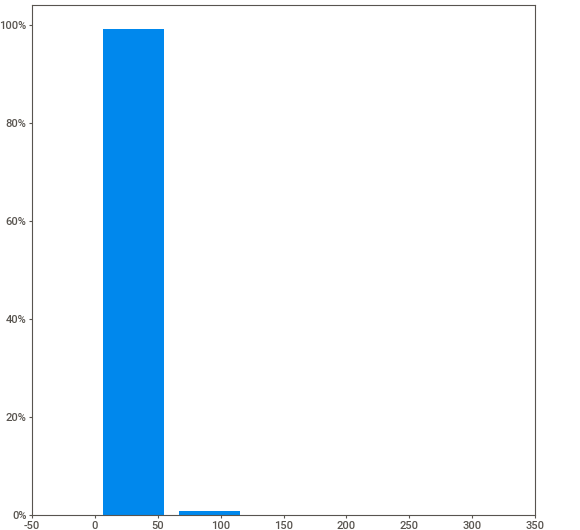
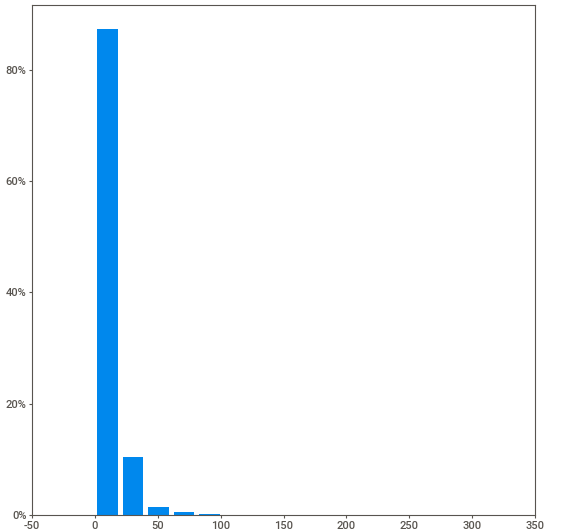
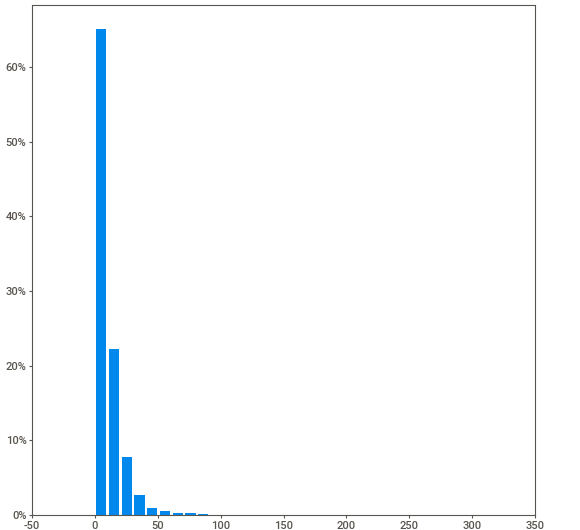
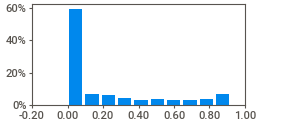
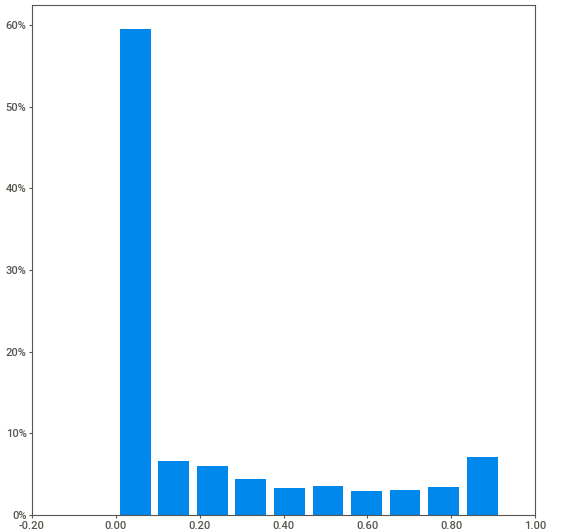
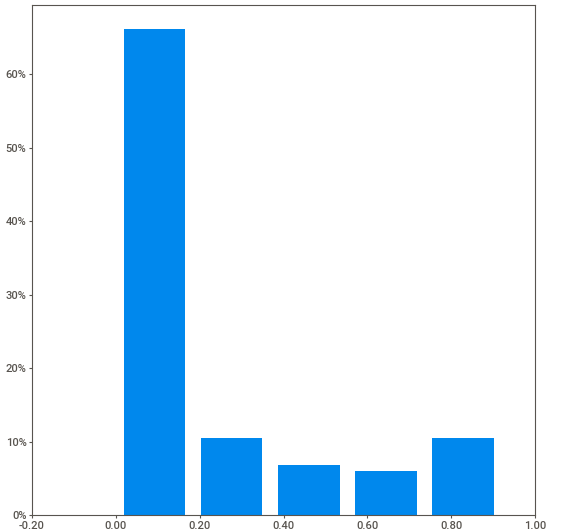
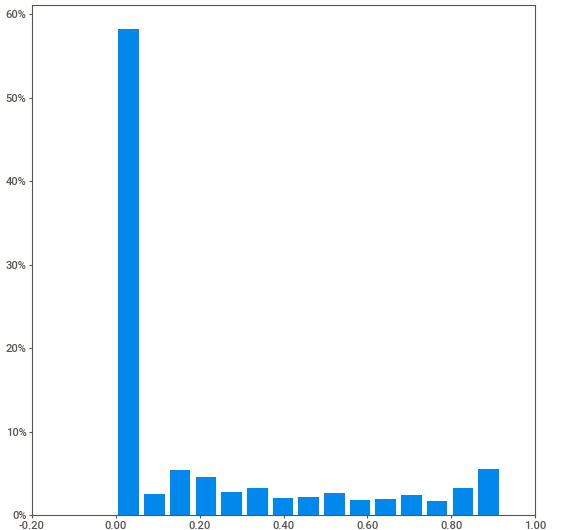
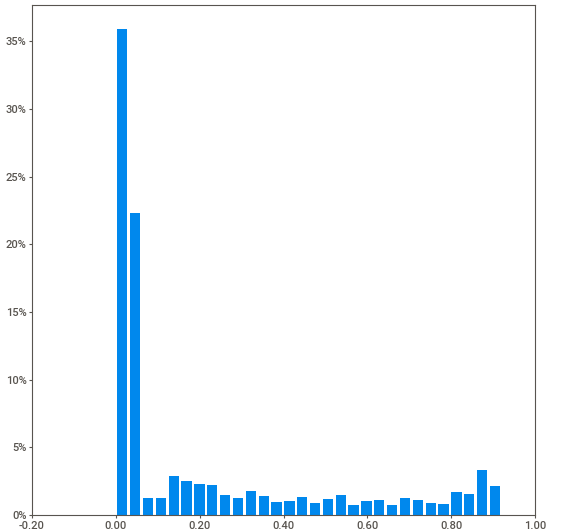
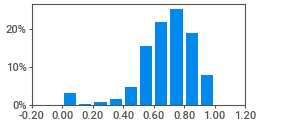
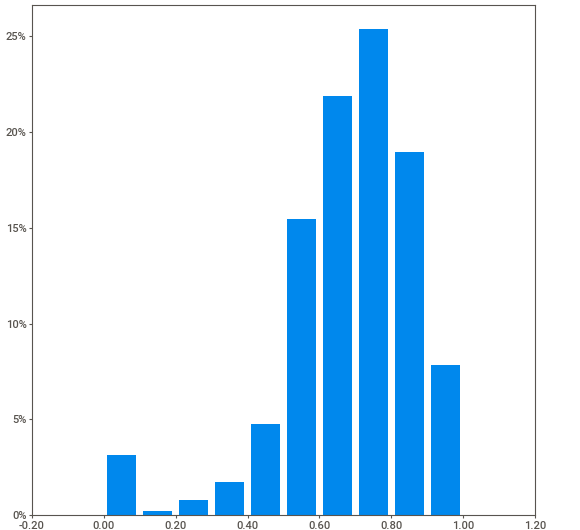
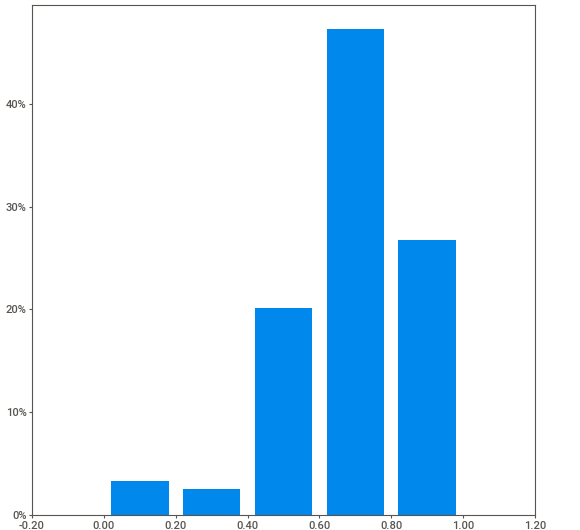
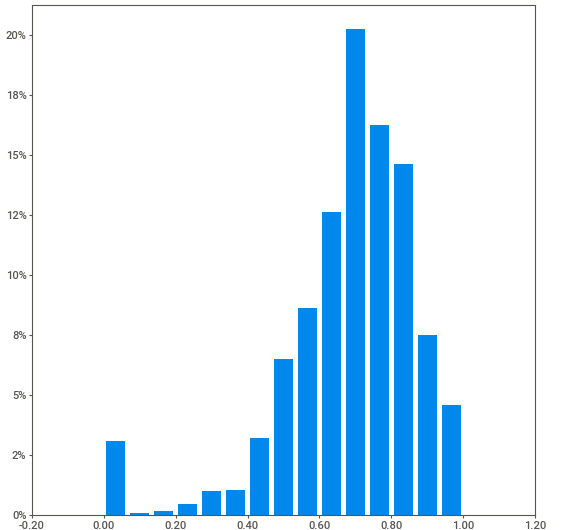
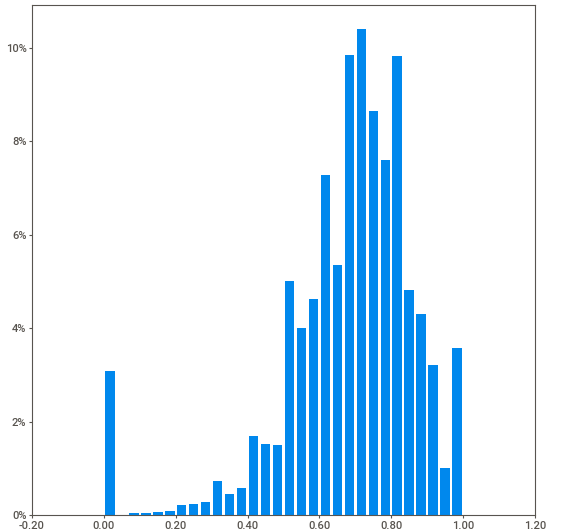
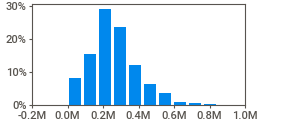
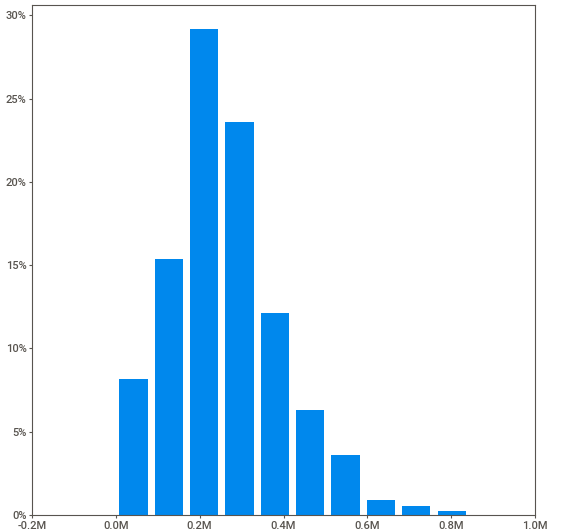
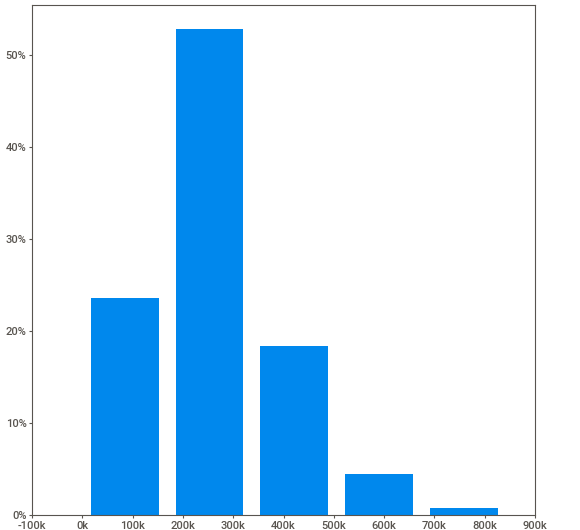
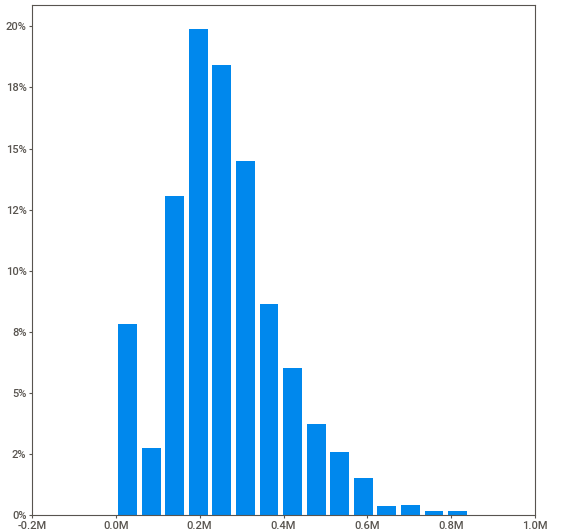
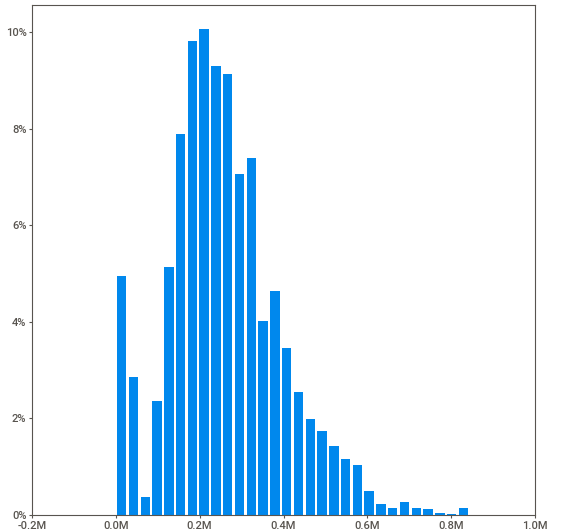
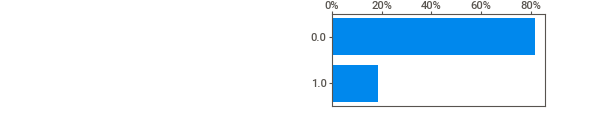
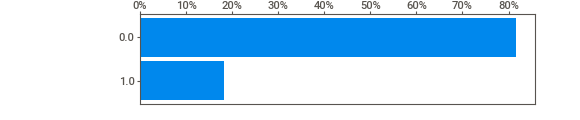
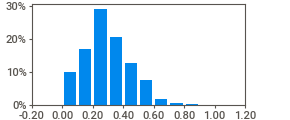
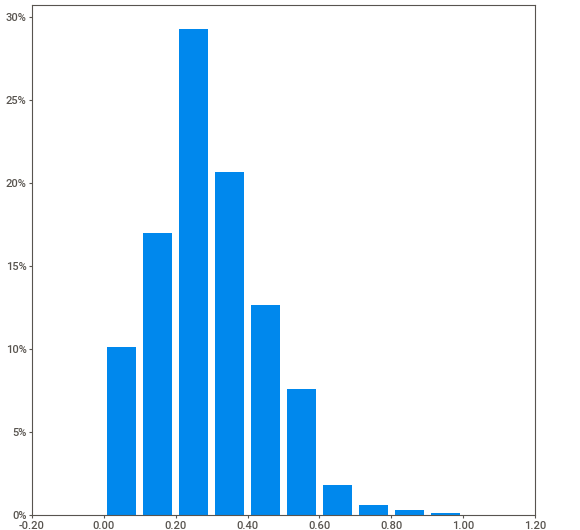
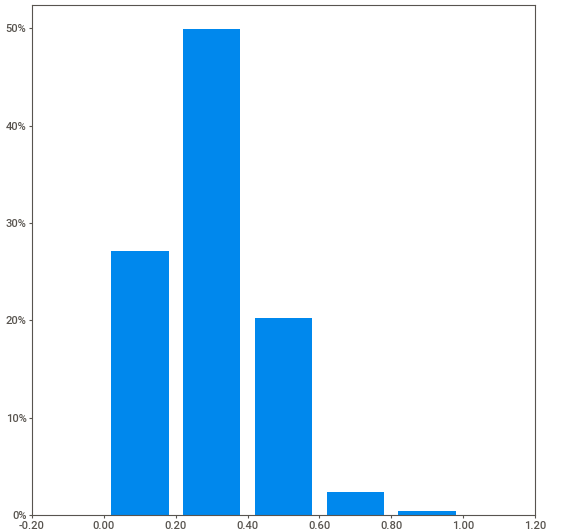
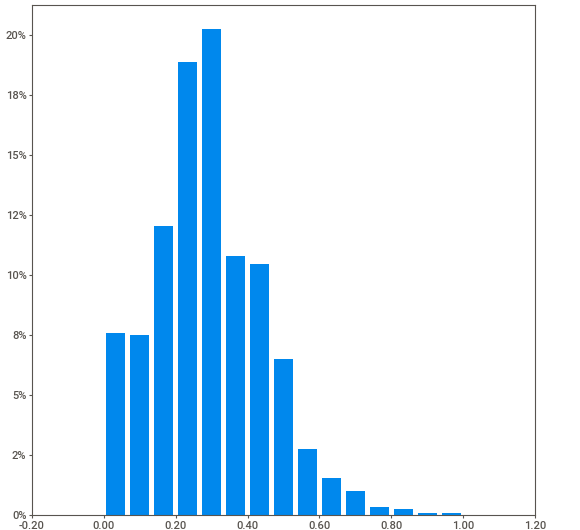
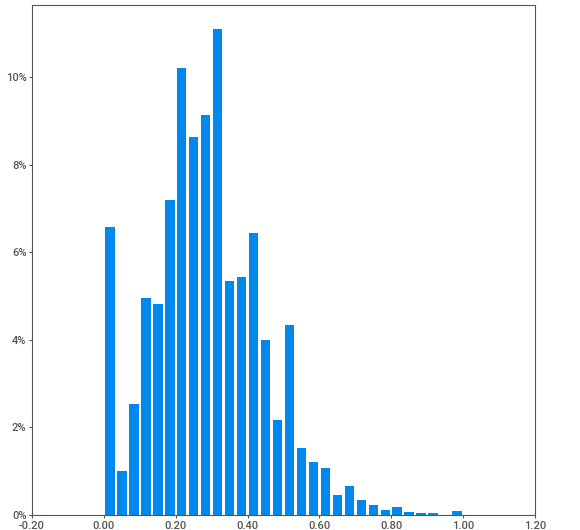
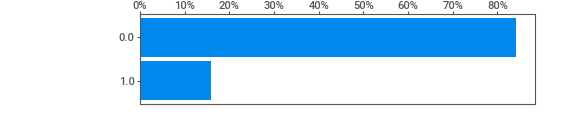
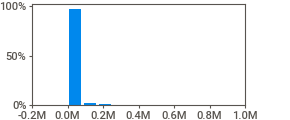
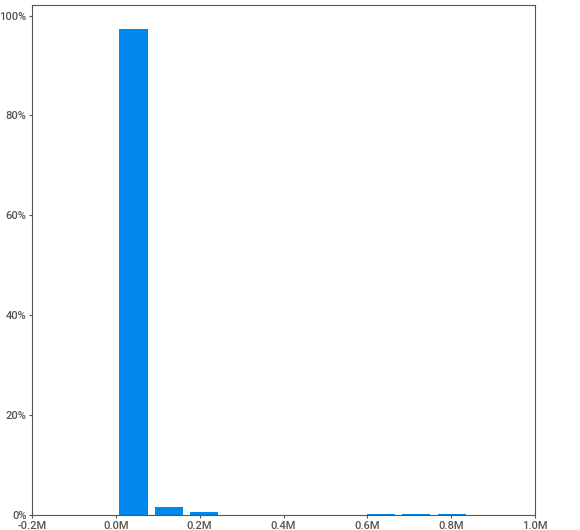
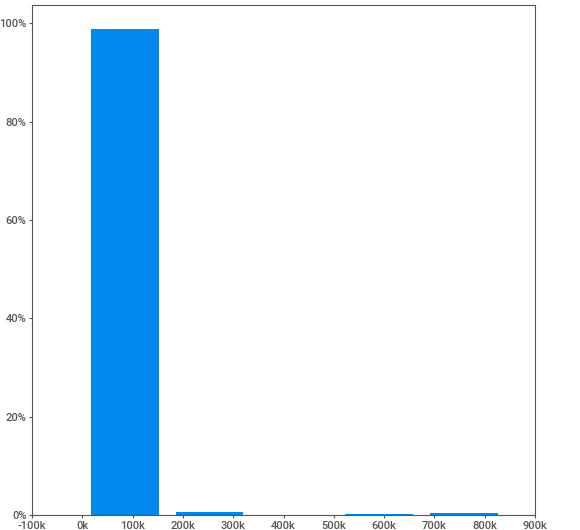
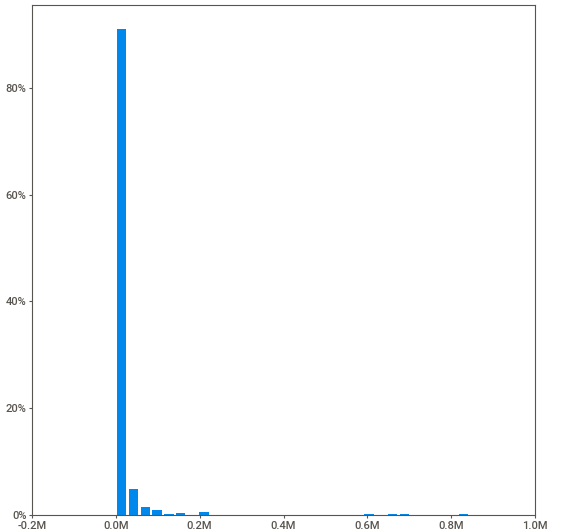
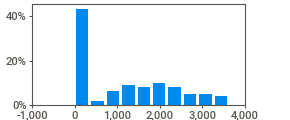
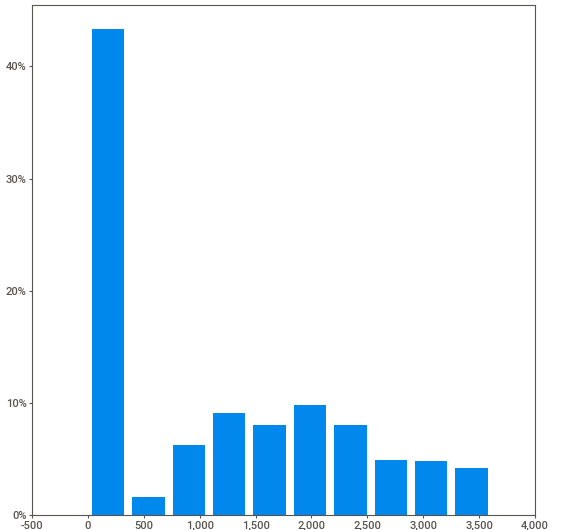
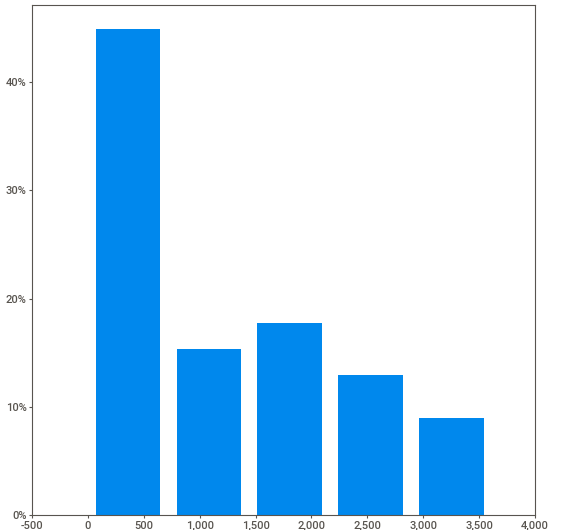
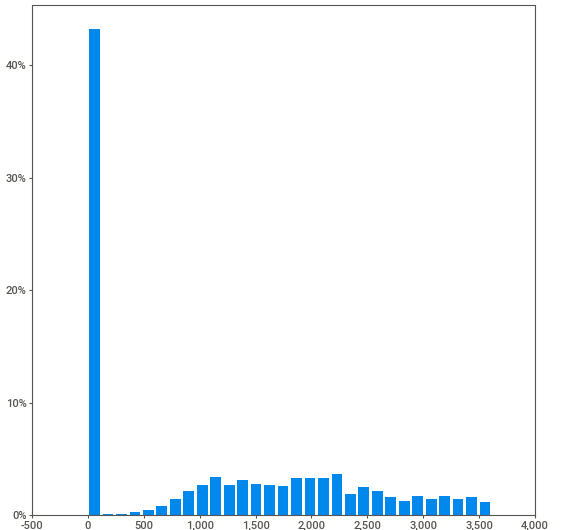
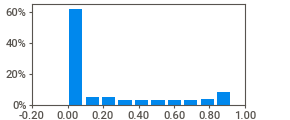
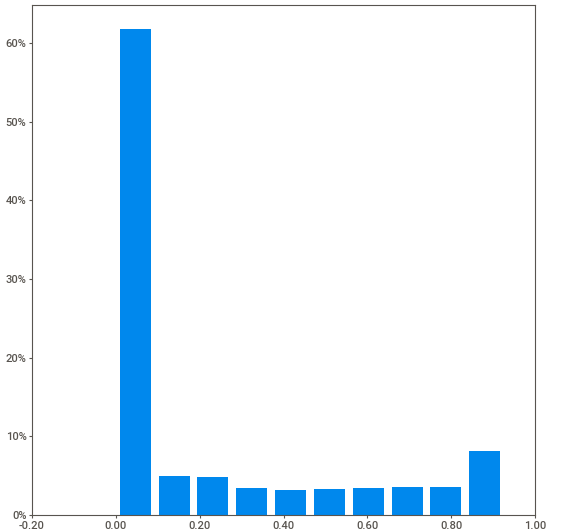
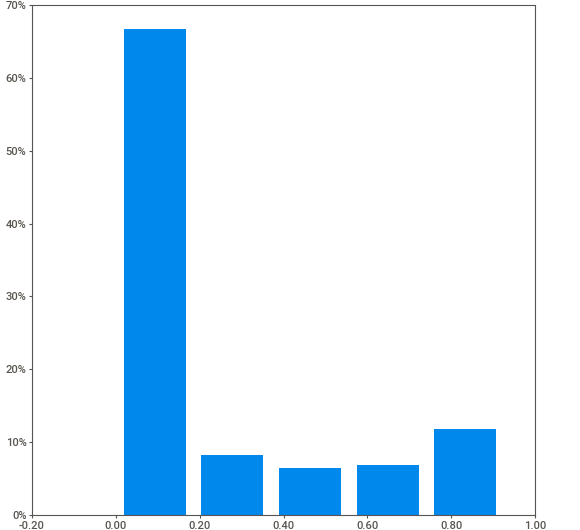
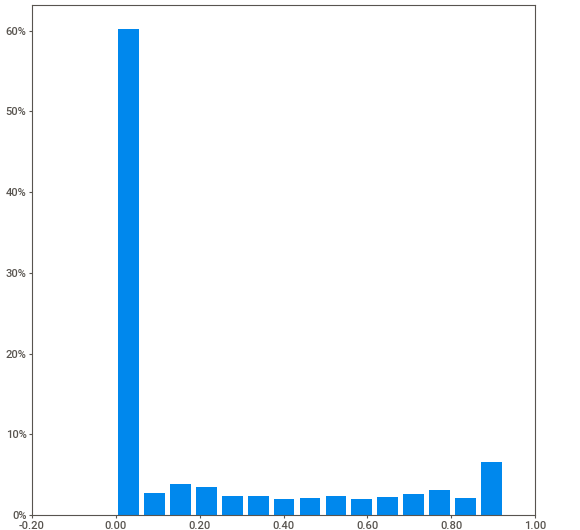
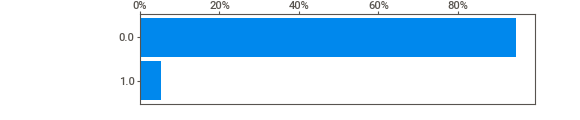
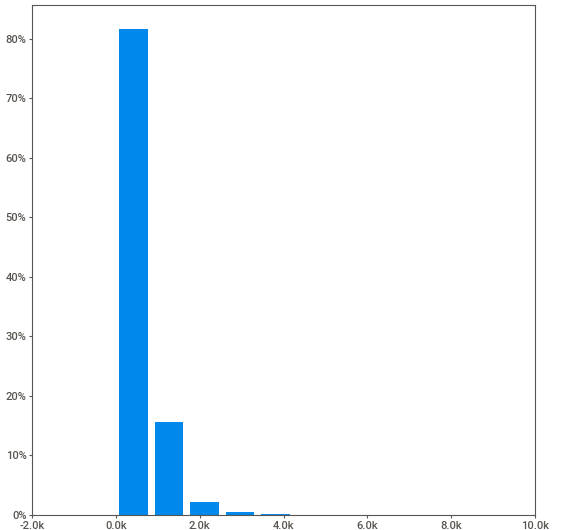
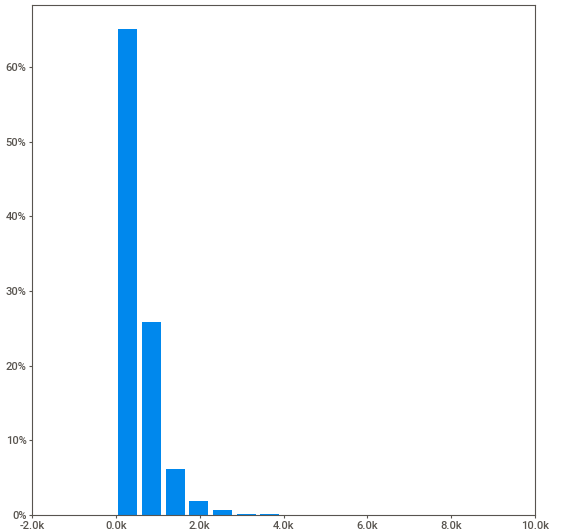
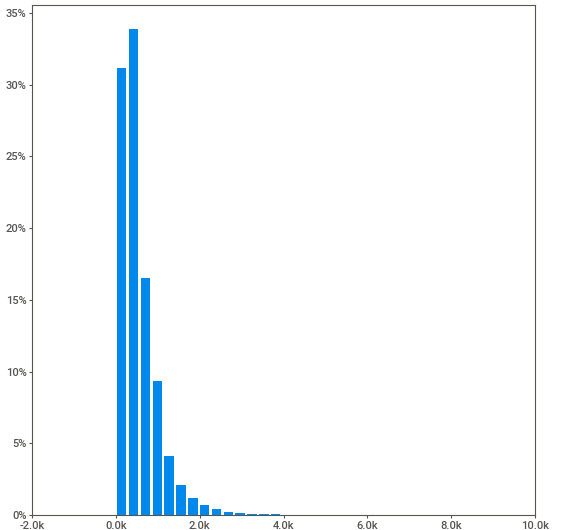
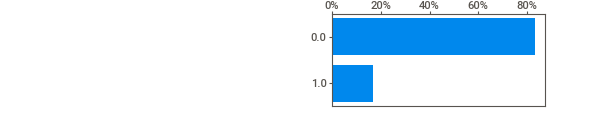
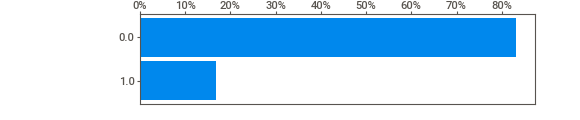
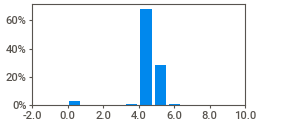
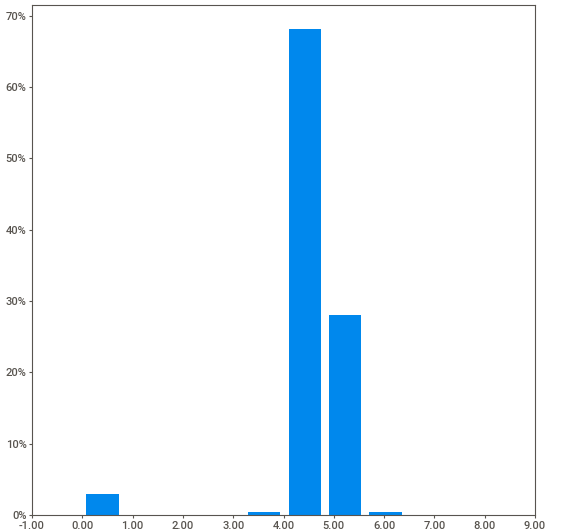
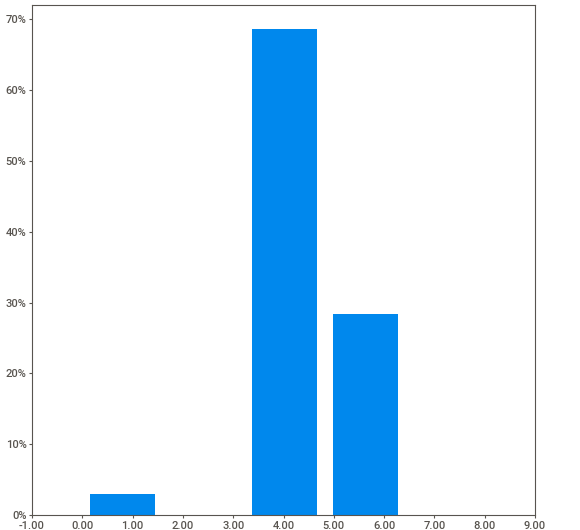
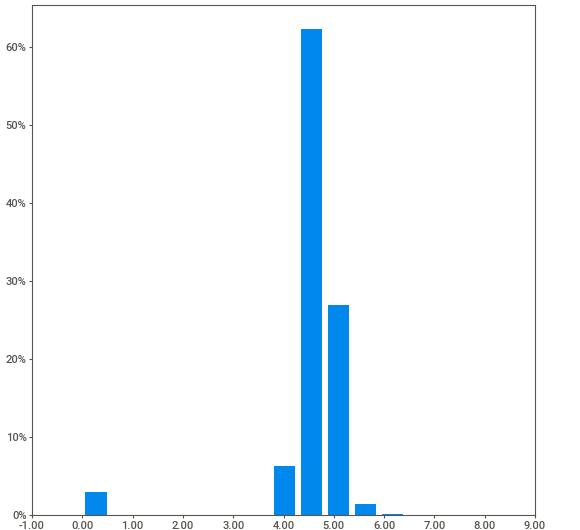
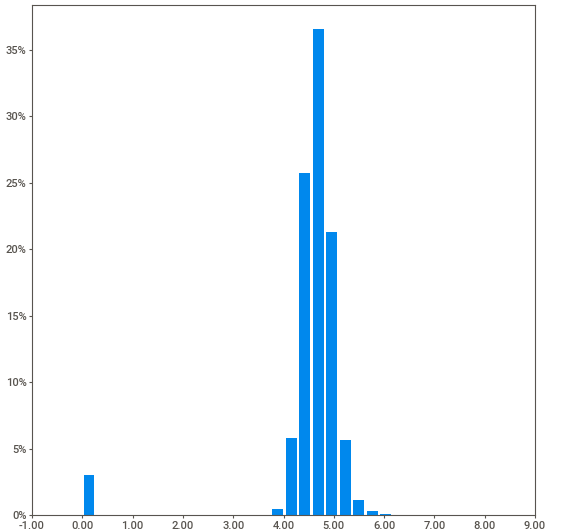
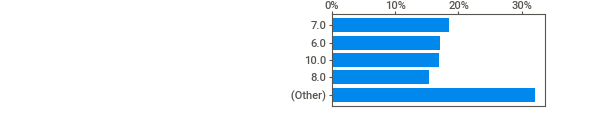
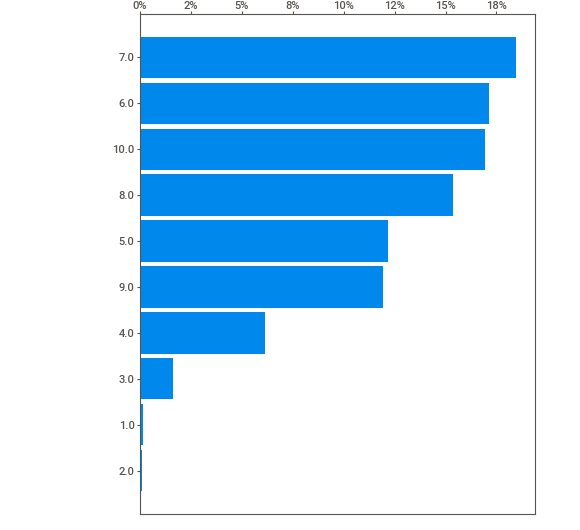
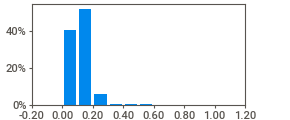
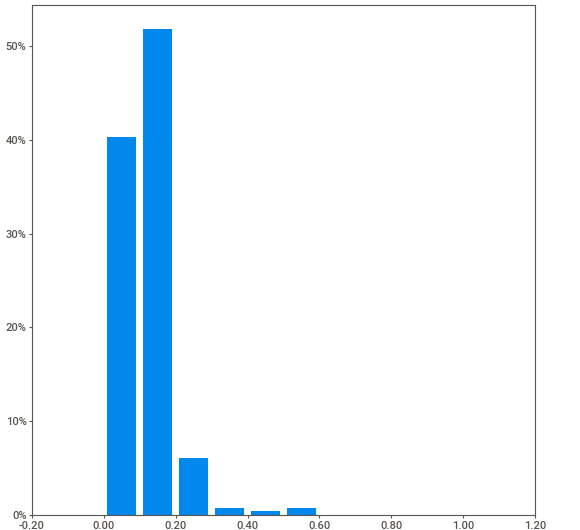
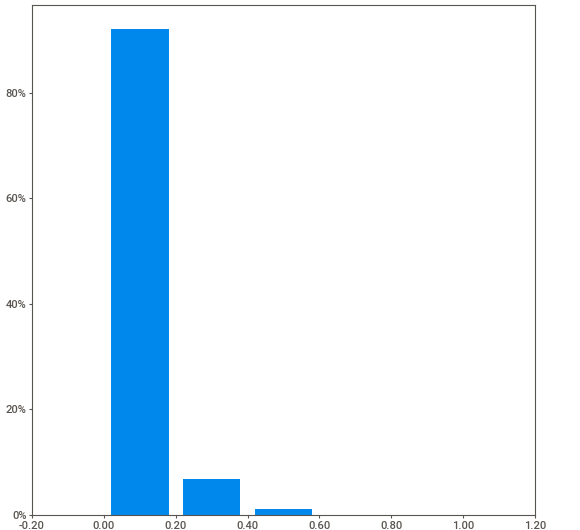
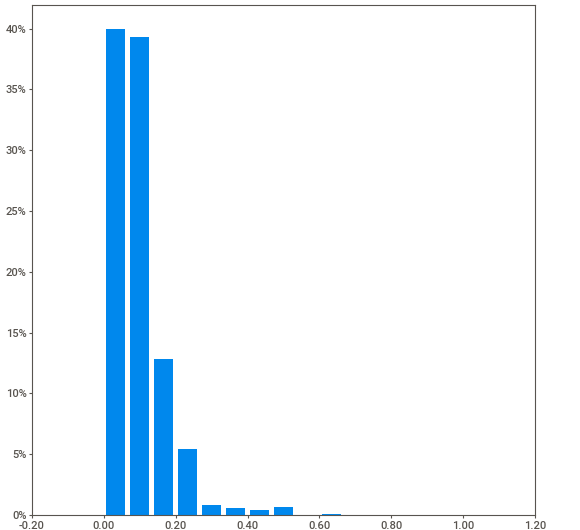
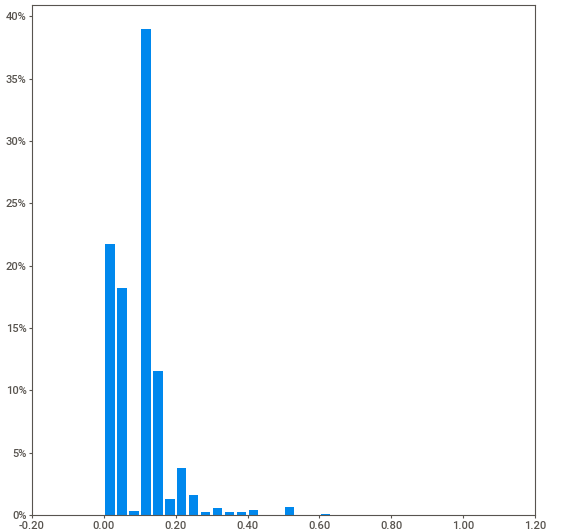
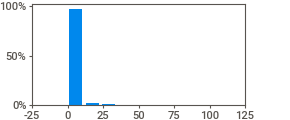
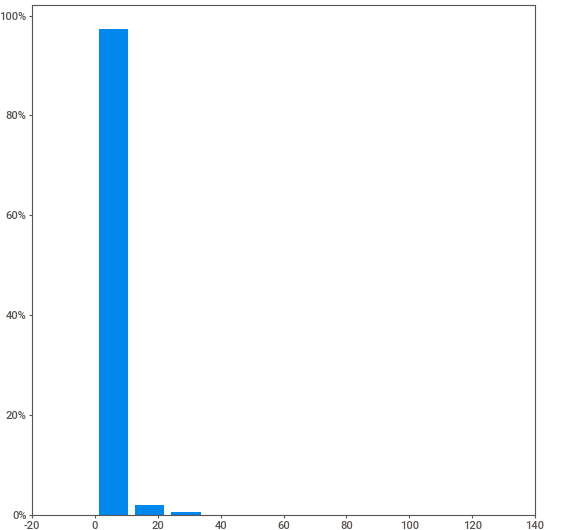
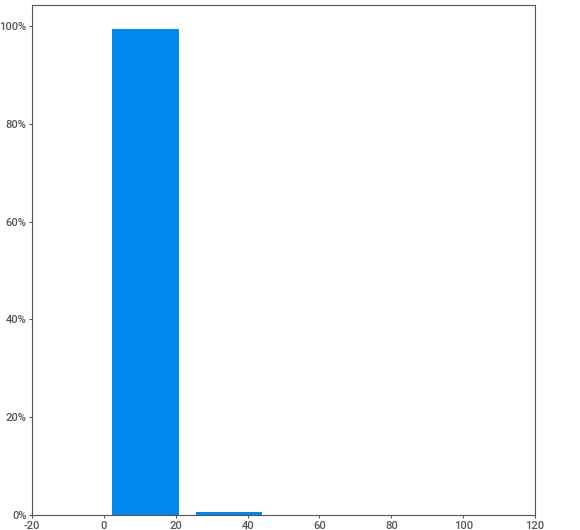
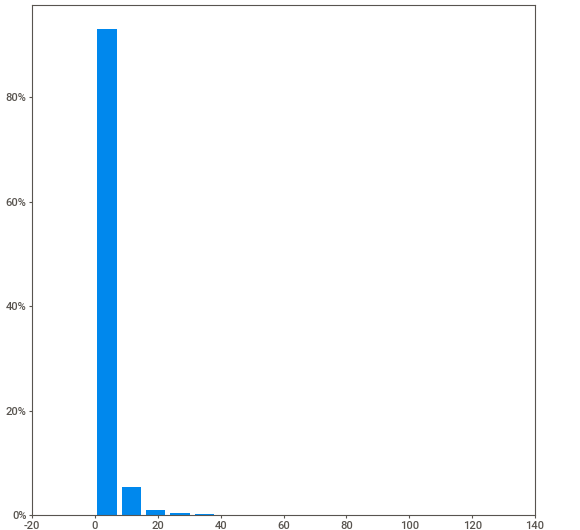
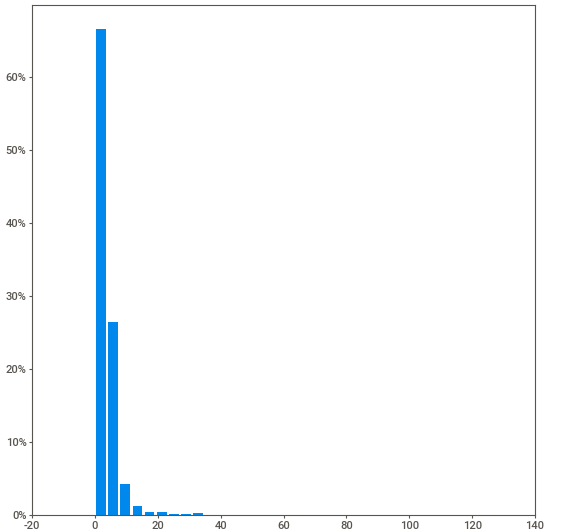
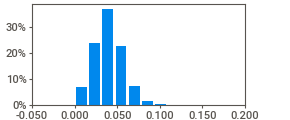
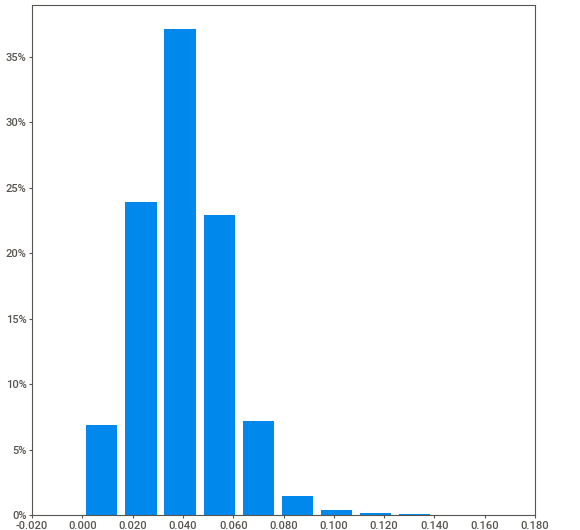
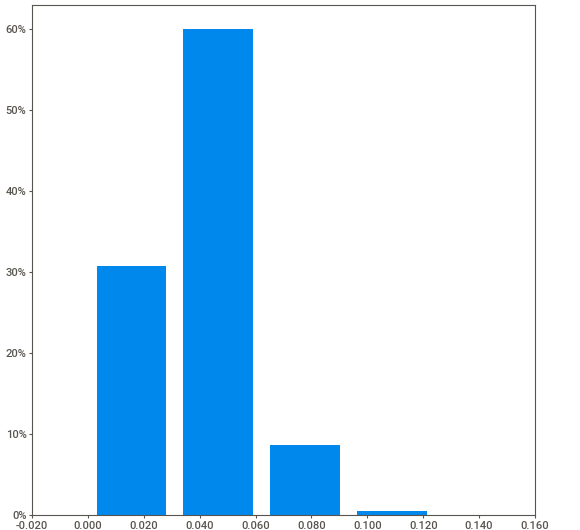
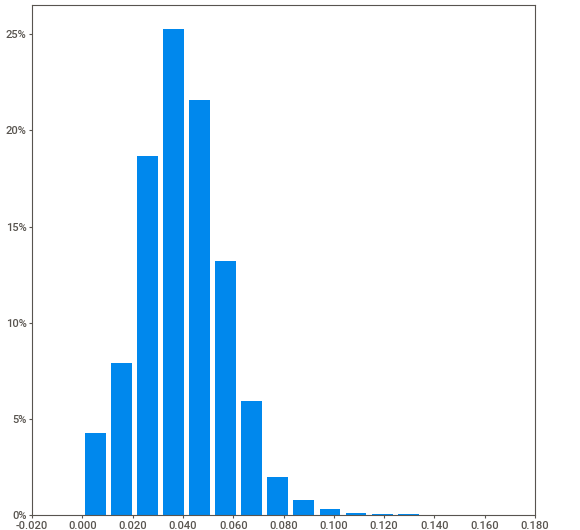
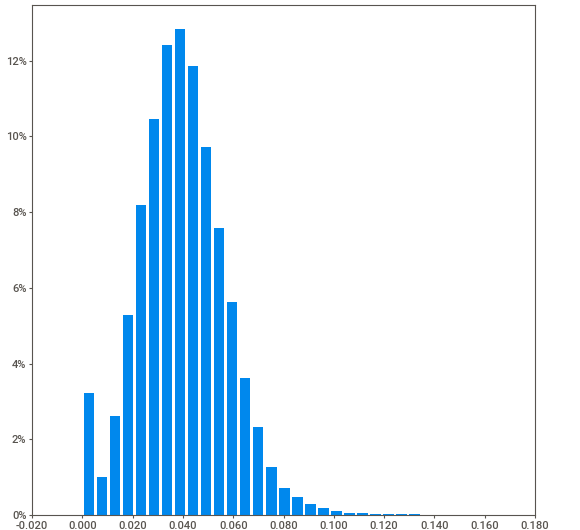
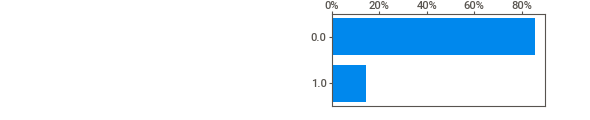
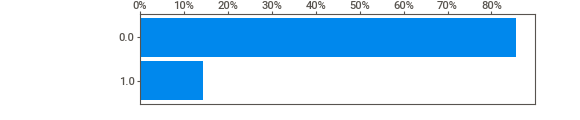
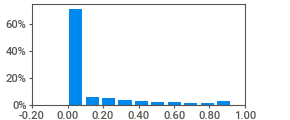
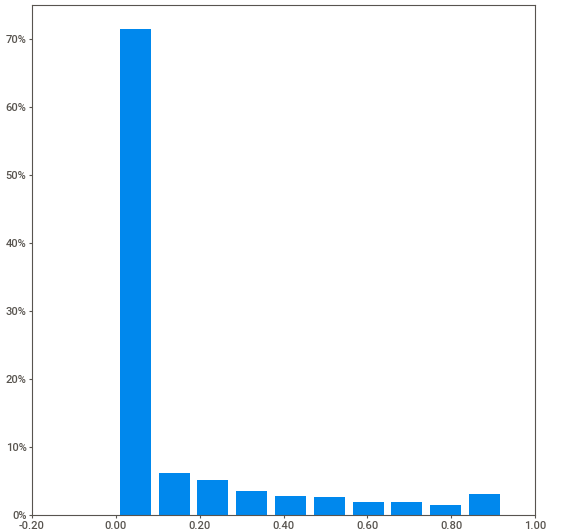
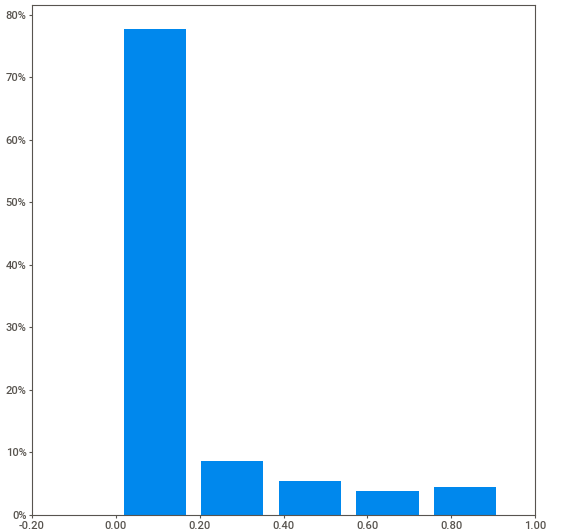
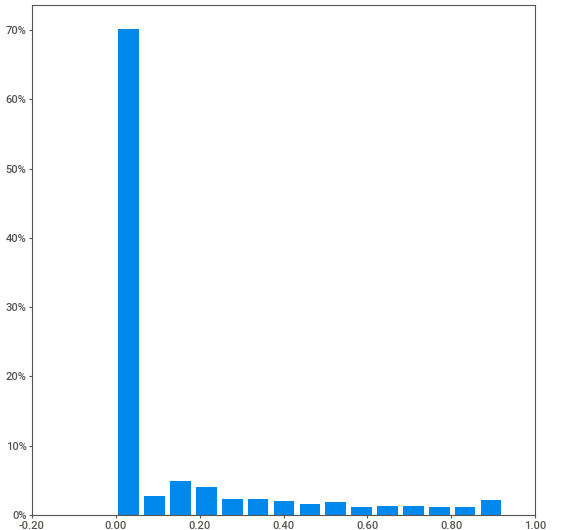
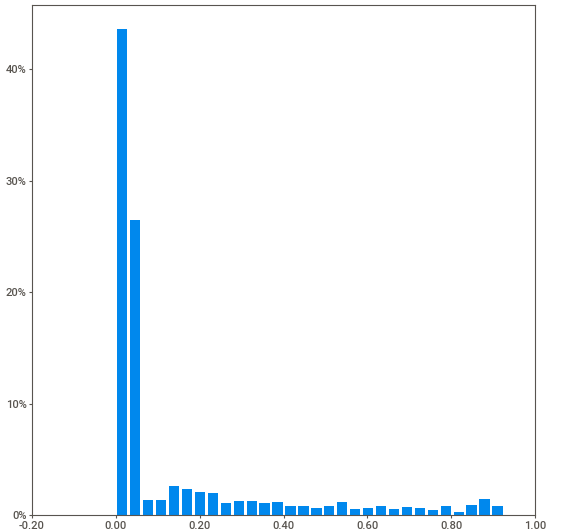
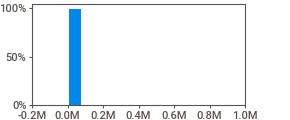
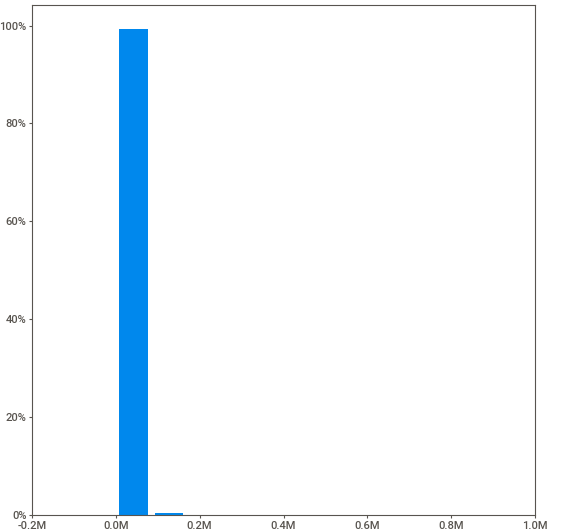
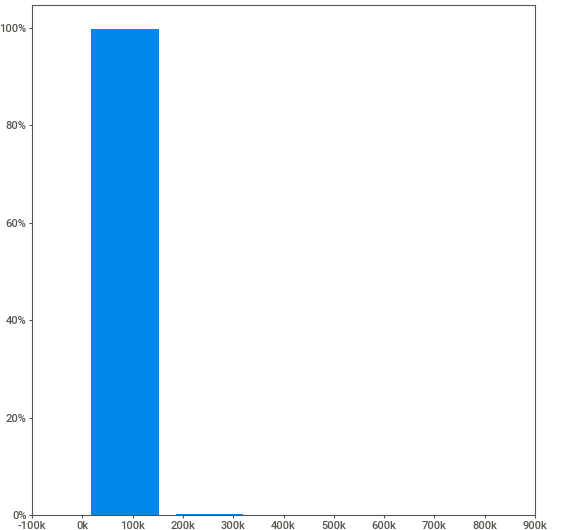
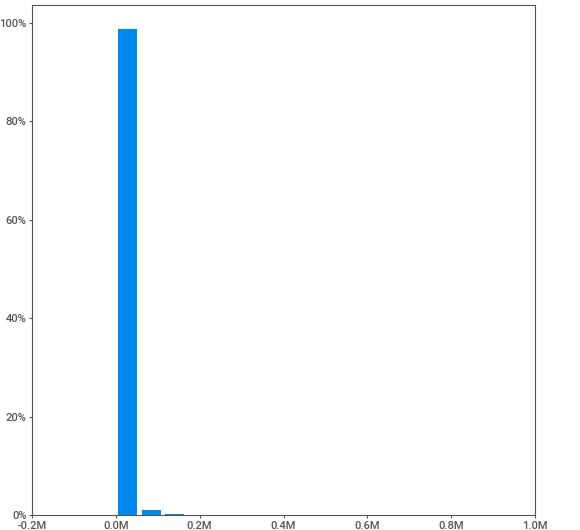
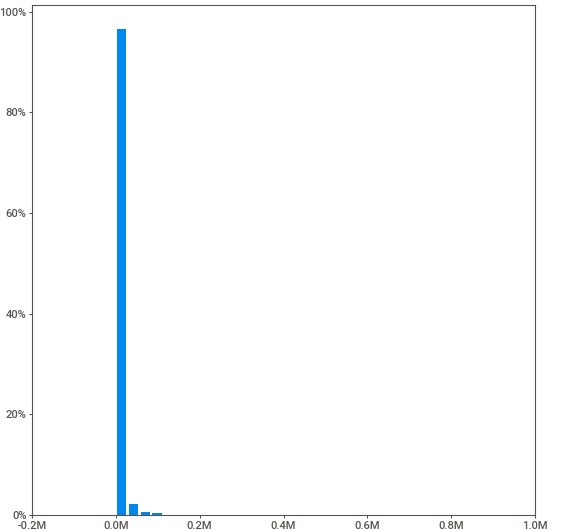
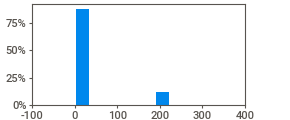
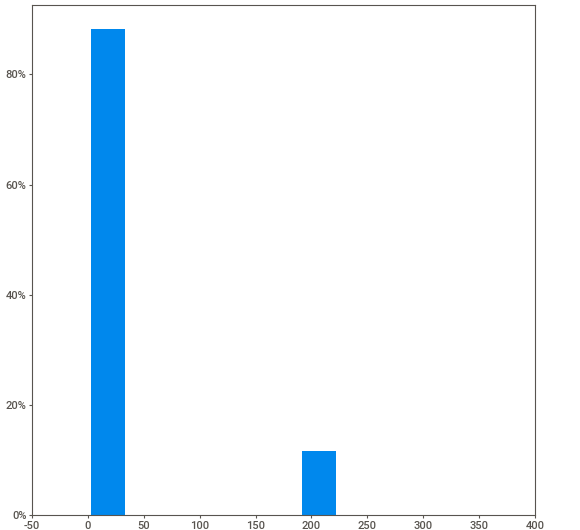
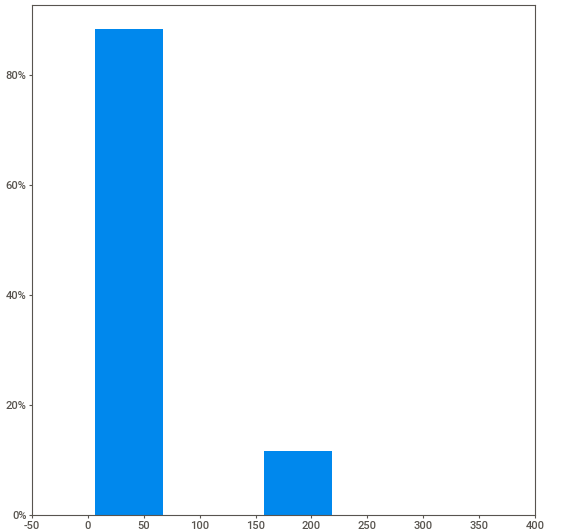
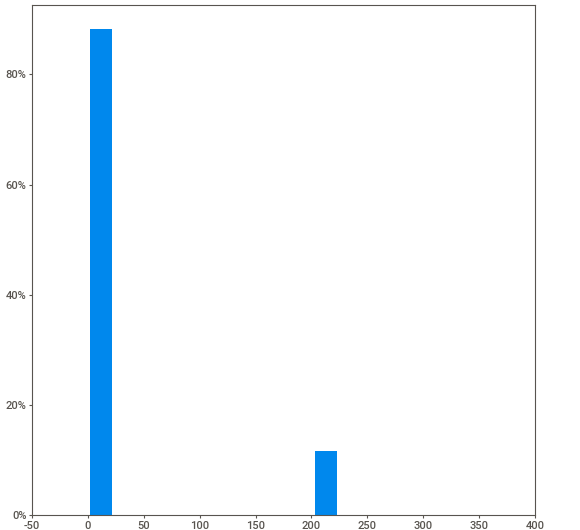
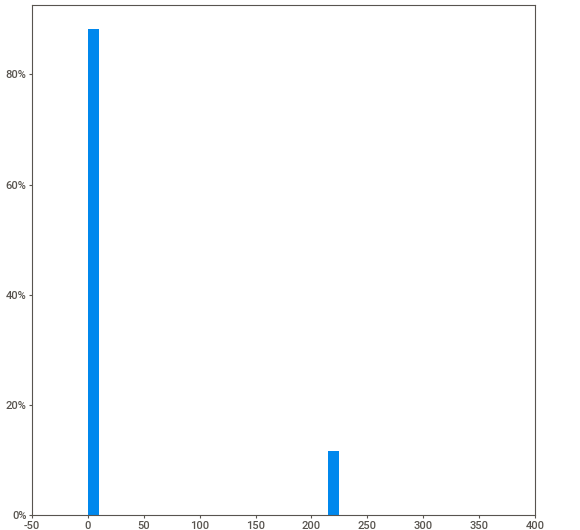
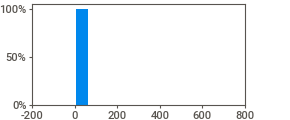
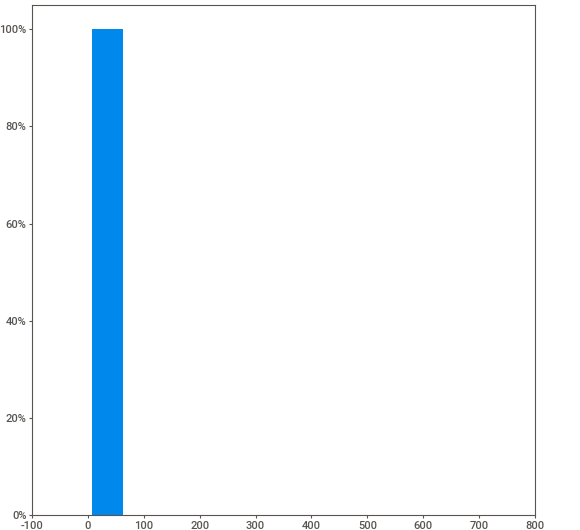
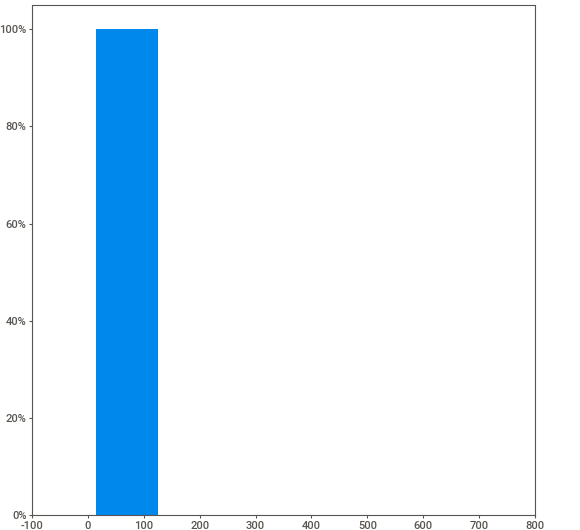
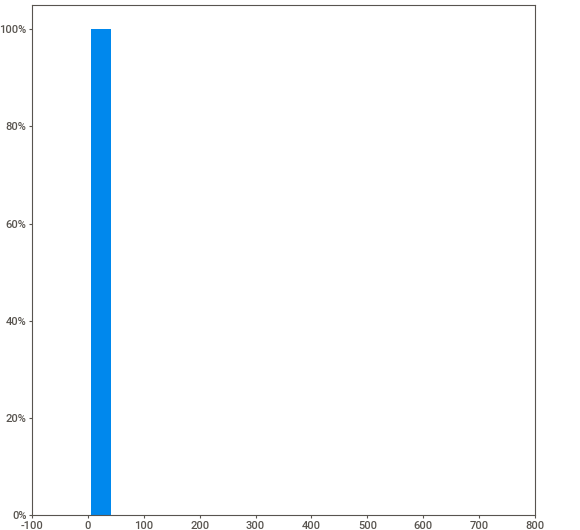
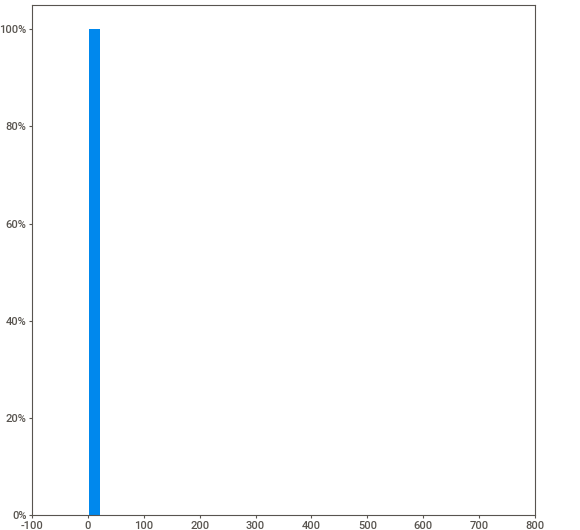
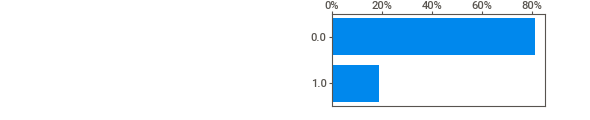
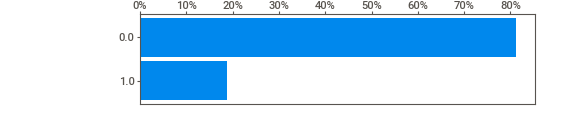
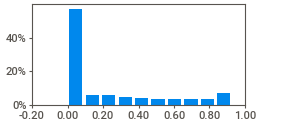
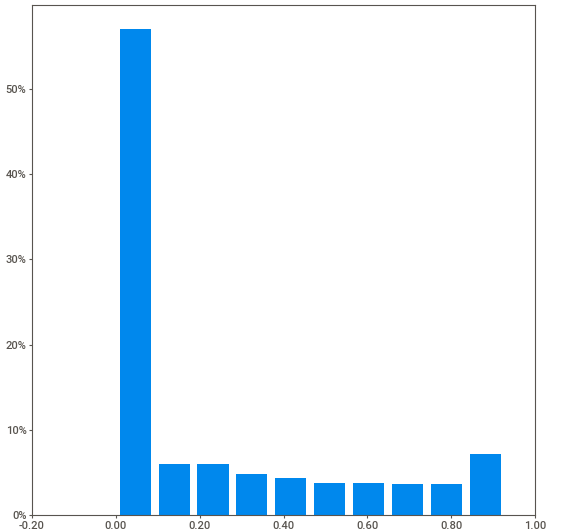
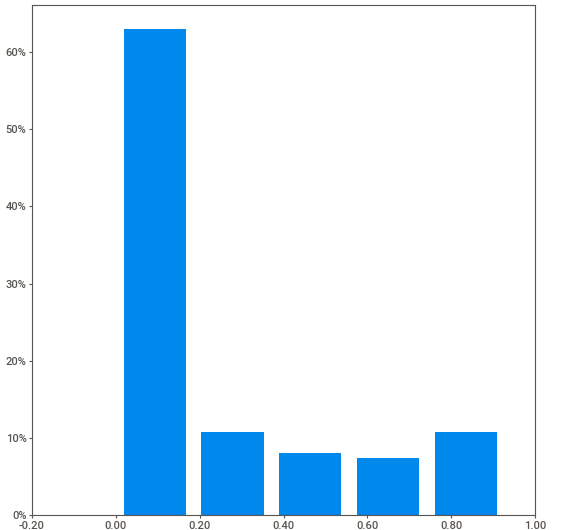
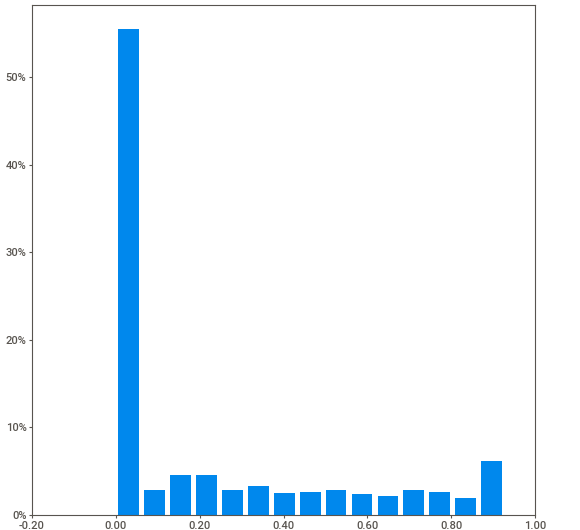
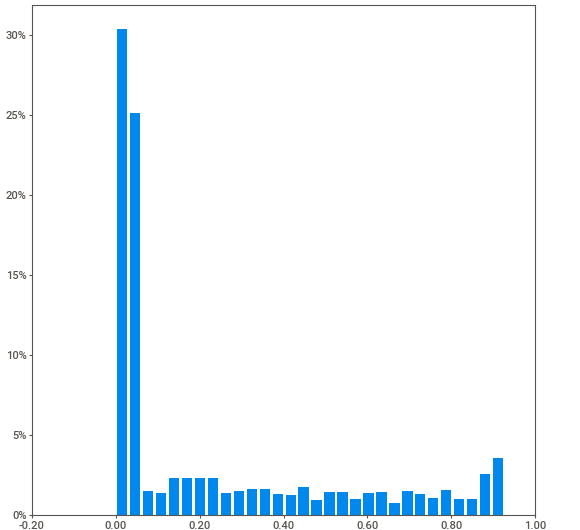
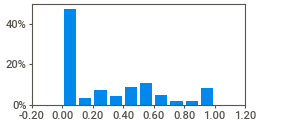
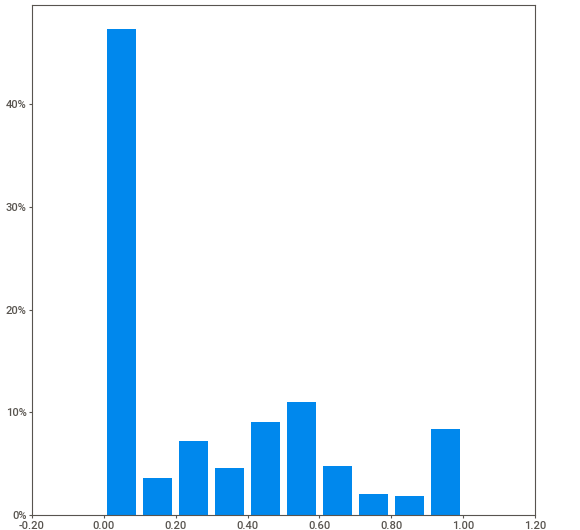
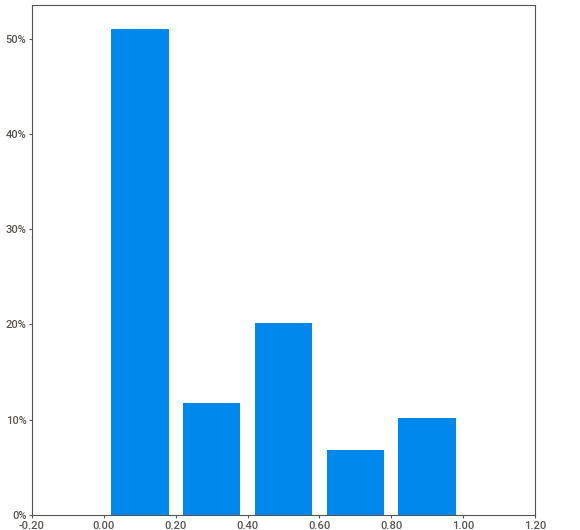
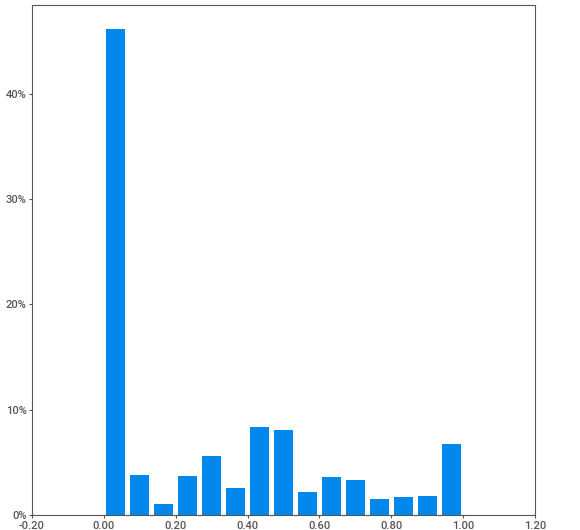
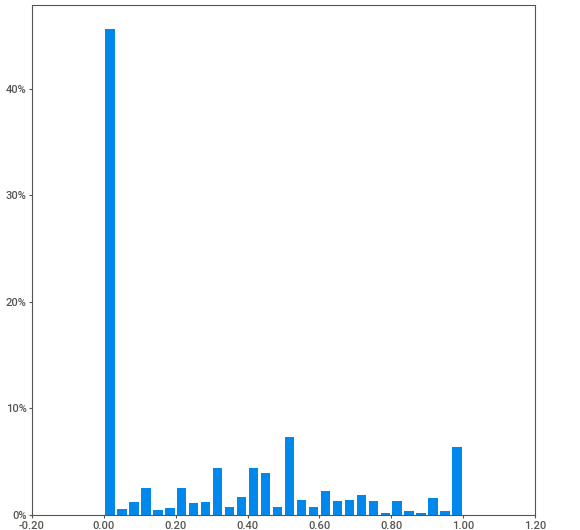
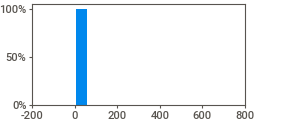
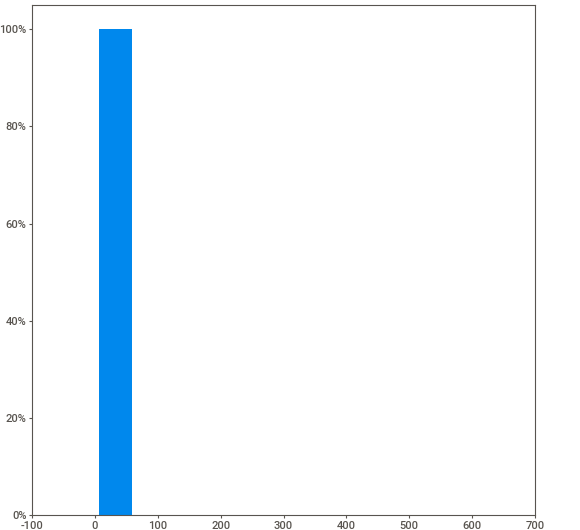
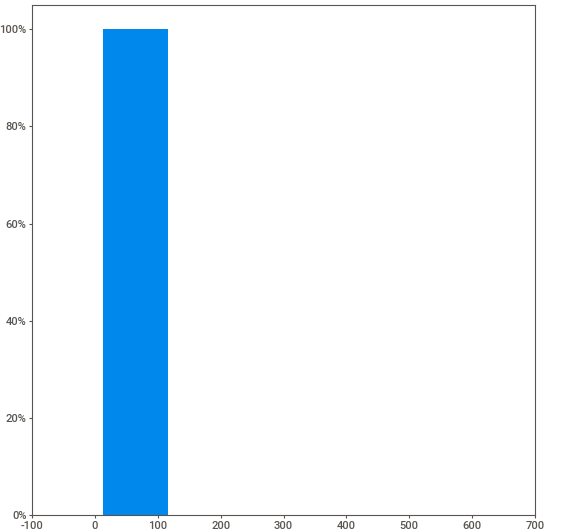
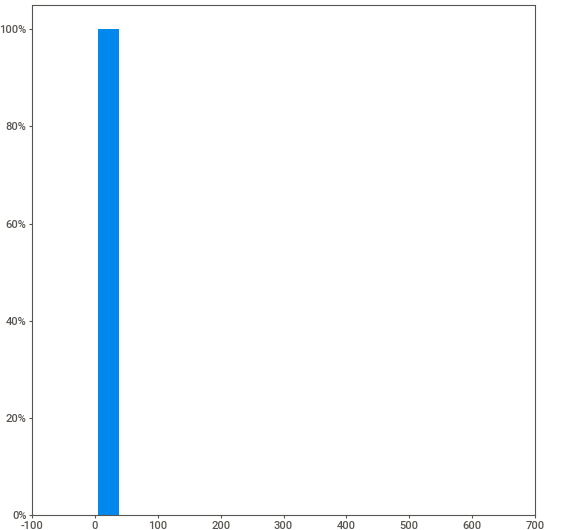
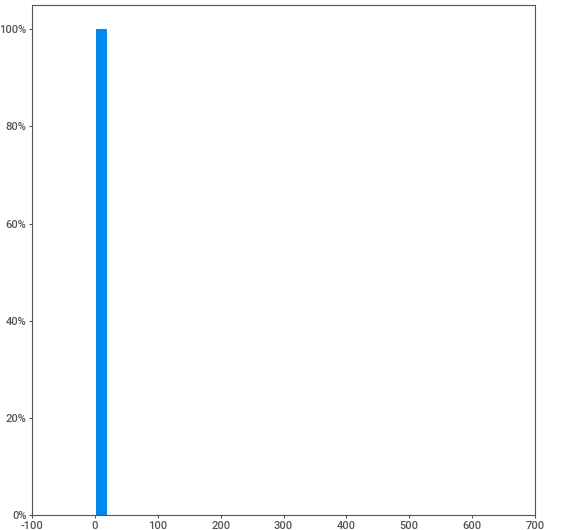
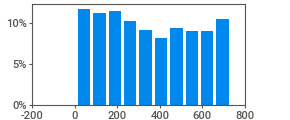
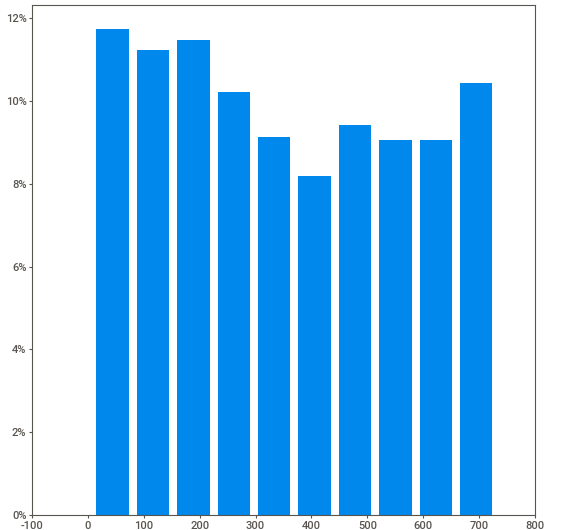
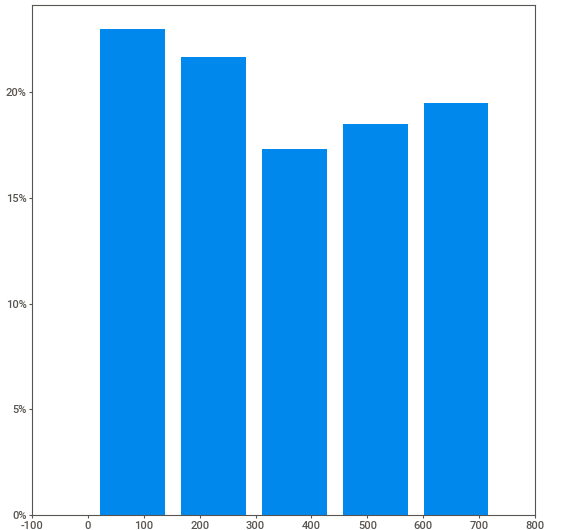
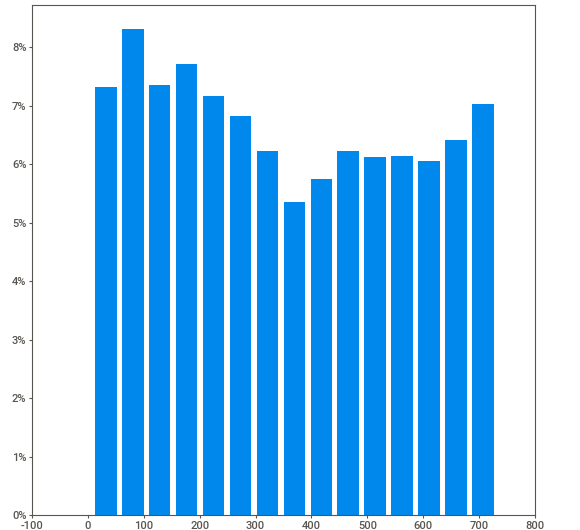
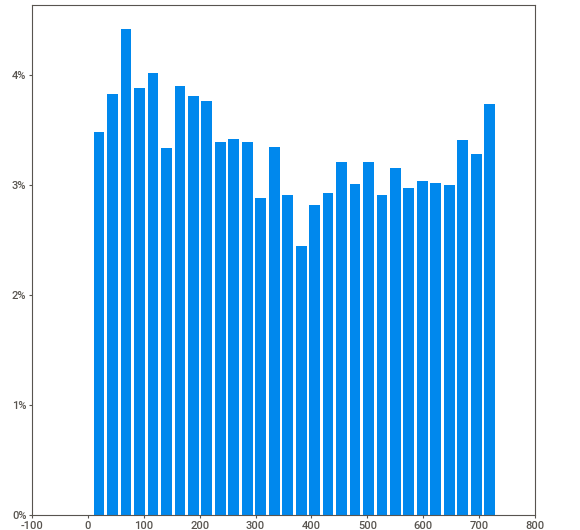
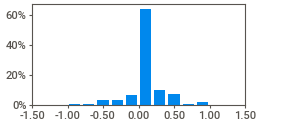
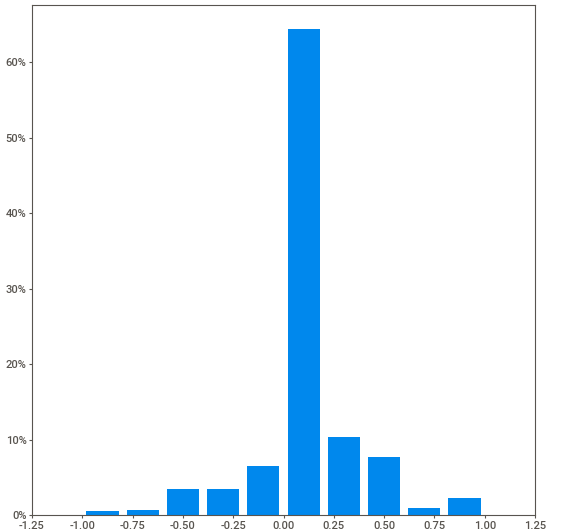
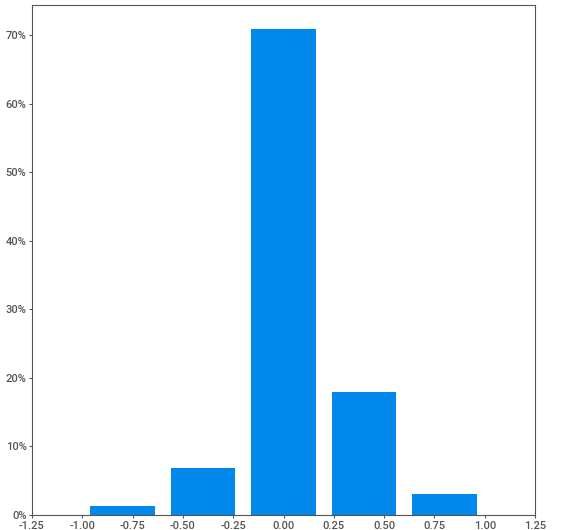
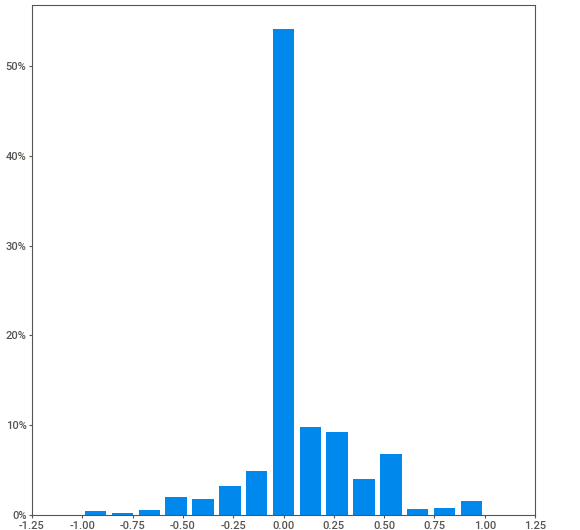
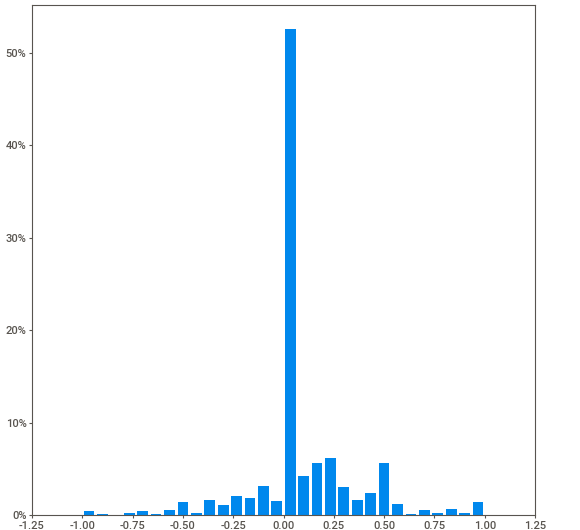
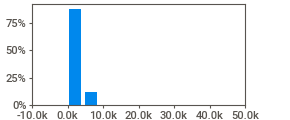
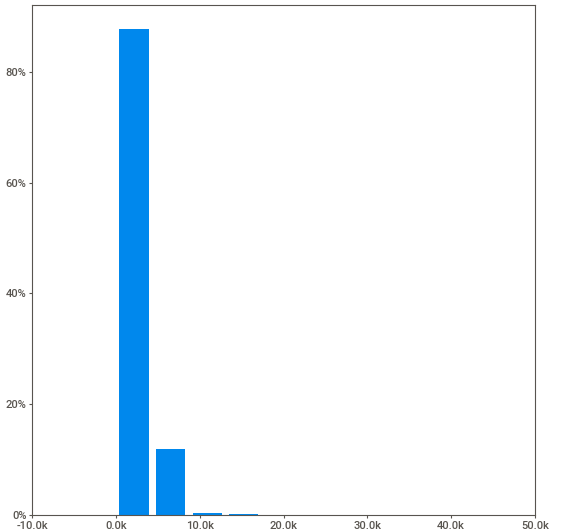
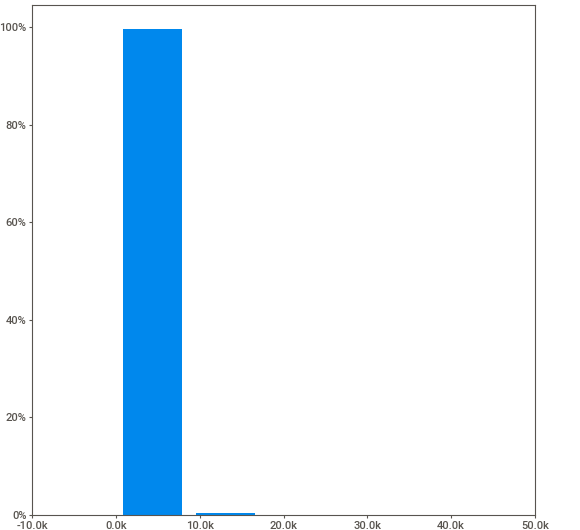
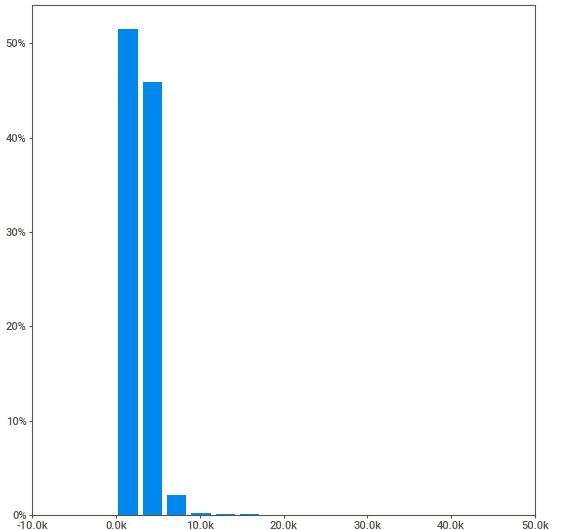
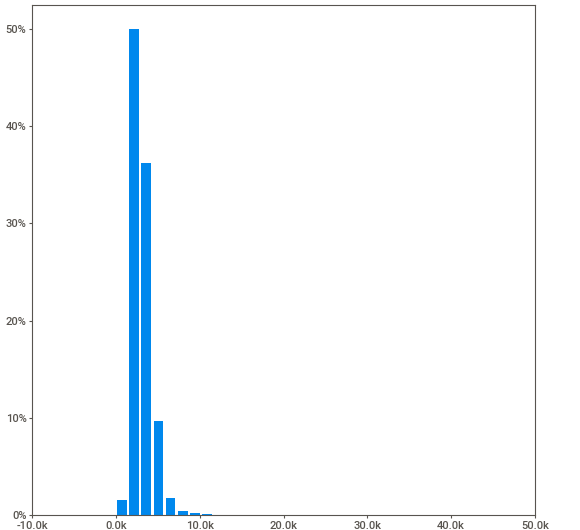
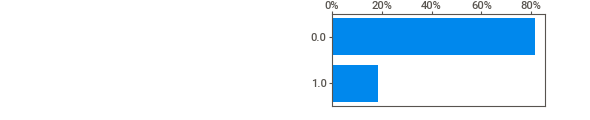
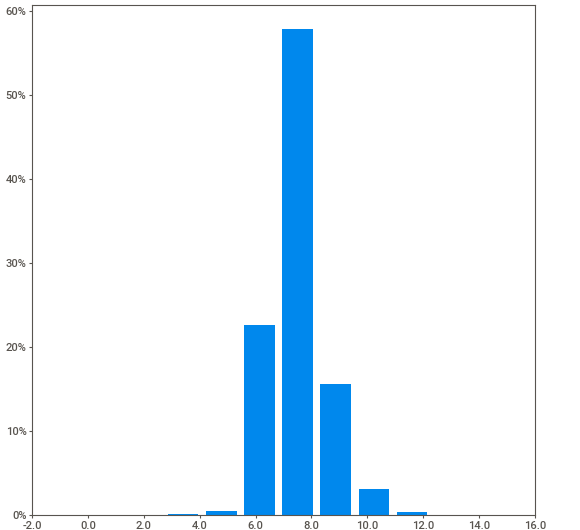
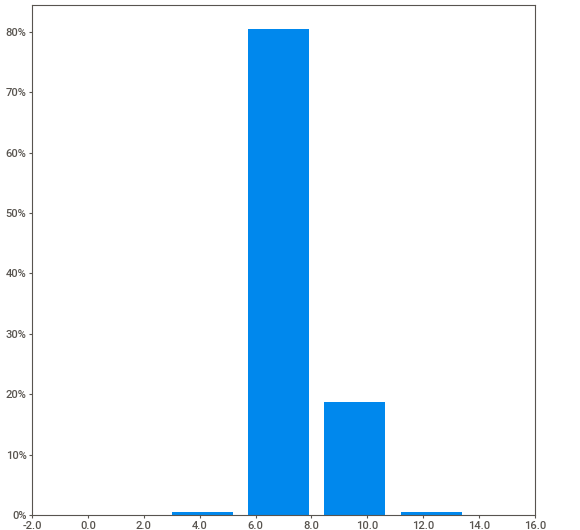
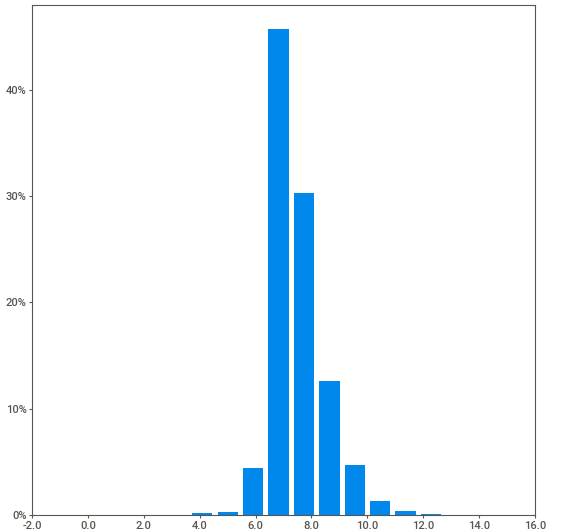
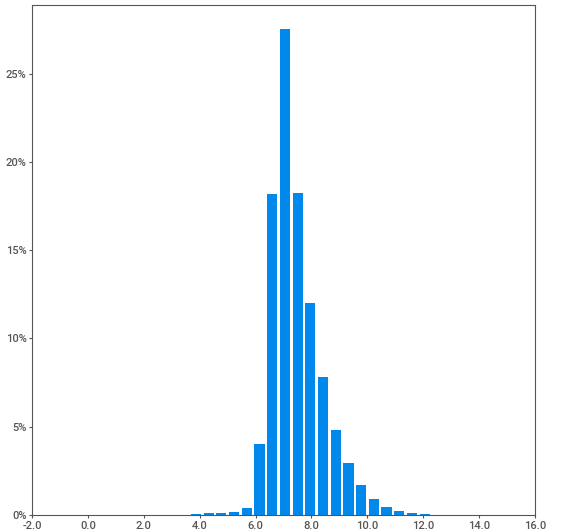
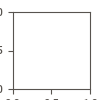

In [ ]:
report.show_notebook()

##### EDA Discussion
So it seems that the target variable *shares* needs a log transformation in order for our model to have good predictive power. This is because we can see that the target variable is very right-skewed normally, but the log transform of it is more normally distributed, which is easier to use for predicting.

In addition, we can see from the `sweetviz` visualizations that there are some pretty significant predictors that have high correlation coefficients with the target variable. Some of these predictors include:
- *kw_avg_avg*
- *LDA_02*
- *num_keywords*

The initial models mostly agree in terms of which predictors are significant, although there are some predictors that the linear regression model thinks are more siginificant than the tree thinks they are and vice-versa. We haven't done a train-test split yet, but just on the full dataset the linear regression model had an $R^2$ of about 0.987, which is good for in-sample statistics, but we will further cover in the next section how well it does with the predictors we saw are significant on out-of-sample data.

6. _Use appropriate methods to remove insignificant variables from the model._

In [ ]:
predictors1 = [c for c in news1.columns if c not in ('shares',)]

print(predictors1)

['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_pos

In [ ]:
news2 = news
predictors2 = sig_features

# log transform target variable
news2['shares'] = np.log(news['shares'])

model2: RegressionResults = None

while len(predictors2):
    model2 = sm.OLS(news2['shares'], news2[predictors2]).fit()

    if np.any(model2.pvalues > 0.05):
        least_significant = model2.pvalues.index[model2.pvalues.argmax()]
        predictors2.remove(least_significant)
    else:
        break

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 shares   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          6.818e+04
Date:                Thu, 12 Dec 2024   Prob (F-statistic):                        0.00
Time:                        04:18:16   Log-Likelihood:                         -50713.
No. Observations:               39644   AIC:                                  1.015e+05
Df Residuals:                   39601   BIC:                                  1.019e+05
Df Model:                          43                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
kw_max_min                     1.741e-05   3.81e-06      4.575      0.000    9.95e-06    2.49e-05
kw_max_avg                    -4.254e-05   1.89e-06    -22.512      0.000   -4.62e-05   -3.88e-05
num_imgs                          0.0023      0.001      3.492      0.000       0.001       0.004
LDA_00                            7.0596      0.062    113.802      0.000       6.938       7.181
n_tokens_title                    0.0081      0.002      3.657      0.000       0.004       0.012
data_channel_is_socmed            0.1828      0.023      7.887      0.000       0.137       0.228
data_channel_is_entertainment    -0.1647      0.017     -9.644      0.000      -0.198      -0.131
global_subjectivity               0.3956      0.060      6.574      0.000       0.278       0.514
weekday_is_tuesday               -0.2875      0.016    -18.109      0.000      -0.319      -0.256
avg_negative_polarity            -0.1176      0.041     -2.835      0.005      -0.199      -0.036
abs_title_subjectivity            0.1385      0.027      5.045      0.000       0.085       0.192
kw_avg_min                       -0.0001   2.34e-05     -5.495      0.000      -0.000   -8.27e-05
num_hrefs                         0.0042      0.001      8.443      0.000       0.003       0.005
LDA_02                            6.5867      0.054    122.399      0.000       6.481       6.692
rate_positive_words               0.2836      0.103      2.747      0.006       0.081       0.486
kw_avg_max                    -2.533e-07   6.05e-08     -4.187      0.000   -3.72e-07   -1.35e-07
weekday_is_thursday              -0.2789      0.016    -17.503      0.000      -0.310      -0.248
rate_negative_words               0.2337      0.104      2.255      0.024       0.031       0.437
data_channel_is_bus              -0.1462      0.024     -6.078      0.000      -0.193      -0.099
kw_min_max                    -3.714e-07   8.83e-08     -4.207      0.000   -5.44e-07   -1.98e-07
kw_min_avg                    -5.138e-05    5.7e-06     -9.016      0.000   -6.25e-05   -4.02e-05
LDA_03                            6.7272      0.061    111.170      0.000       6.609       6.846
data_channel_is_lifestyle        -0.0830      0.025     -3.269      0.001      -0.133      -0.033
n_tokens_content               5.329e-05   1.26e-05      4.239      0.000    2.86e-05    7.79e-05
weekday_is_monday                -0.2205      0.016    -13.573      0.000      -0.252      -0.189
average_token_length             -0.0958      0.018     -5.358      0.000      -0.131      -0.061
num_keywords                      0.0124      0.003      4.459      0.000       0.007       0.018
min_positive_polarity            -0.3161    

***Linear Regression Modeling***: _Build and tune a linear regression model with high predictive power, explaining to Mashable which features most influence the number of shares._

1. _Split the data into training and testing sets. Use the training set for model fitting and the testing set to check for overfitting and predictive performance._
2. _Explore transformations of the target and other variables._

In [ ]:
X = news[sig_features]
y = news['shares']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
plt.hist(np.sqrt(X['LDA_04']))
plt.title('Shares Histogram')
plt.ylabel('Total page shares')
plt.xlabel('Pages with similar number of shares')
plt.show()

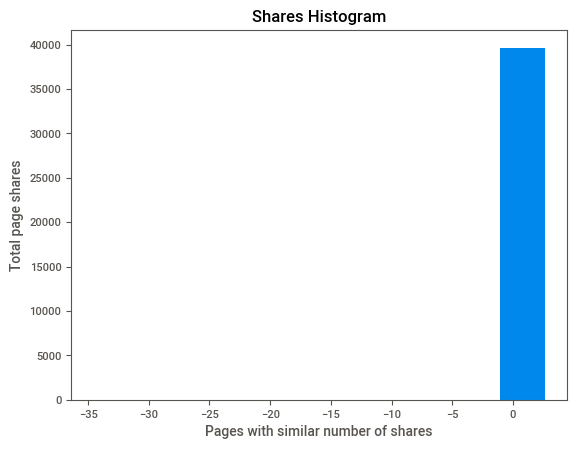

In [ ]:
plt.hist(np.log(y + 1.0e-15))
plt.title('Shares Histogram')
plt.ylabel('Total page shares')
plt.xlabel('Pages with similar number of shares')
plt.show()

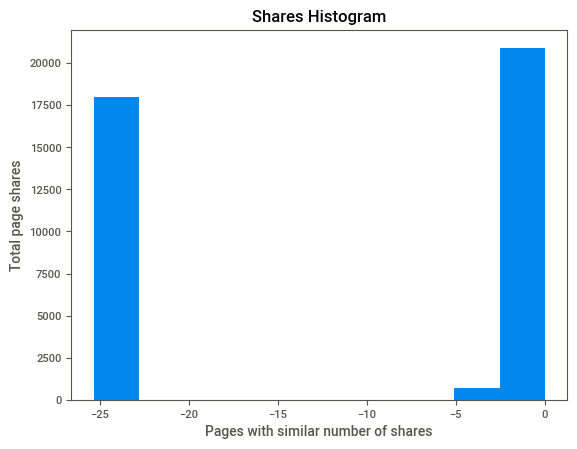

In [ ]:
plt.hist(np.log(X['title_subjectivity'] + 1e-11))
plt.title('Shares Histogram')
plt.ylabel('Total page shares')
plt.xlabel('Pages with similar number of shares')
plt.show()

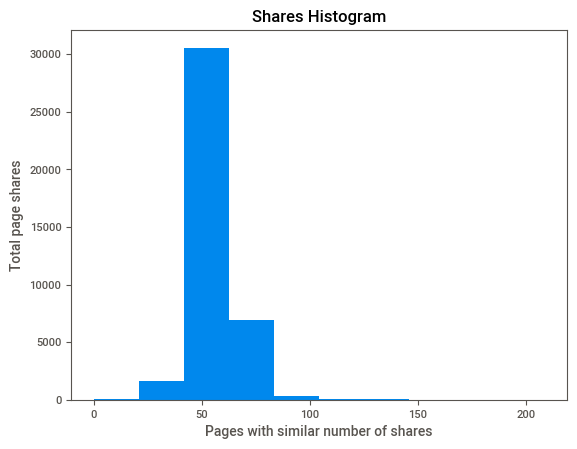

In [ ]:
plt.hist(np.sqrt(X['kw_avg_avg']))
plt.title('Shares Histogram')
plt.ylabel('Total page shares')
plt.xlabel('Pages with similar number of shares')
plt.show()

In [ ]:
plt.hist(np.sqrt(X['n_tokens_content']))
plt.title('Shares Histogram')
plt.ylabel('Total page shares')
plt.xlabel('Pages with similar number of shares')
plt.show()

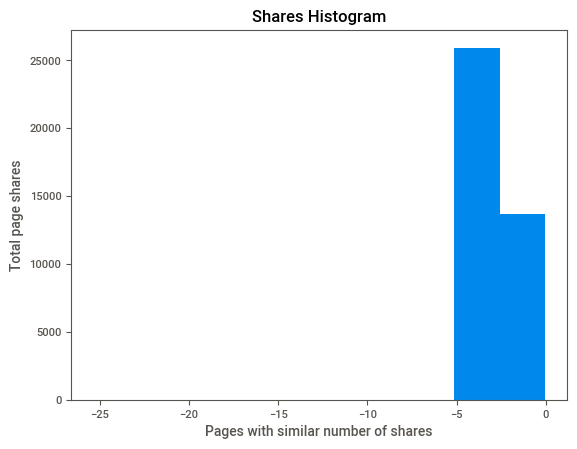

In [ ]:
plt.hist(np.log(X['LDA_00'] + 1e-11))
plt.title('Shares Histogram')
plt.ylabel('Total page shares')
plt.xlabel('Pages with similar number of shares')
plt.show()

1. _Split the data into training and testing sets. Use the training set for model fitting and the testing set to check for overfitting and predictive performance._
2.
3. _Explore higher-order terms._
4. _Reduce the model using the following methods:_
   * _Stepwise model evaluation methods to remove insignificant variables._

In [ ]:
news3 = news.drop(columns=['url',])
operations3 = {'log': lambda x: np.log(x + 1.0e-15), 'sqrt': lambda x: np.sqrt(x)}
predictors3a = [c for c in news3.columns if c not in ('shares',)]

new_columns: dict[str, pd.Series] = {}

# add operations on X
for operation_name, operation in operations3.items():
    for predictor in predictors3a:
        try:
            new_columns[f'{operation_name}({predictor})'] = operation(news3[predictor])
        except:
            print(f'Skipping invalid operation: {operation_name}({predictor})')

# find categorical variables
continuous_vars3 = [c for c in predictors3a if len(news3[c].unique()) > 2]

# add higher-order terms
for predictor in predictors3a:
    for continuous_var in continuous_vars3:
        new_columns[f'{predictor}_x_{continuous_var}'] = news3[predictor] * news3[continuous_var]

news3 = pd.concat((news3, pd.DataFrame(new_columns)), axis=1)
news3 = news3[[
    'shares',
    'n_tokens_content',
    'num_hrefs',
    'num_keywords',
    'kw_max_min',
    'kw_max_avg',
    'kw_avg_avg',
    'self_reference_min_shares',
    'global_rate_negative_words',
    'title_sentiment_polarity',
    'log(n_tokens_content)',
    'log(n_unique_tokens)',
    'log(num_imgs)',
    'log(num_keywords)',
    'log(data_channel_is_entertainment)',
    'log(data_channel_is_socmed)',
    'log(kw_min_max)',
    'log(kw_avg_max)',
    'log(kw_max_avg)',
    'log(kw_avg_avg)',
    'log(self_reference_max_shares)',
    'log(self_reference_avg_sharess)',
    'log(weekday_is_monday)',
    'log(weekday_is_wednesday)',
    'log(weekday_is_thursday)',
    'sqrt(n_tokens_content)',
    'sqrt(n_non_stop_unique_tokens)',
    'sqrt(num_imgs)',
    'sqrt(kw_min_max)',
    'sqrt(kw_max_avg)',
    'sqrt(kw_avg_avg)',
    'sqrt(self_reference_avg_sharess)',
    'sqrt(global_rate_negative_words)',
    'sqrt(min_positive_polarity)',
    'sqrt(abs_title_sentiment_polarity)',
    'n_tokens_content_x_n_tokens_content',
    'n_tokens_content_x_self_reference_min_shares',
    'n_tokens_content_x_self_reference_avg_sharess',
    'n_tokens_content_x_global_rate_negative_words',
    'n_tokens_content_x_avg_positive_polarity',
    'n_tokens_content_x_abs_title_sentiment_polarity',
    'n_unique_tokens_x_n_unique_tokens',
    'n_unique_tokens_x_self_reference_avg_sharess',
    'n_unique_tokens_x_avg_positive_polarity',
    'n_non_stop_unique_tokens_x_num_hrefs',
    'n_non_stop_unique_tokens_x_average_token_length',
    'n_non_stop_unique_tokens_x_avg_positive_polarity',
    'num_hrefs_x_n_non_stop_unique_tokens',
    'num_hrefs_x_num_imgs',
    'num_hrefs_x_avg_positive_polarity',
    'num_imgs_x_num_hrefs',
    'num_imgs_x_min_positive_polarity',
    'num_imgs_x_title_subjectivity',
    'num_imgs_x_abs_title_sentiment_polarity',
    'average_token_length_x_n_non_stop_unique_tokens',
    'average_token_length_x_num_keywords',
    'average_token_length_x_kw_max_min',
    'average_token_length_x_kw_max_avg',
    'average_token_length_x_title_sentiment_polarity',
    'num_keywords_x_n_non_stop_unique_tokens',
    'num_keywords_x_num_hrefs',
    'num_keywords_x_average_token_length',
    'num_keywords_x_global_rate_negative_words',
    'num_keywords_x_abs_title_sentiment_polarity',
    'data_channel_is_lifestyle_x_title_sentiment_polarity',
    'data_channel_is_entertainment_x_kw_min_max',
    'data_channel_is_entertainment_x_self_reference_avg_sharess',
    'data_channel_is_entertainment_x_global_subjectivity',
    'data_channel_is_entertainment_x_min_positive_polarity',
    'data_channel_is_socmed_x_n_unique_tokens',
    'data_channel_is_socmed_x_num_hrefs',
    'data_channel_is_socmed_x_num_imgs',
    'data_channel_is_socmed_x_num_keywords',
    'data_channel_is_socmed_x_min_positive_polarity',
    'data_channel_is_socmed_x_max_positive_polarity',
    'data_channel_is_tech_x_n_unique_tokens',
    'data_channel_is_tech_x_n_non_stop_unique_tokens',
    'kw_max_min_x_kw_max_min',
    'kw_min_max_x_n_tokens_content',
    'kw_min_max_x_self_reference_max_shares',
    'kw_min_max_x_self_reference_avg_sharess',
    'kw_min_max_x_global_subjectivity',
    'kw_max_avg_x_num_imgs',
    'kw_max_avg_x_kw_max_min',
    'kw_max_avg_x_self_reference_max_shares',
    'kw_max_avg_x_self_reference_avg_sharess',
    'kw_max_avg_x_global_rate_negative_words',
    'kw_max_avg_x_title_sentiment_polarity',
    'kw_avg_avg_x_n_tokens_content',
    'kw_avg_avg_x_n_non_stop_unique_tokens',
    'kw_avg_avg_x_num_keywords',
    'self_reference_min_shares_x_n_unique_tokens',
    'self_reference_min_shares_x_n_non_stop_unique_tokens',
    'self_reference_min_shares_x_kw_min_max',
    'self_reference_max_shares_x_num_imgs',
    'self_reference_max_shares_x_kw_avg_avg',
    'self_reference_max_shares_x_self_reference_max_shares',
    'self_reference_max_shares_x_global_subjectivity',
    'self_reference_max_shares_x_global_rate_negative_words',
    'self_reference_max_shares_x_avg_positive_polarity',
    'self_reference_avg_sharess_x_kw_avg_avg',
    'self_reference_avg_sharess_x_self_reference_avg_sharess',
    'self_reference_avg_sharess_x_global_subjectivity',
    'weekday_is_tuesday_x_num_imgs',
    'weekday_is_tuesday_x_average_token_length',
    'weekday_is_tuesday_x_kw_max_min',
    'weekday_is_wednesday_x_n_tokens_content',
    'weekday_is_thursday_x_self_reference_min_shares',
    'weekday_is_thursday_x_self_reference_max_shares',
    'weekday_is_thursday_x_self_reference_avg_sharess',
    'weekday_is_friday_x_kw_max_avg',
    'weekday_is_saturday_x_n_unique_tokens',
    'weekday_is_saturday_x_global_subjectivity',
    'weekday_is_sunday_x_kw_max_min',
    'weekday_is_sunday_x_kw_avg_max',
    'is_weekend_x_num_keywords',
    'is_weekend_x_kw_avg_avg',
    'is_weekend_x_abs_title_subjectivity',
    'global_subjectivity_x_max_positive_polarity',
    'global_rate_negative_words_x_n_tokens_content',
    'global_rate_negative_words_x_num_keywords',
    'global_rate_negative_words_x_kw_max_avg',
    'global_rate_negative_words_x_self_reference_max_shares',
    'global_rate_negative_words_x_global_rate_negative_words',
    'global_rate_negative_words_x_abs_title_subjectivity',
    'avg_positive_polarity_x_n_tokens_content',
    'avg_positive_polarity_x_n_unique_tokens',
    'avg_positive_polarity_x_n_non_stop_unique_tokens',
    'avg_positive_polarity_x_num_hrefs',
    'min_positive_polarity_x_n_non_stop_unique_tokens',
    'min_positive_polarity_x_num_imgs',
    'min_positive_polarity_x_kw_max_avg',
    'min_positive_polarity_x_kw_avg_avg',
    'max_positive_polarity_x_num_imgs',
    'max_positive_polarity_x_global_subjectivity',
    'max_positive_polarity_x_max_positive_polarity',
    'title_subjectivity_x_num_imgs',
    'title_subjectivity_x_num_keywords',
    'title_subjectivity_x_kw_avg_max',
    'title_subjectivity_x_self_reference_avg_sharess',
    'title_subjectivity_x_abs_title_subjectivity',
    'title_sentiment_polarity_x_n_non_stop_unique_tokens',
    'title_sentiment_polarity_x_average_token_length',
    'abs_title_subjectivity_x_global_rate_negative_words',
    'abs_title_subjectivity_x_abs_title_subjectivity',
    'abs_title_sentiment_polarity_x_self_reference_avg_sharess',
]]

# fit model and remove bad fitting predictors
model3: RegressionResults = None
X_train, X_test, y_train, y_test = None, None, None, None
predictors3b = [c for c in news3.columns if c not in ('shares',)]

while len(predictors3b):
    X_train, X_test, y_train, y_test = train_test_split(news3[predictors3b], news3['shares'], test_size=0.3, random_state=42)
    # X_train = sm.add_constant(X_train)
    # X_test = sm.add_constant(X_test)

    model3 = sm.OLS(y_train, X_train).fit()

    if np.any(model3.pvalues > 0.05):
        least_significant = model3.pvalues.index[model3.pvalues.argmax()]
        try:
            predictors3b.remove(least_significant)
        except:
            print(f'{least_significant=} missing from list')
        print(f'Removed "{least_significant}" with a score of {model3.pvalues.max()}. {len(predictors3b)} options left.')

    else:
        break

print(f'Out of sample R2 Score: {r2_score(y_test, model3.predict(X_test))}')
model3.summary()

Skipping invalid operation: log(kw_min_min)
Skipping invalid operation: log(kw_avg_min)
Skipping invalid operation: log(kw_min_avg)
Skipping invalid operation: log(global_sentiment_polarity)
Skipping invalid operation: log(avg_negative_polarity)
Skipping invalid operation: log(min_negative_polarity)
Skipping invalid operation: log(max_negative_polarity)
Skipping invalid operation: log(title_sentiment_polarity)
Skipping invalid operation: sqrt(kw_min_min)
Skipping invalid operation: sqrt(kw_avg_min)
Skipping invalid operation: sqrt(kw_min_avg)
Skipping invalid operation: sqrt(global_sentiment_polarity)
Skipping invalid operation: sqrt(avg_negative_polarity)
Skipping invalid operation: sqrt(min_negative_polarity)
Skipping invalid operation: sqrt(max_negative_polarity)
Skipping invalid operation: sqrt(title_sentiment_polarity)
Out of sample R2 Score: 0.14116413035968156


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     44.48
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        05:56:57   Log-Likelihood:                -34776.
No. Observations:               27750   AIC:                         6.981e+04
Df Residuals:                   27623   BIC:                         7.085e+04
Df Model:                         126                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
n_tokens_content                                               0.0018      0.000      7.863      0.000       0.001       0.002
num_hrefs                                                      0.0295      0.005      6.099      0.000       0.020       0.039
num_keywords                                                  -0.0699      0.025     -2.774      0.006      -0.119      -0.020
kw_max_min                                                  3.306e-05   1.15e-05      2.875      0.004    1.05e-05    5.56e-05
kw_max_avg                                                  4.915e-05   1.21e-05      4.072      0.000    2.55e-05    7.28e-05
kw_avg_avg                                                    -0.0002   5.59e-05     -3.877      0.000      -0.000      -0.000
self_reference_min_shares                                  -2.022e-05   4.52e-06     -4.476      0.000   -2.91e-05   -1.14e-05
global_rate_negative_words                                   -13.7582      4.047     -3.399      0.001     -21.691      -5.825
title_sentiment_polarity                                       0.2417      0.102      2.375      0.018       0.042       0.441
log(n_tokens_content)                                          0.6883      0.071      9.742      0.000       0.550       0.827
log(n_unique_tokens)                                          -0.8553      0.074    -11.514      0.000      -1.001      -0.710
log(num_imgs)                                                 -0.0032      0.001     -4.973      0.000      -0.004      -0.002
log(num_keywords)                                              0.3497      0.108      3.231      0.001       0.138       0.562
log(data_channel_is_entertainment)                            -0.0099      0.002     -6.072      0.000      -0.013      -0.007
log(data_channel_is_socmed)                                    0.0263      0.005      5.336      0.000       0.017       0.036
log(kw_min_max)                                               -0.0045      0.000    -11.591      0.000      -0.005      -0.004
log(kw_avg_max)                                               -0.1117      0.009    -11.935      0.000      -0.130      -0.093
log(kw_max_avg)                                                0.9701      0.158      6.129      0.000       0.660       1.280
log(kw_avg_avg)                                               -0.8920      0.161     -5.532      0.000      -1.208      -0.576
log(self_reference_max_shares)                                -0.0966      0.020     -4.873      0.000      -0.135      -0.058
log(self_reference_avg_sharess)                                0.0915      0.020      4.598      0.000       0.052       0.130
log(weekday_is_monday)             

4. _Reduce the model using the following methods:_
   * _LASSO regression to fit the full model and remove insignificant variables. Tune the model to find the best `α`._

In [ ]:
news4 = news.drop(columns=['url',])
operations4 = {'log': lambda x: np.log(x + 1.0e-15), 'sqrt': lambda x: np.sqrt(x)}
predictors4a = [c for c in news4.columns if c not in ('shares',)]

new_columns: dict[str, pd.Series] = {}

# add operations on X
for operation_name, operation in operations4.items():
    for predictor in predictors4a:
        try:
            new_columns[f'{operation_name}({predictor})'] = operation(news4[predictor])
        except:
            print(f'Skipping invalid operation: {operation_name}({predictor})')

# find categorical variables
continuous_vars4 = [c for c in predictors3a if len(news4[c].unique()) > 2]

# add higher-order terms
for predictor in predictors4a:
    for continuous_var in continuous_vars4:
        new_columns[f'{predictor}_x_{continuous_var}'] = news4[predictor] * news4[continuous_var]

news4 = pd.concat((news4, pd.DataFrame(new_columns)), axis=1)

# fit model and remove bad fitting predictors
predictors4b = [c for c in news4.columns if c not in ('shares',)]

X_train, X_test, y_train, y_test = train_test_split(news4[predictors3b], news4['shares'], test_size=0.3, random_state=42)

scale_X = StandardScaler().fit(X_train)
X_train_scaled = scale_X.transform(X_train)
X_test_scaled = scale_X.transform(X_test)

scale_y = StandardScaler().fit(y_train.values.reshape(-1,1))
y_train_scaled = scale_y.transform(y_train.values.reshape(-1,1))

model4 = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

print(f'Out of sample R2 Score: {r2_score(y_test, scale_y.inverse_transform([model4.predict(X_test_scaled)])[0])}')



Skipping invalid operation: log(kw_min_min)
Skipping invalid operation: log(kw_avg_min)
Skipping invalid operation: log(kw_min_avg)
Skipping invalid operation: log(global_sentiment_polarity)
Skipping invalid operation: log(avg_negative_polarity)
Skipping invalid operation: log(min_negative_polarity)
Skipping invalid operation: log(max_negative_polarity)
Skipping invalid operation: log(title_sentiment_polarity)
Skipping invalid operation: sqrt(kw_min_min)
Skipping invalid operation: sqrt(kw_avg_min)
Skipping invalid operation: sqrt(kw_min_avg)
Skipping invalid operation: sqrt(global_sentiment_polarity)
Skipping invalid operation: sqrt(avg_negative_polarity)
Skipping invalid operation: sqrt(min_negative_polarity)
Skipping invalid operation: sqrt(max_negative_polarity)
Skipping invalid operation: sqrt(title_sentiment_polarity)
Out of sample R2 Score: 0.1342116579291831


5. _Write a section in your technical report that reports the out-of-sample performance of the models. Discuss the most significant predictors and evaluate the model's usefulness for predicting future shares._

Neither method had a very high R^2 score, but this may just be a difficult problem to model. The higher order linear regression function had an out-of-sample R^2 score of 0.14116413035968156 and the lasso method's out-of-sample R^2 score was 0.13859277957462957.

The Lasso method was significantly faster to train and adjust compared to teh linear model for the size of these models. The linear model's data is useful for predicting specific values, but it uses a lot of combined terms and so it is very difficult to interpret data from the model.

***Regression Tree Modeling***: _Build and tune a regression tree model._

1. _Use the same training and testing sets as above._
2. _Use cost-complexity pruning and cross-validation to find a model that fits well on out-of-sample data._

In [ ]:
from sklearn.model_selection import cross_val_score

X = news[sig_features]
y = news['shares']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

ctree = DecisionTreeRegressor(max_depth = 3)
ctree.fit(X_train, y_train)

path = ctree.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.plot(ccp_alphas,impurities)



In [ ]:
acc_in = []
acc_out = acc_in.copy()

for ccp_alpha in ccp_alphas:
    tree_temp = DecisionTreeRegressor(ccp_alpha=ccp_alpha)
    tree_temp.fit(X_train, y_train)
    acc_in.append(tree_temp.score(X_train,y_train))
    acc_out.append(tree_temp.score(X_test,y_test))

#grid = np.linspace(0.00001,0.25,len(R2_in))
plt.plot(ccp_alphas,acc_in,color="r")
plt.plot(ccp_alphas,acc_out,color = "orange")
plt.show()

3. _Fit a random forest regression model, using cost-complexity pruning for the individual trees._

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

best_index = np.argmax(acc_out)
best_ccp_alpha = ccp_alphas[best_index]

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=7,
    ccp_alpha=best_ccp_alpha,
    min_samples_leaf=5,
    n_jobs = -1
)

# Train the Random Forest
rf.fit(X_train, y_train)

# Evaluate the model
train_r2 = rf.score(X_train, y_train)
test_r2 = rf.score(X_test, y_test)
print(f"Random Forest Train R²: {train_r2:.3f}")
print(f"Random Forest Test R²: {test_r2:.3f}")

Random Forest Train R²: 0.104
Random Forest Test R²: 0.109


4. _Write a section in your technical report that reports the out-of-sample performance of the models. Discuss the model’s usefulness for predicting future shares._

Our random forest model, with 100 estimators and a maximum tree depth of 7, produced an out-of-sample R² of 0.109. This indicates that the model only explains 10.9% of the variance in the number of shares for the test data, which is relatively low. This model appears to be performing poorly in terms of predictive accuracy. The low R^2 suggests that this model is not effective for predicting shares, suggesting that Random Forest may not be the most suitable method for this task.


Although the R^2 is low on this model, it can still provide us with some valuablle insight into feature importances. It seems like it is suffering from noisy data, so it would need some tweaking to be more helpful to us.


We recommend exploring alternative models and refining the feature set to better represent the effect of these variables on number of shares.

***Conclusion***: _Compare each model’s predictive accuracy on the test set. Choose the best-performing model as the final predictive model. Write a concluding section in your technical report that addresses Mashable's business concerns and presents your final model along with your confidence in its predictions._

### Final Model Results
Out of the models we trained, the Linear Regression model using higher order terms did best achieving an $R^2$ score of **0.14116413035968156**, as opposed to the other linear regression model we trained and the *Random Forest* model we trained, which only achieved at best an $R^2$ score of $\approx \mathbf{0.109}$, which is also low.

Unfortunately, these metrics are not very good, so as for *Mashable's* business concerns, our best model can only explain around $14.12\%$ of the variance in the number of shares given all the predictors in the dataset allotted to us. We used a combination of several higher order terms and transformations of the target variable in our best linear regression model in order to handle data that was right or left skewed and to account for non-linear relationships between predictors and the target variable *shares*. Despite these efforts, the predictive power of our model still leaves us with low confidence in its predictions, and we would likely need to perform more EDA, collect more data, or experiment more heavily with model selection in order to improve our model's performance.